In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import os
if not os.getcwd().endswith('CIoTS'):
    os.chdir('../..')
from CIoTS import *
import pandas as pd
import numpy as np
from itertools import product

In [171]:
dimensions = [3, 5, 10]
incoming_edges = [2, 3, 4]
taus = [5, 10, 15, 20]
autocorrs = [False, True]
data_length = [10000]
runs = range(10)
setups = list(product(dimensions, incoming_edges, taus, autocorrs, runs))# data_length, runs))

result_file = 'notebooks/ICML/icml_results_v2/experiment3.csv'
result = pd.read_csv(result_file)
done = [group for group, _ in result.groupby(['dimension', 'incoming edges', 
                                              'max time lag', 'autocorr', 'run'])]
print(f'{len(done)}/{len(setups)}')

654/720


In [172]:
dimensions = [3, 5]
incoming_edges = [2, 3, 4]
taus = [5, 10, 15, 20]
autocorrs = [False, True]
data_length = [10000]
runs = range(10)
setups = list(product(dimensions, incoming_edges, taus, autocorrs, runs))# data_length, runs))

result_file = 'notebooks/ICML/icml_results_v2/experiment4.csv'
result = pd.read_csv(result_file)
done = [group for group, _ in result.groupby(['dimension', 'incoming edges', 
                                              'max time lag', 'autocorr', 'run'])]
print(f'{len(done)}/{len(setups)}')

480/480


In [109]:
df = pd.read_csv('notebooks/ICML/icml_results_v2/experiment1.csv')
# df

In [111]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

df[df['max time lag']==5].groupby(
    ['dimension', 'incoming edges', 'autocorr']
).agg(['mean'])[['PC1 incremental_f1+0', 'PCMCI incremental_f1+0',
                                                       'PC incremental_f1+0', 'PC extensive_f1+0']]

PC1 incremental_f1+0 PCMCI incremental_f1+0  \
                                                  mean                   mean   
dimension incoming edges autocorr                                               
3.0       2.0            0.0                  0.732747               0.728611   
                         1.0                  0.722308               0.670430   
          3.0            0.0                  0.751338               0.795948   
                         1.0                  0.649000               0.717585   
          4.0            0.0                  0.655946               0.760498   
                         1.0                  0.627558               0.663098   
5.0       2.0            0.0                  0.674308               0.761295   
                         1.0                  0.446071               0.472676   
          3.0            0.0                  0.620760               0.565362   
                         1.0                  0.550639               0.537031   
          4.0            0.0                  0.561577               0.533349   
                         1.0                  0.499678               0.490360   
10.0      2.0            0.0                  0.463000               0.434200   
                         1.0                  0.363367               0.354329   
          3.0            0.0                  0.458534               0.442752   
                         1.0                  0.435579               0.424103   
          4.0            0.0                  0.436978               0.425927   
                         1.0                  0.403227               0.388006   

                                  PC incremental_f1+0 PC extensive_f1+0  
                                                 mean              mean  
dimension incoming edges autocorr                                        
3.0       2.0            0.0                 0.786450          0.786450  
                         1.0                 0.841663          0.803373  
          3.0            0.0                 0.837888          0.845714  
                         1.0                 0.735811          0.730784  
          4.0            0.0                 0.725182          0.750467  
                         1.0                 0.792123          0.805774  
5.0       2.0            0.0                 0.537726          0.530880  
                         1.0                 0.525842          0.560366  
          3.0            0.0                 0.558760          0.573911  
                         1.0                 0.665183          0.677979  
          4.0            0.0                 0.528644          0.567325  
                         1.0                 0.539462          0.515287  
10.0      2.0            0.0                 0.272958          0.256884  
                         1.0                 0.255476          0.274948  
          3.0            0.0                 0.340763          0.343303  
                         1.0                 0.305434          0.319315  
          4.0            0.0                 0.290110          0.317614  
                         1.0                 0.313702          0.322826

In [61]:
df[['PC1 incremental_f1+0', 'PCMCI incremental_f1+0', 'PC incremental_f1+0', 'PC extensive_f1+0']].mean()

PC1 incremental_f1+0      0.634753
PCMCI incremental_f1+0    0.651042
PC incremental_f1+0       0.517457
PC extensive_f1+0         0.526302
dtype: float64

In [112]:
df2 = pd.read_csv('notebooks/ICML/icml_results_v2/experiment2_old.csv')
df2

PC extensive: BIC_tau  PC extensive: Correlation_tau  \
0                     7.0                            6.0   
1                     1.0                            5.0   
2                     5.0                            5.0   
3                     6.0                            5.0   
4                     3.0                            3.0   
5                     5.0                            5.0   
6                     5.0                            8.0   
7                     1.0                            1.0   
8                     7.0                            5.0   
9                     8.0                            8.0   
10                    8.0                            9.0   
11                    9.0                            5.0   
12                    4.0                            4.0   
13                    4.0                           10.0   
14                    7.0                            6.0   
15                    8.0                            8.0   
16                    7.0                            6.0   
17                    4.0                            4.0   
18                    7.0                            5.0   
19                    7.0                            5.0   
20                    9.0                           15.0   
21                   10.0                           10.0   
22                   12.0                            7.0   
23                   10.0                           11.0   
24                    7.0                            2.0   
25                   12.0                           10.0   
26                   10.0                            1.0   
27                    8.0                           15.0   
28                    6.0                            6.0   
29                    8.0                            2.0   
..                    ...                            ...   
35                   11.0                           10.0   
36                    9.0                           18.0   
37                    8.0                            7.0   
38                    6.0                           13.0   
39                   13.0                           10.0   
40                   15.0                           15.0   
41                   16.0                           15.0   
42                   15.0                           16.0   
43                   16.0                           16.0   
44                   15.0                           16.0   
45                   14.0                           12.0   
46                   12.0                           11.0   
47                   17.0                            9.0   
48                   16.0                           15.0   
49                   15.0                           15.0   
50                   15.0                           19.0   
51                   15.0                           15.0   
52                   15.0                           18.0   
53                    8.0                           15.0   
54                   20.0                           16.0   
55                   15.0                           24.0   
56                   17.0                           18.0   
57                    6.0                           18.0   
58                   22.0                           23.0   
59                    6.0                            2.0   
60                   12.0                           15.0   
61                    8.0                            4.0   
62                   11.0                            4.0   
63                    8.0                            8.0   
64                    1.0                            2.0   

    PC incremental: BIC_tau  PC1 incremental: BIC_tau  \
0                       7.0                      10.0   
1                       1.0                       9.0   
2                       5.0                       5.0   
3                       6.0                       9.0  

In [115]:
df2.groupby(
    ['dimension', 'incoming edges', 'autocorr', 'max time lag']
).median()

PC extensive: BIC_tau  \
dimension incoming edges autocorr max time lag                          
3.0       2.0            0.0      5.0                             5.0   
                                  10.0                            9.5   
                                  15.0                           15.0   
                                  20.0                            8.0   
                         1.0      5.0                             7.0   
                                  10.0                           11.0   
                                  15.0                           15.0   

                                                PC extensive: Correlation_tau  \
dimension incoming edges autocorr max time lag                                  
3.0       2.0            0.0      5.0                                     5.0   
                                  10.0                                    8.5   
                                  15.0                                   15.0   
                                  20.0                                    4.0   
                         1.0      5.0                                     5.5   
                                  10.0                                   12.0   
                                  15.0                                   18.0   

                                                PC incremental: BIC_tau  \
dimension incoming edges autocorr max time lag                            
3.0       2.0            0.0      5.0                               5.0   
                                  10.0                              9.5   
                                  15.0                             15.0   
                                  20.0                              8.0   
                         1.0      5.0                               7.0   
                                  10.0                             11.0   
                                  15.0                             15.0   

                                                PC1 incremental: BIC_tau  \
dimension incoming edges autocorr max time lag                             
3.0       2.0            0.0      5.0                                7.0   
                                  10.0                               8.0   
                                  15.0                              15.0   
                                  20.0                               7.0   
                         1.0      5.0                                5.5   
                                  10.0                               8.5   
                                  15.0                              13.0   

                                                PC1 incremental: Correlation_tau  \
dimension incoming edges autocorr max time lag                                     
3.0       2.0            0.0      5.0                                        6.0   
                                  10.0                                      10.0   
                                  15.0                                      13.0   
                                  20.0                                       4.0   
                         1.0      5.0                                        6.5   
                                  10.0                                      11.5   
                                  15.0                                      16.0   

                                                PCMCI: BIC_tau  \
dimension incoming edges autocorr max time lag                   
3.0       2.0            0.0      5.0                      6.5   
                                  10.0                     4.5   
                                  15.0                     8.5   
                                  20.0                     7.0   
                         1.0      5.0                      6.0   
                                  10.0                    11.0   
              

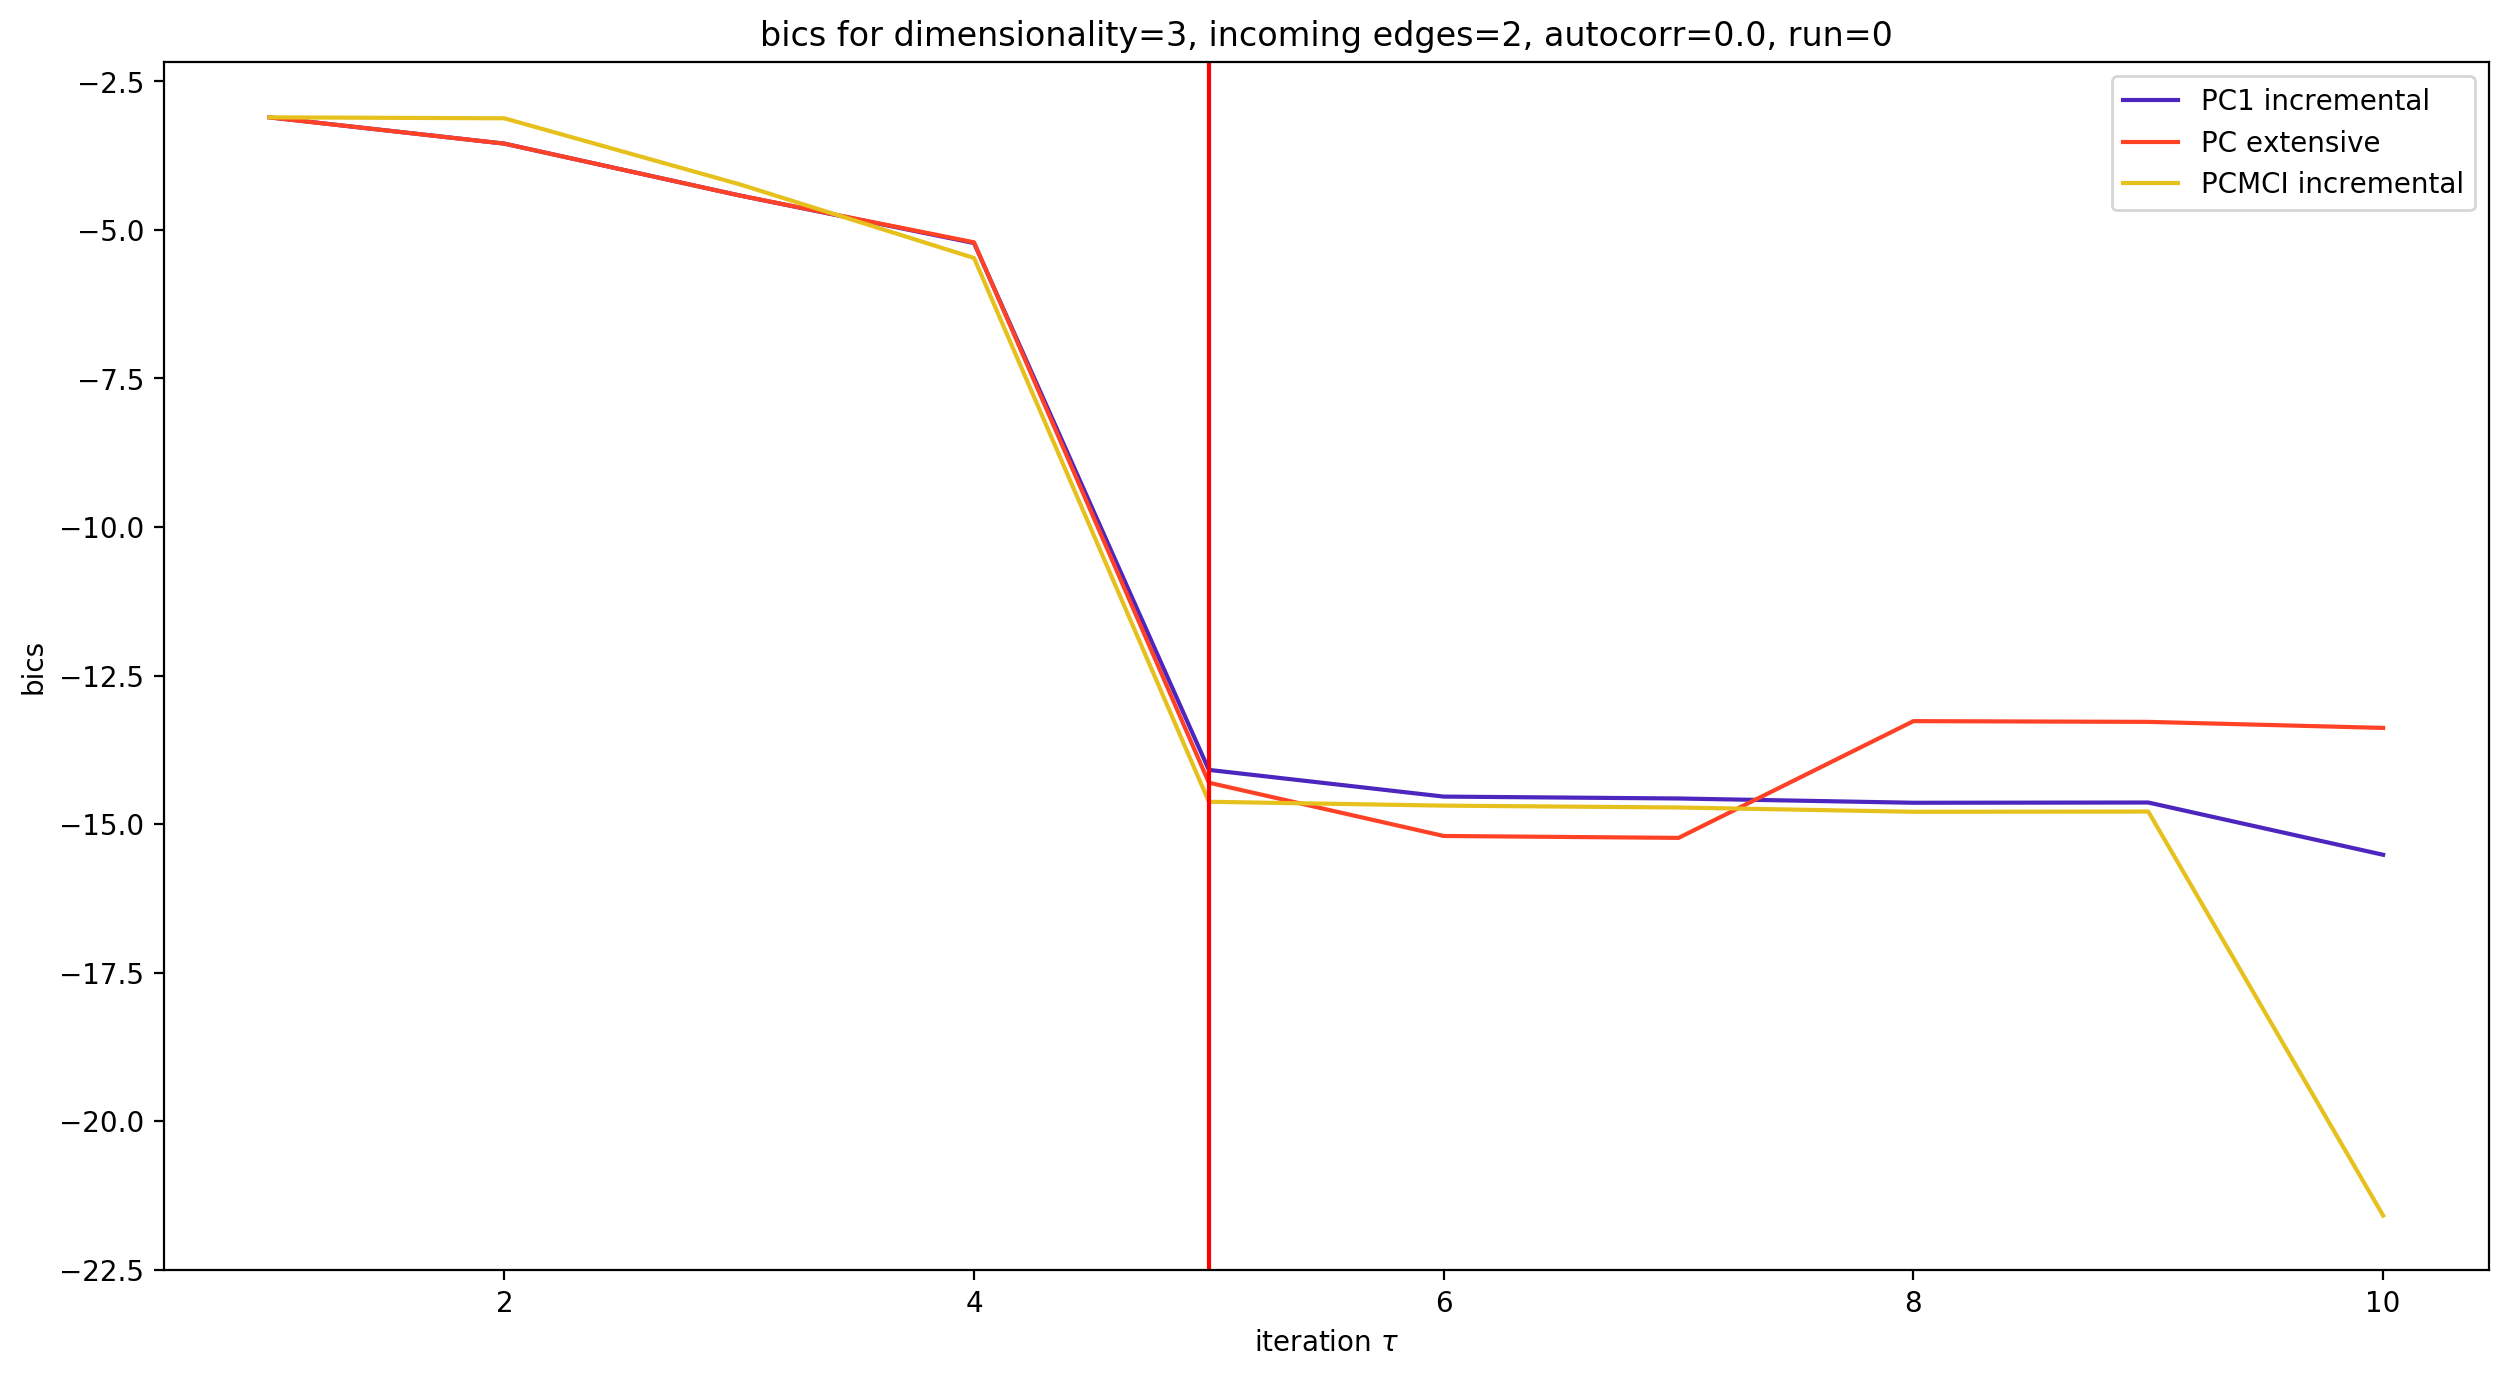

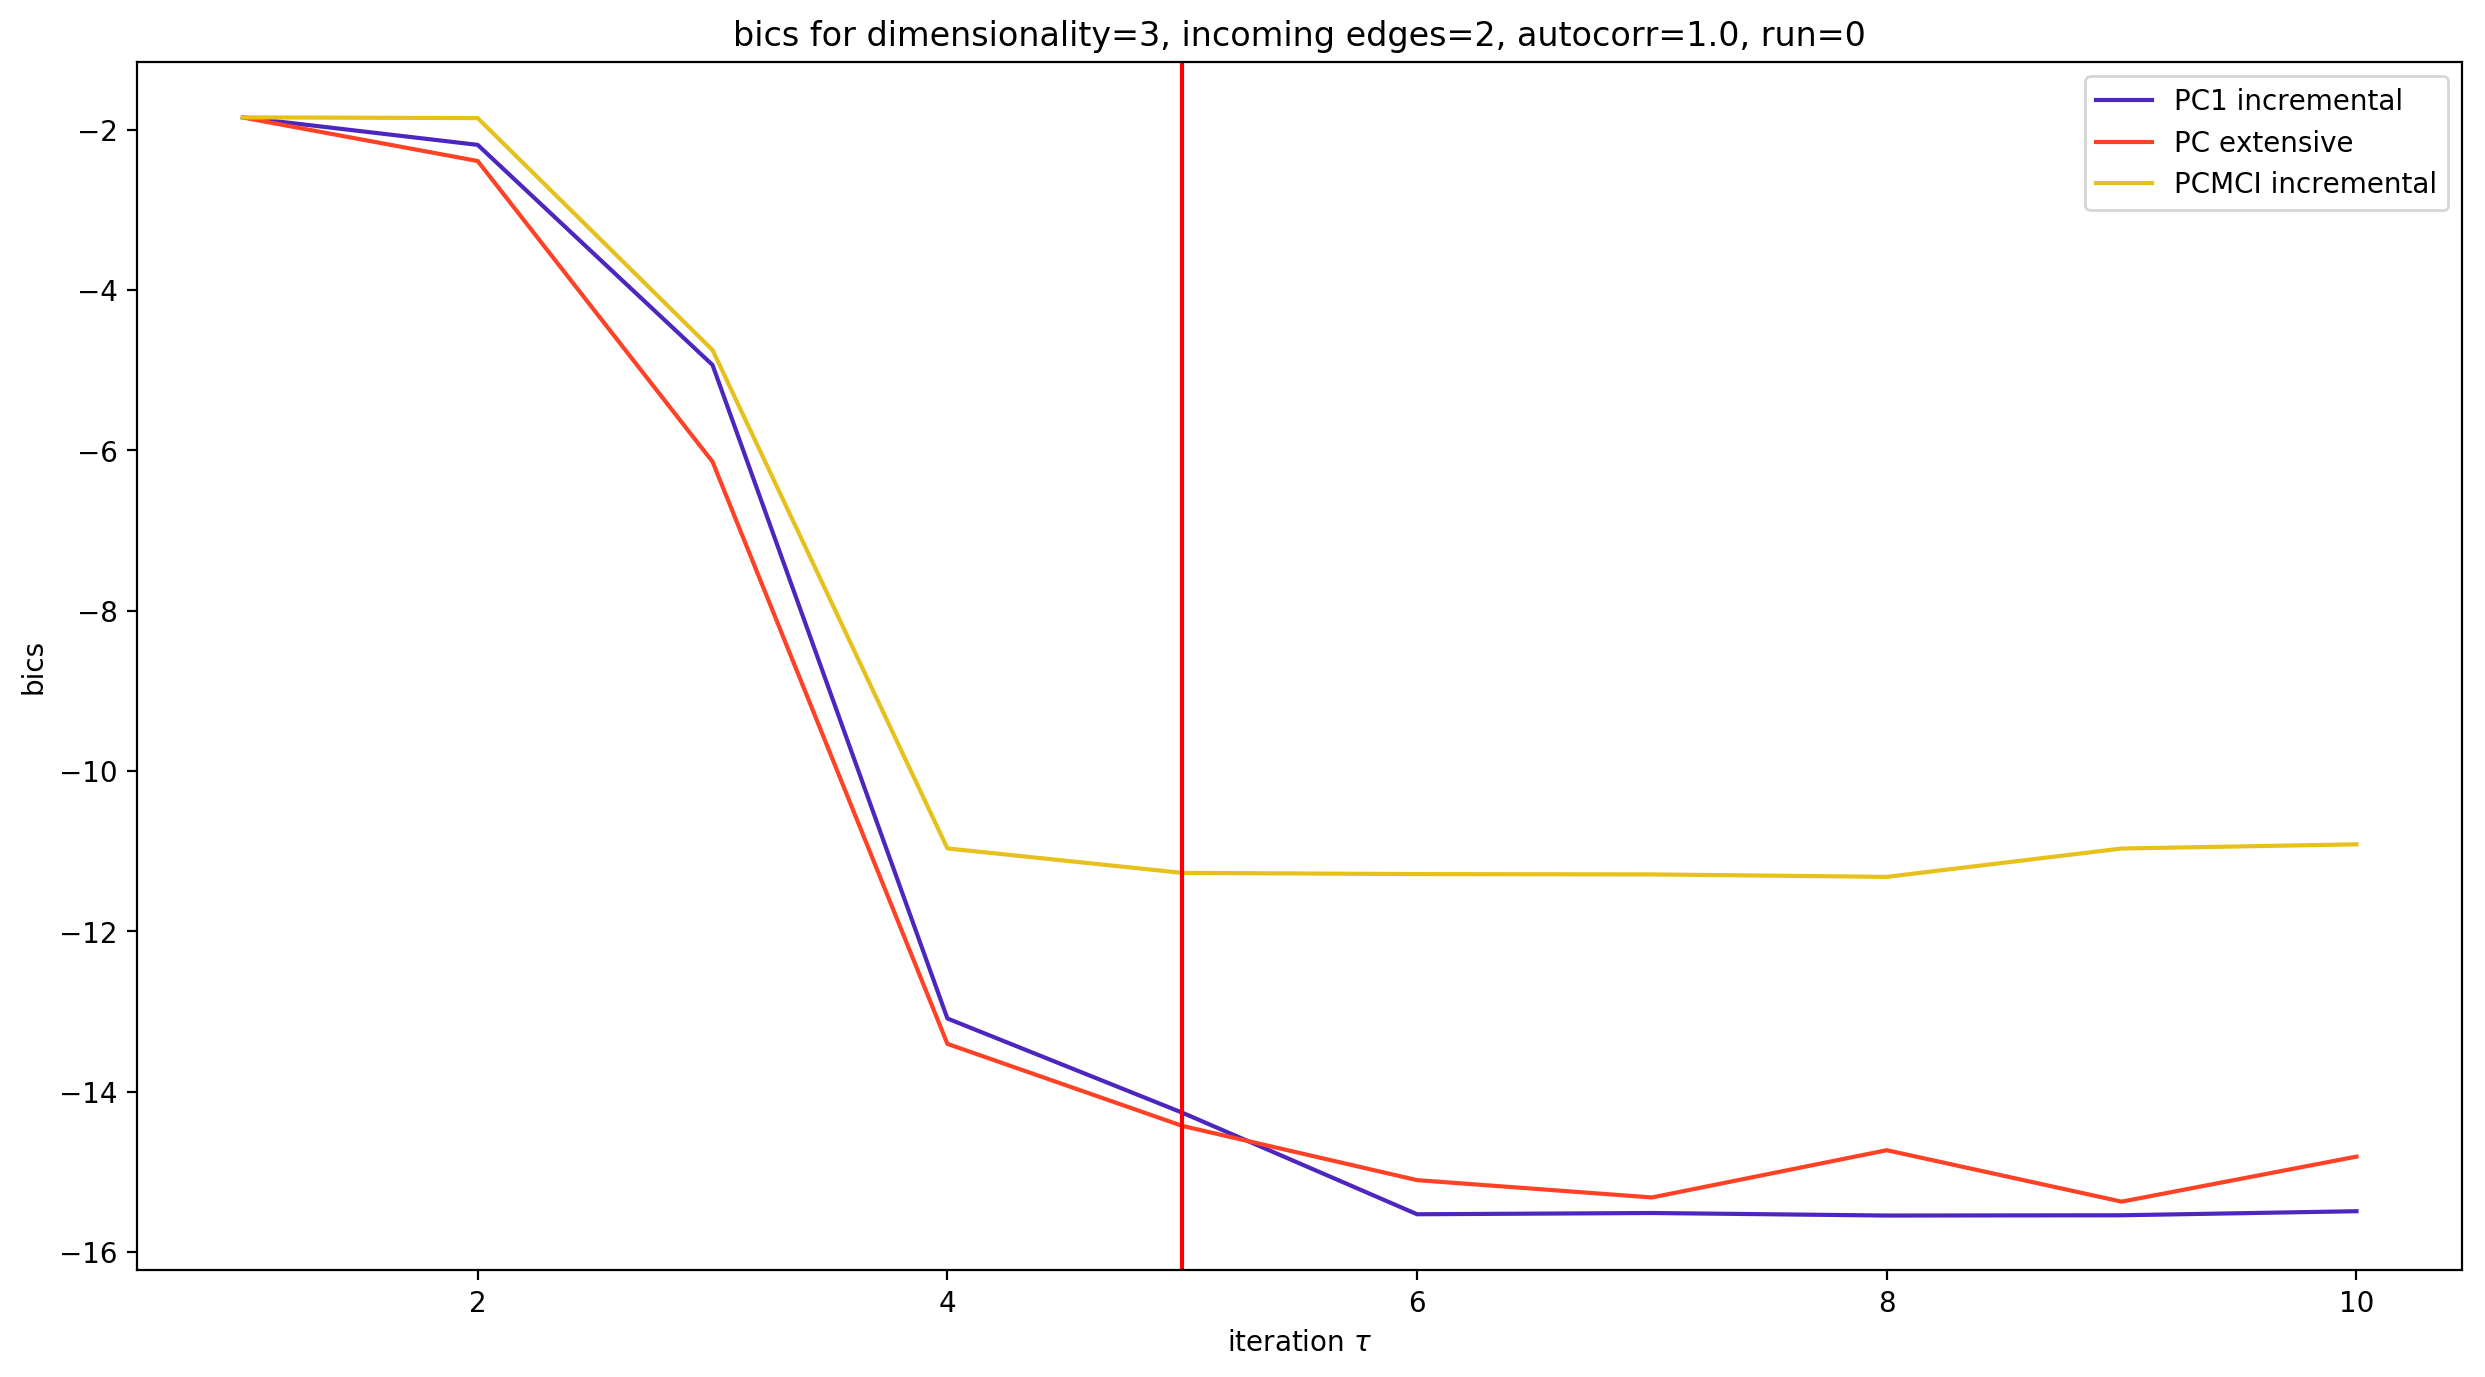

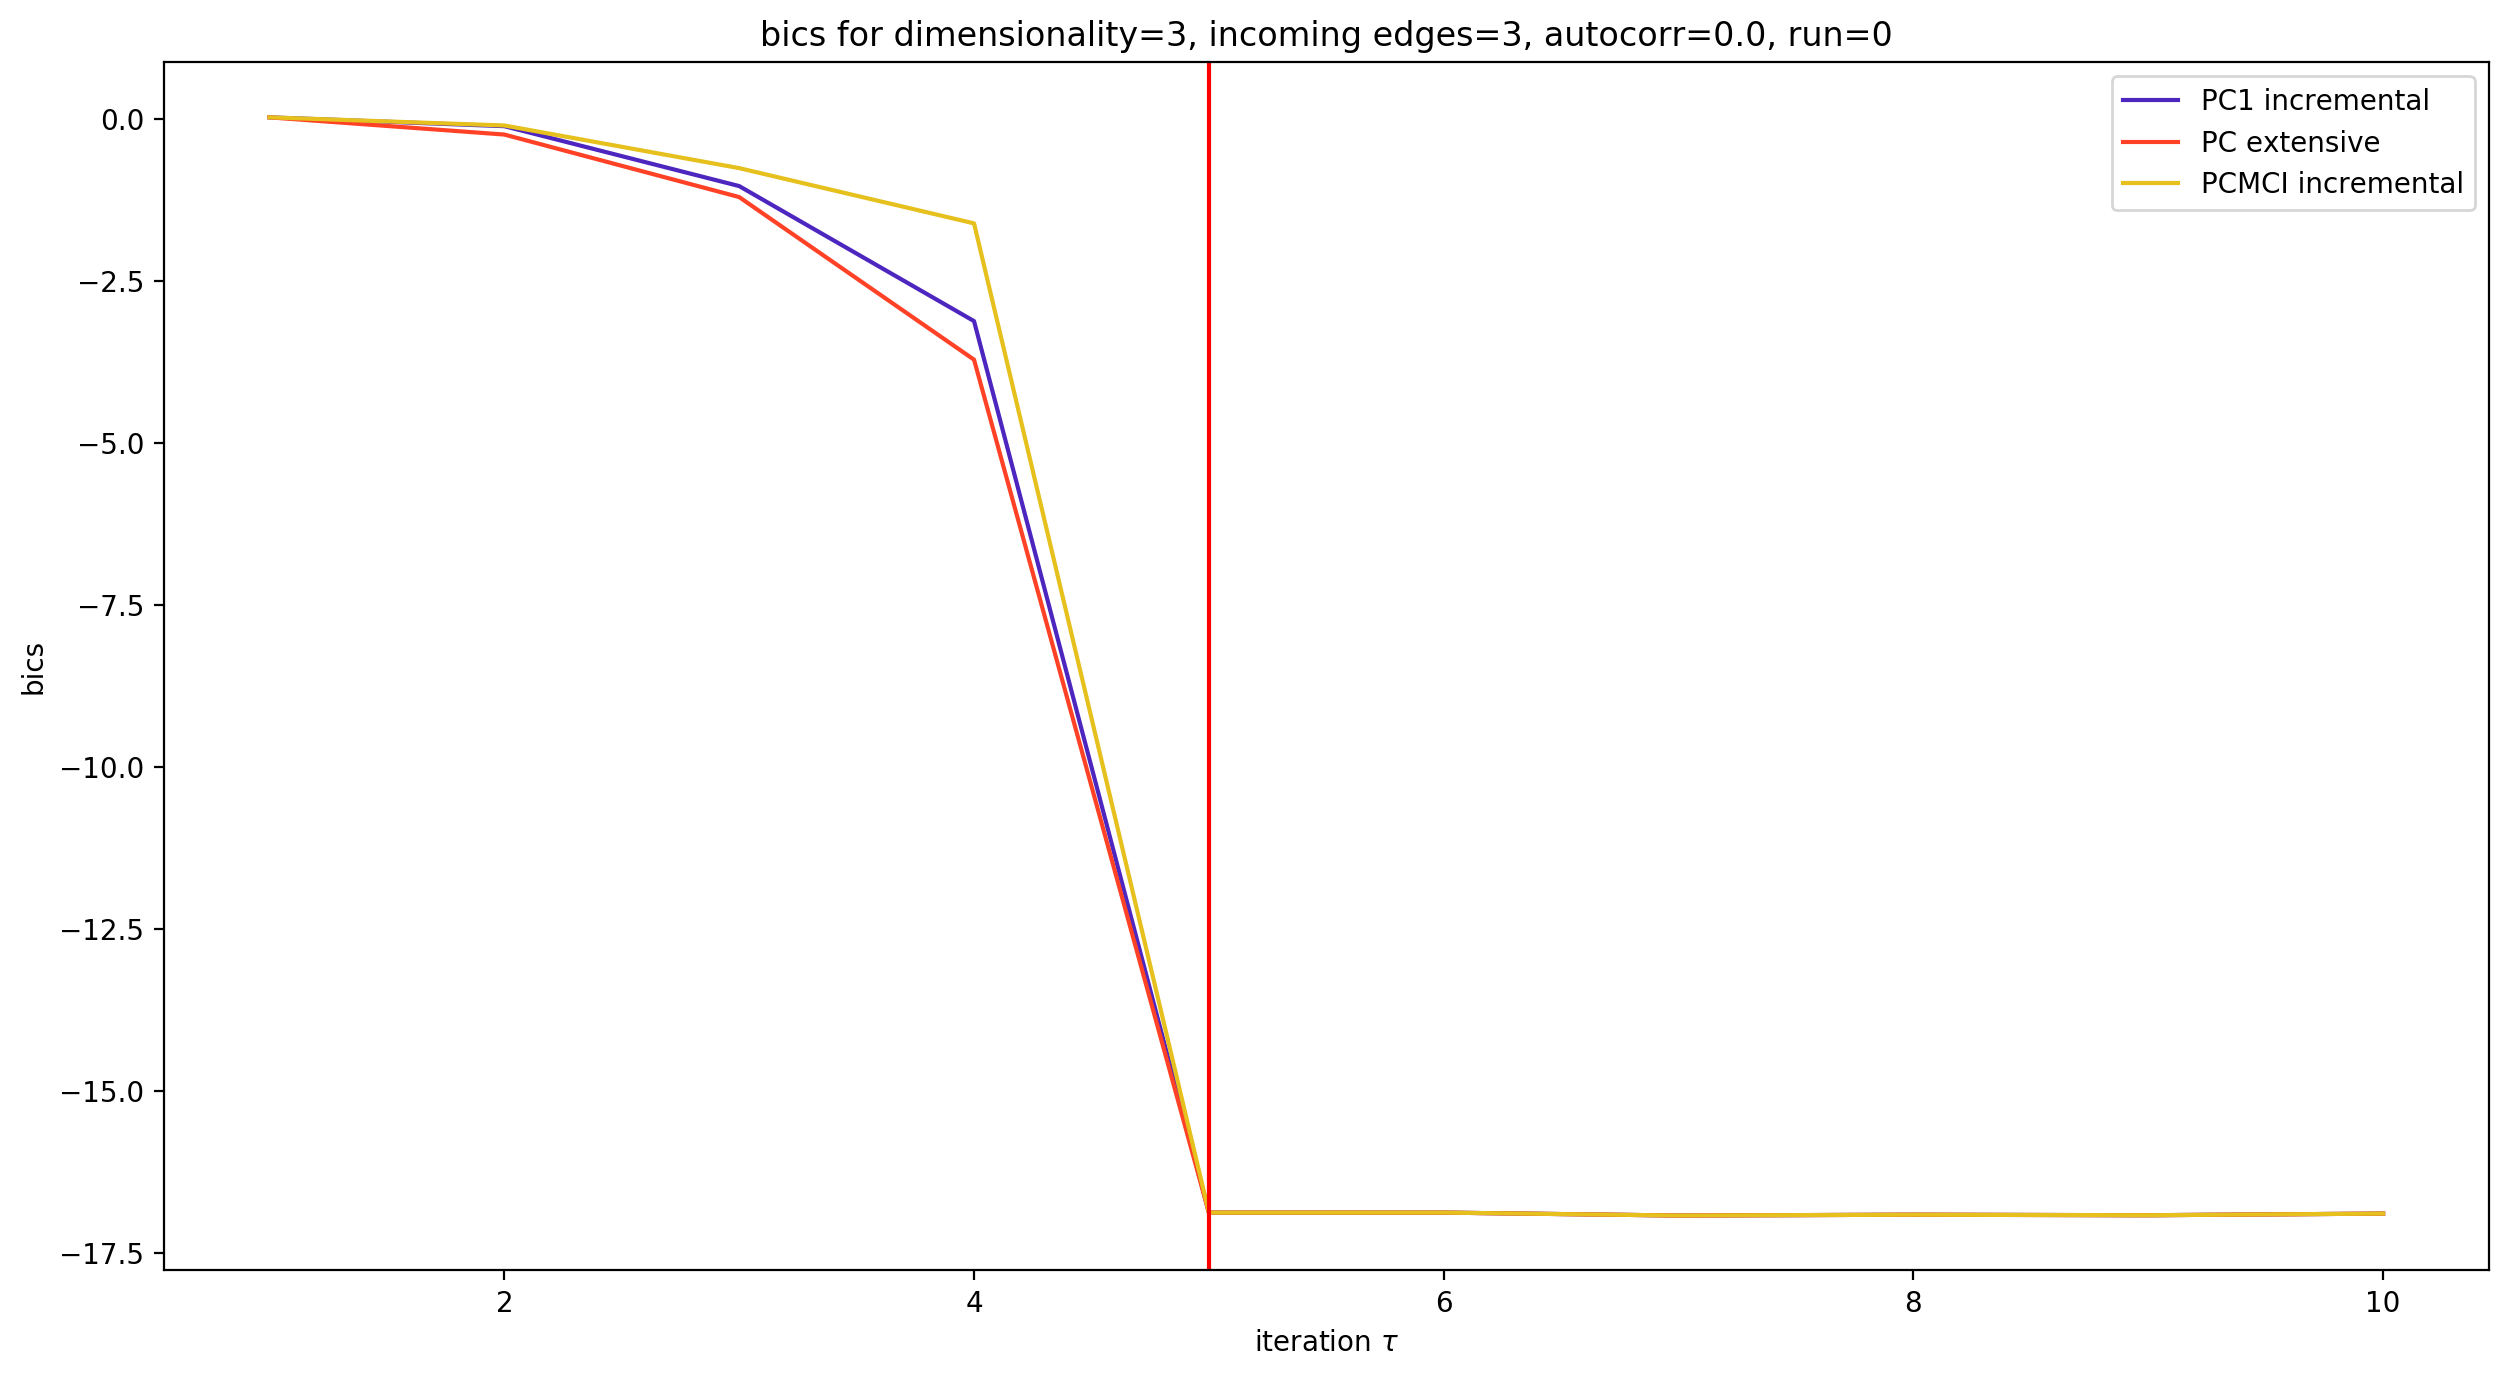

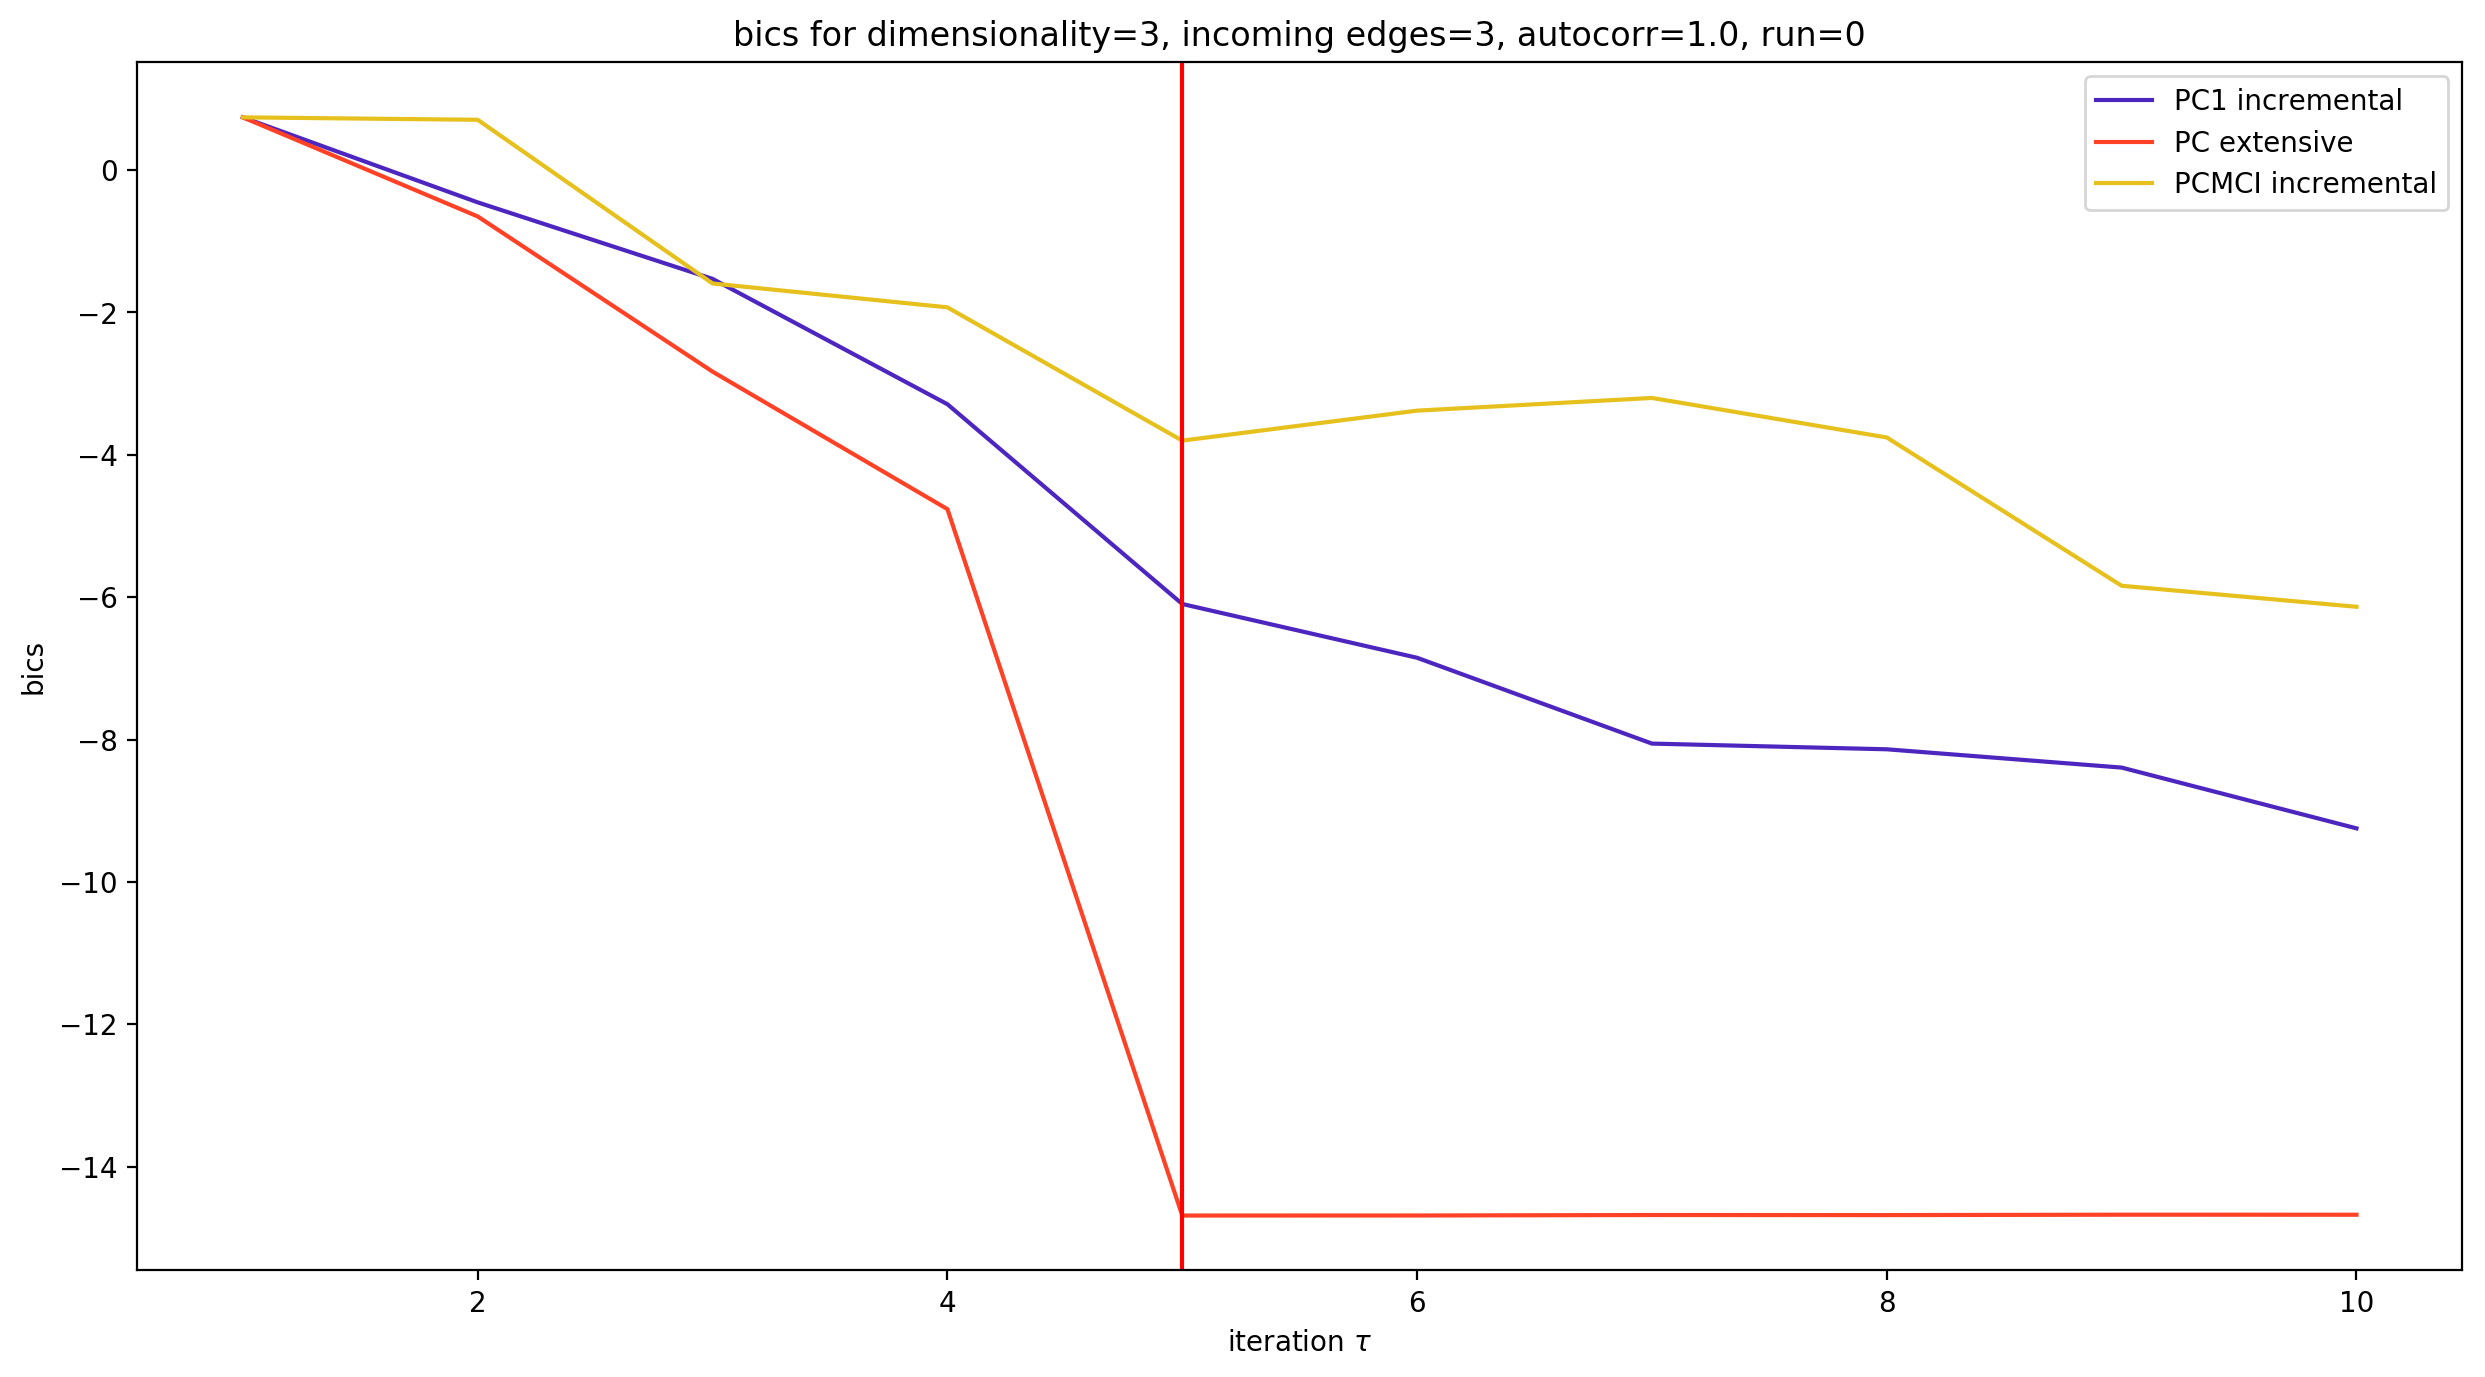

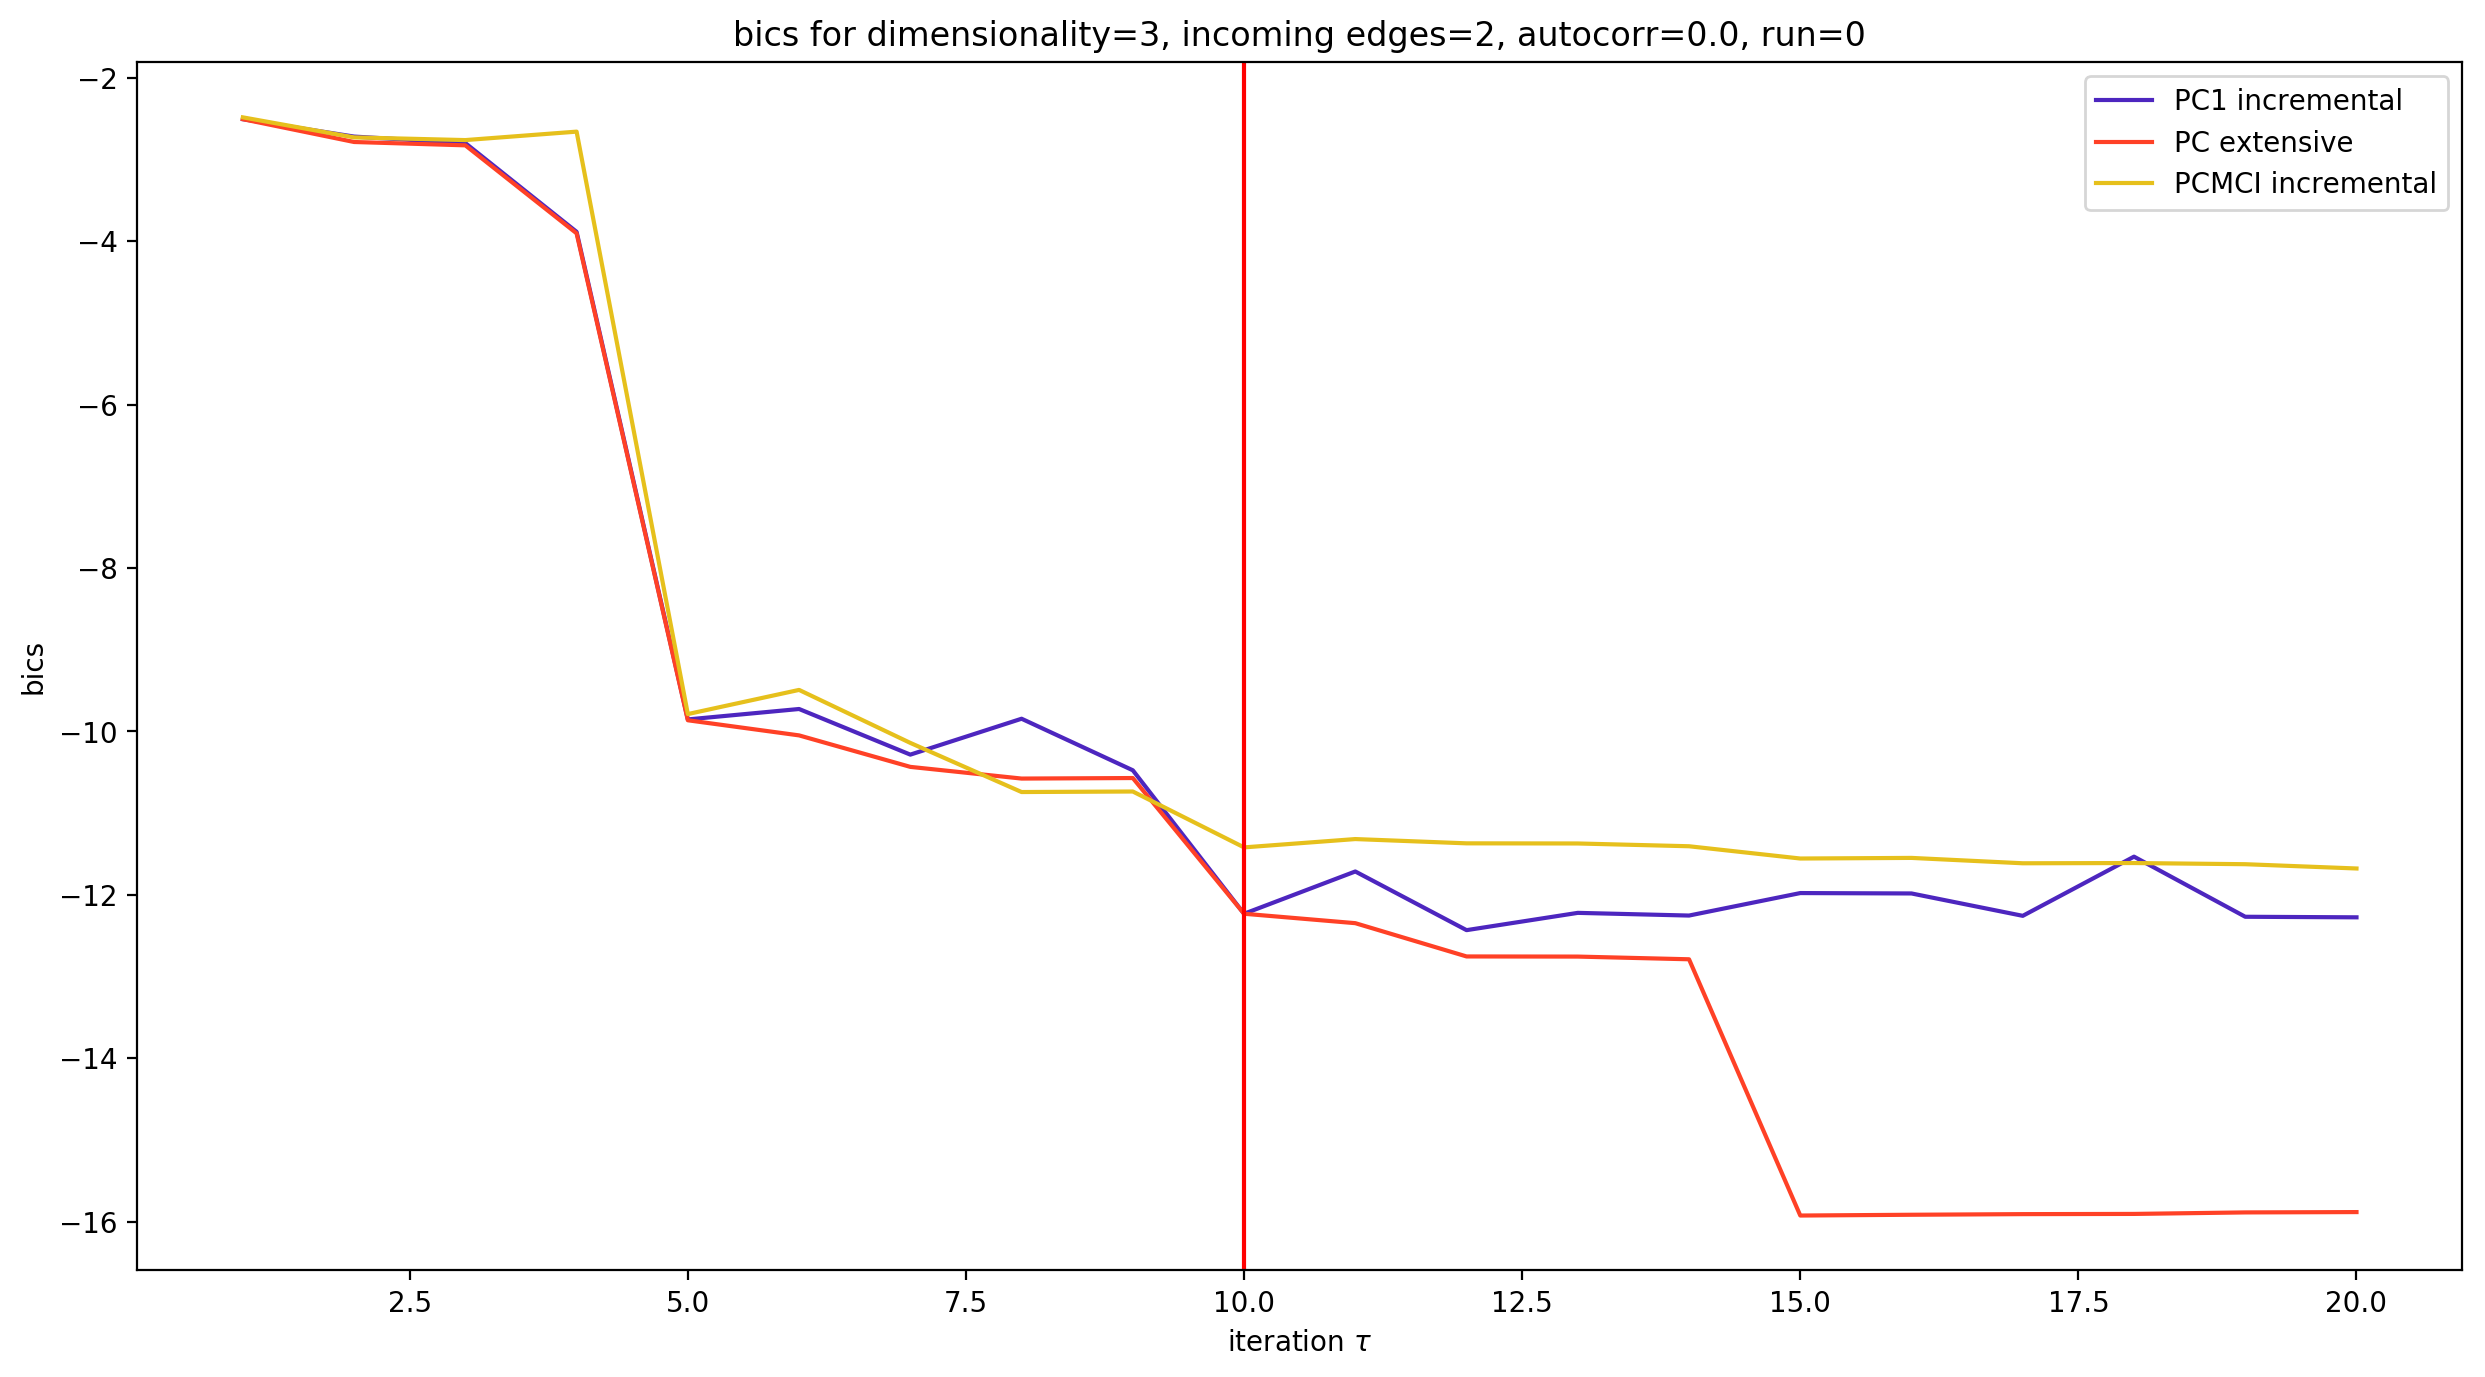

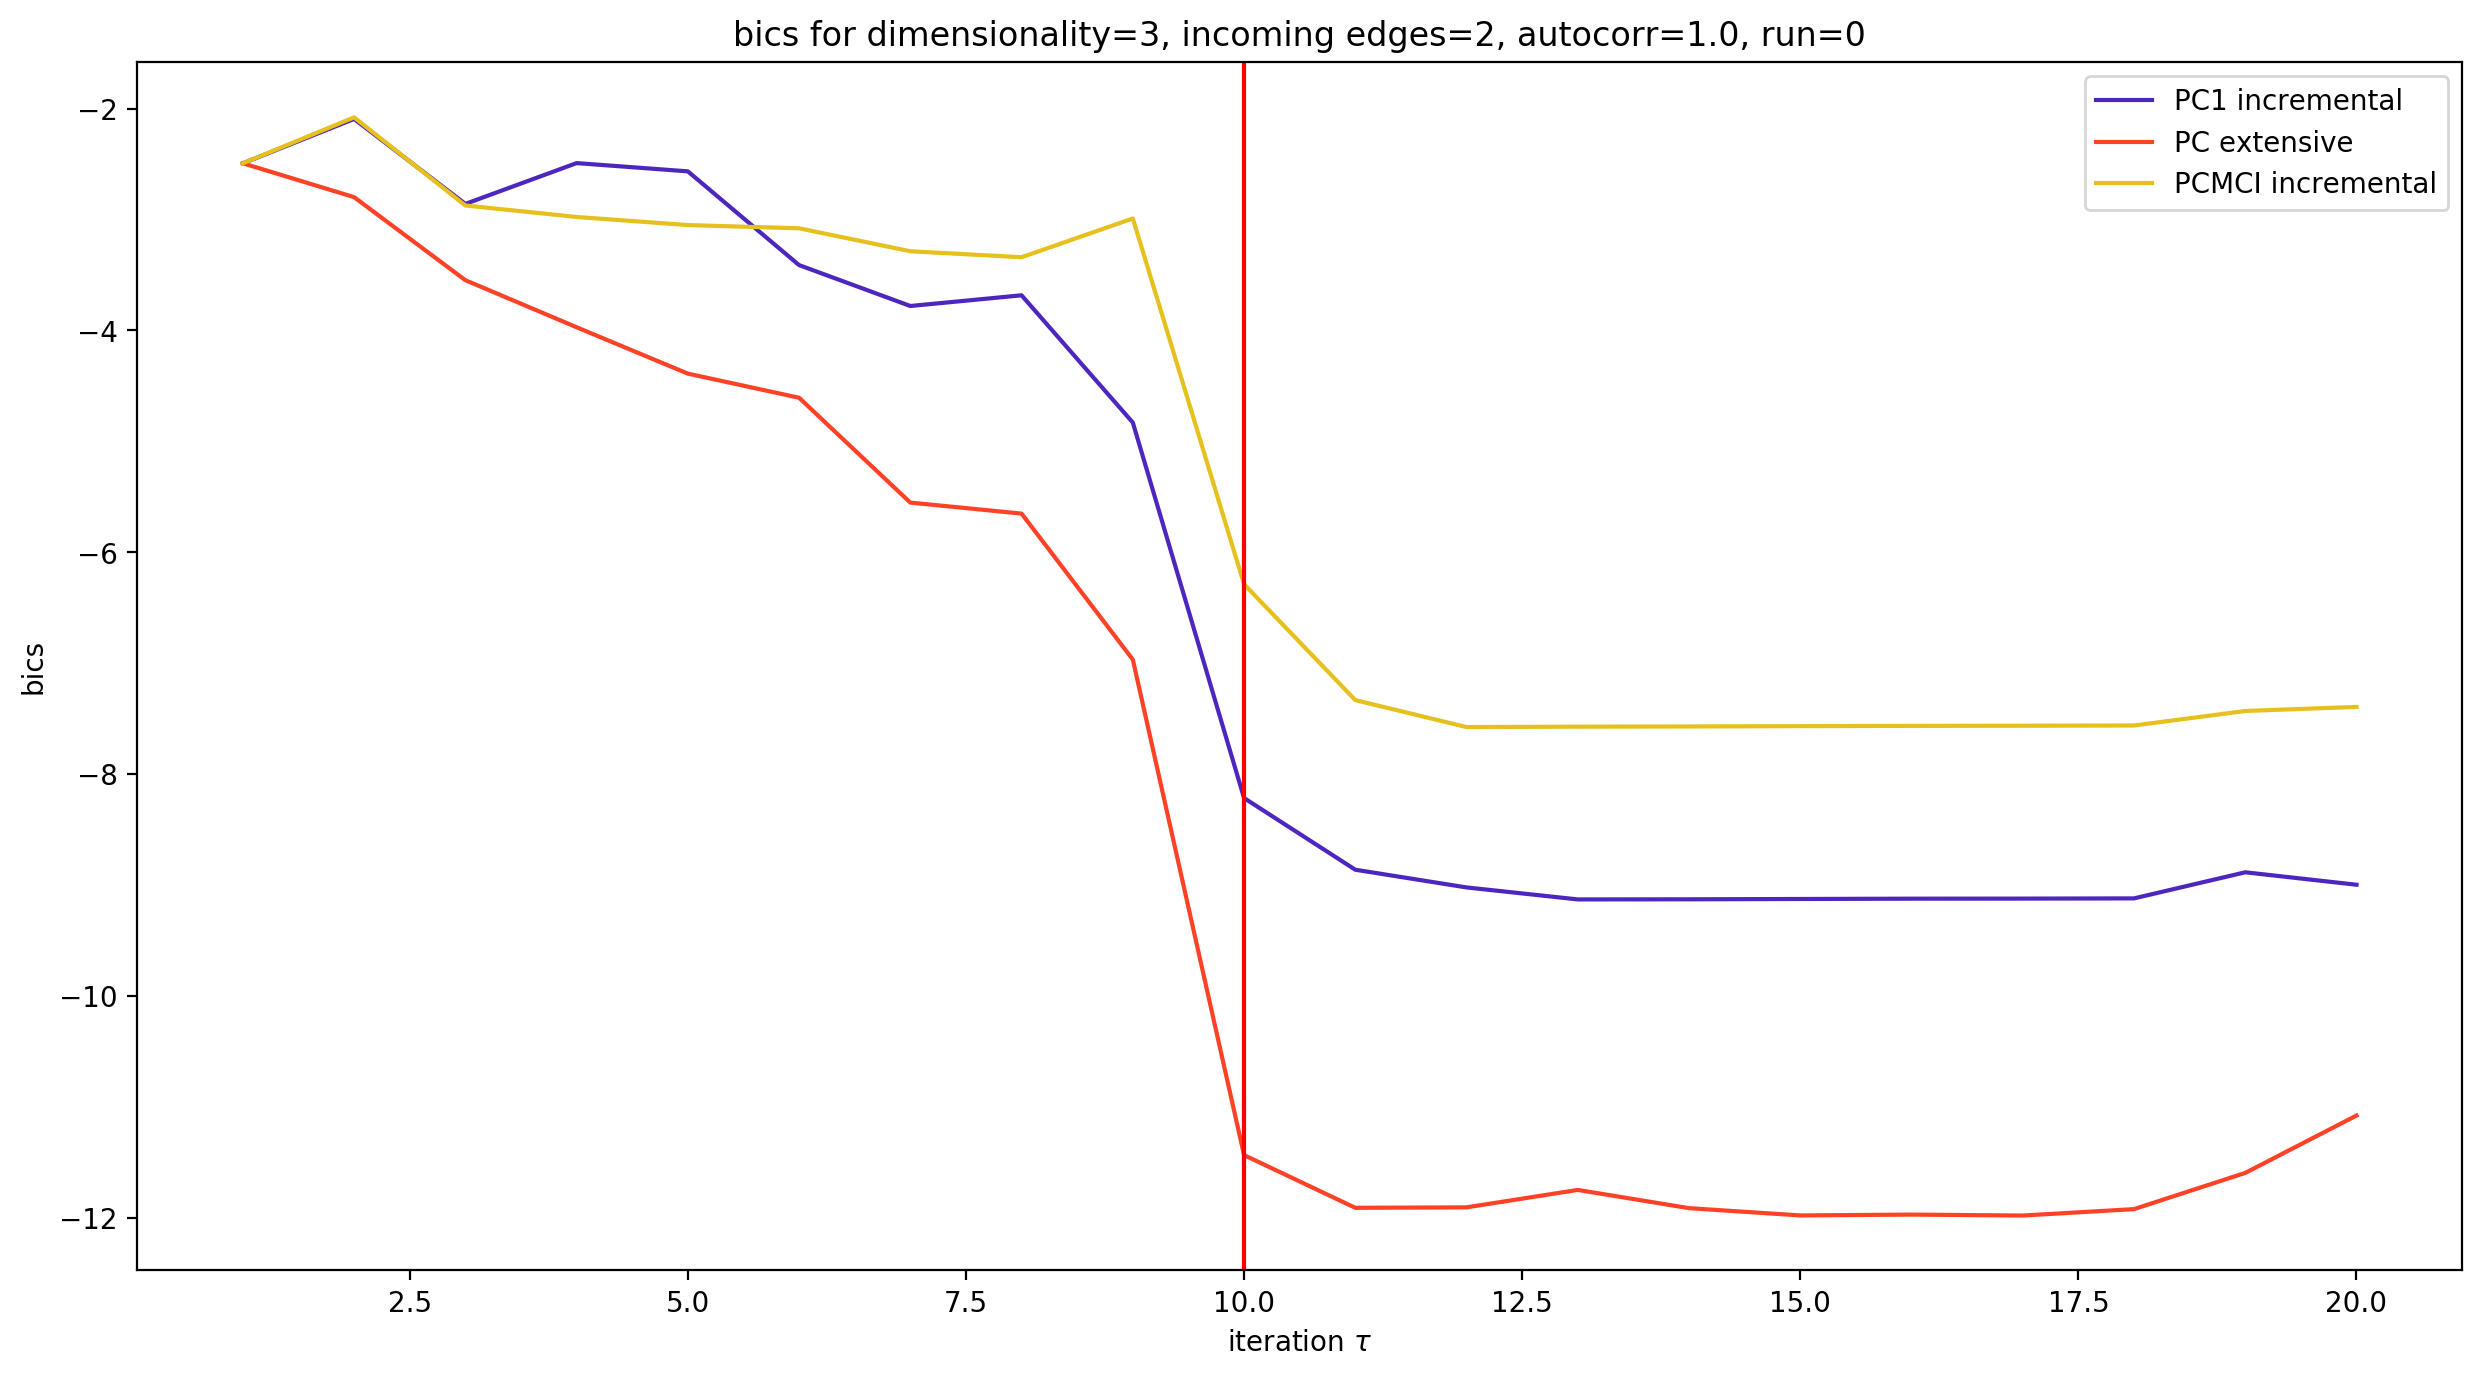

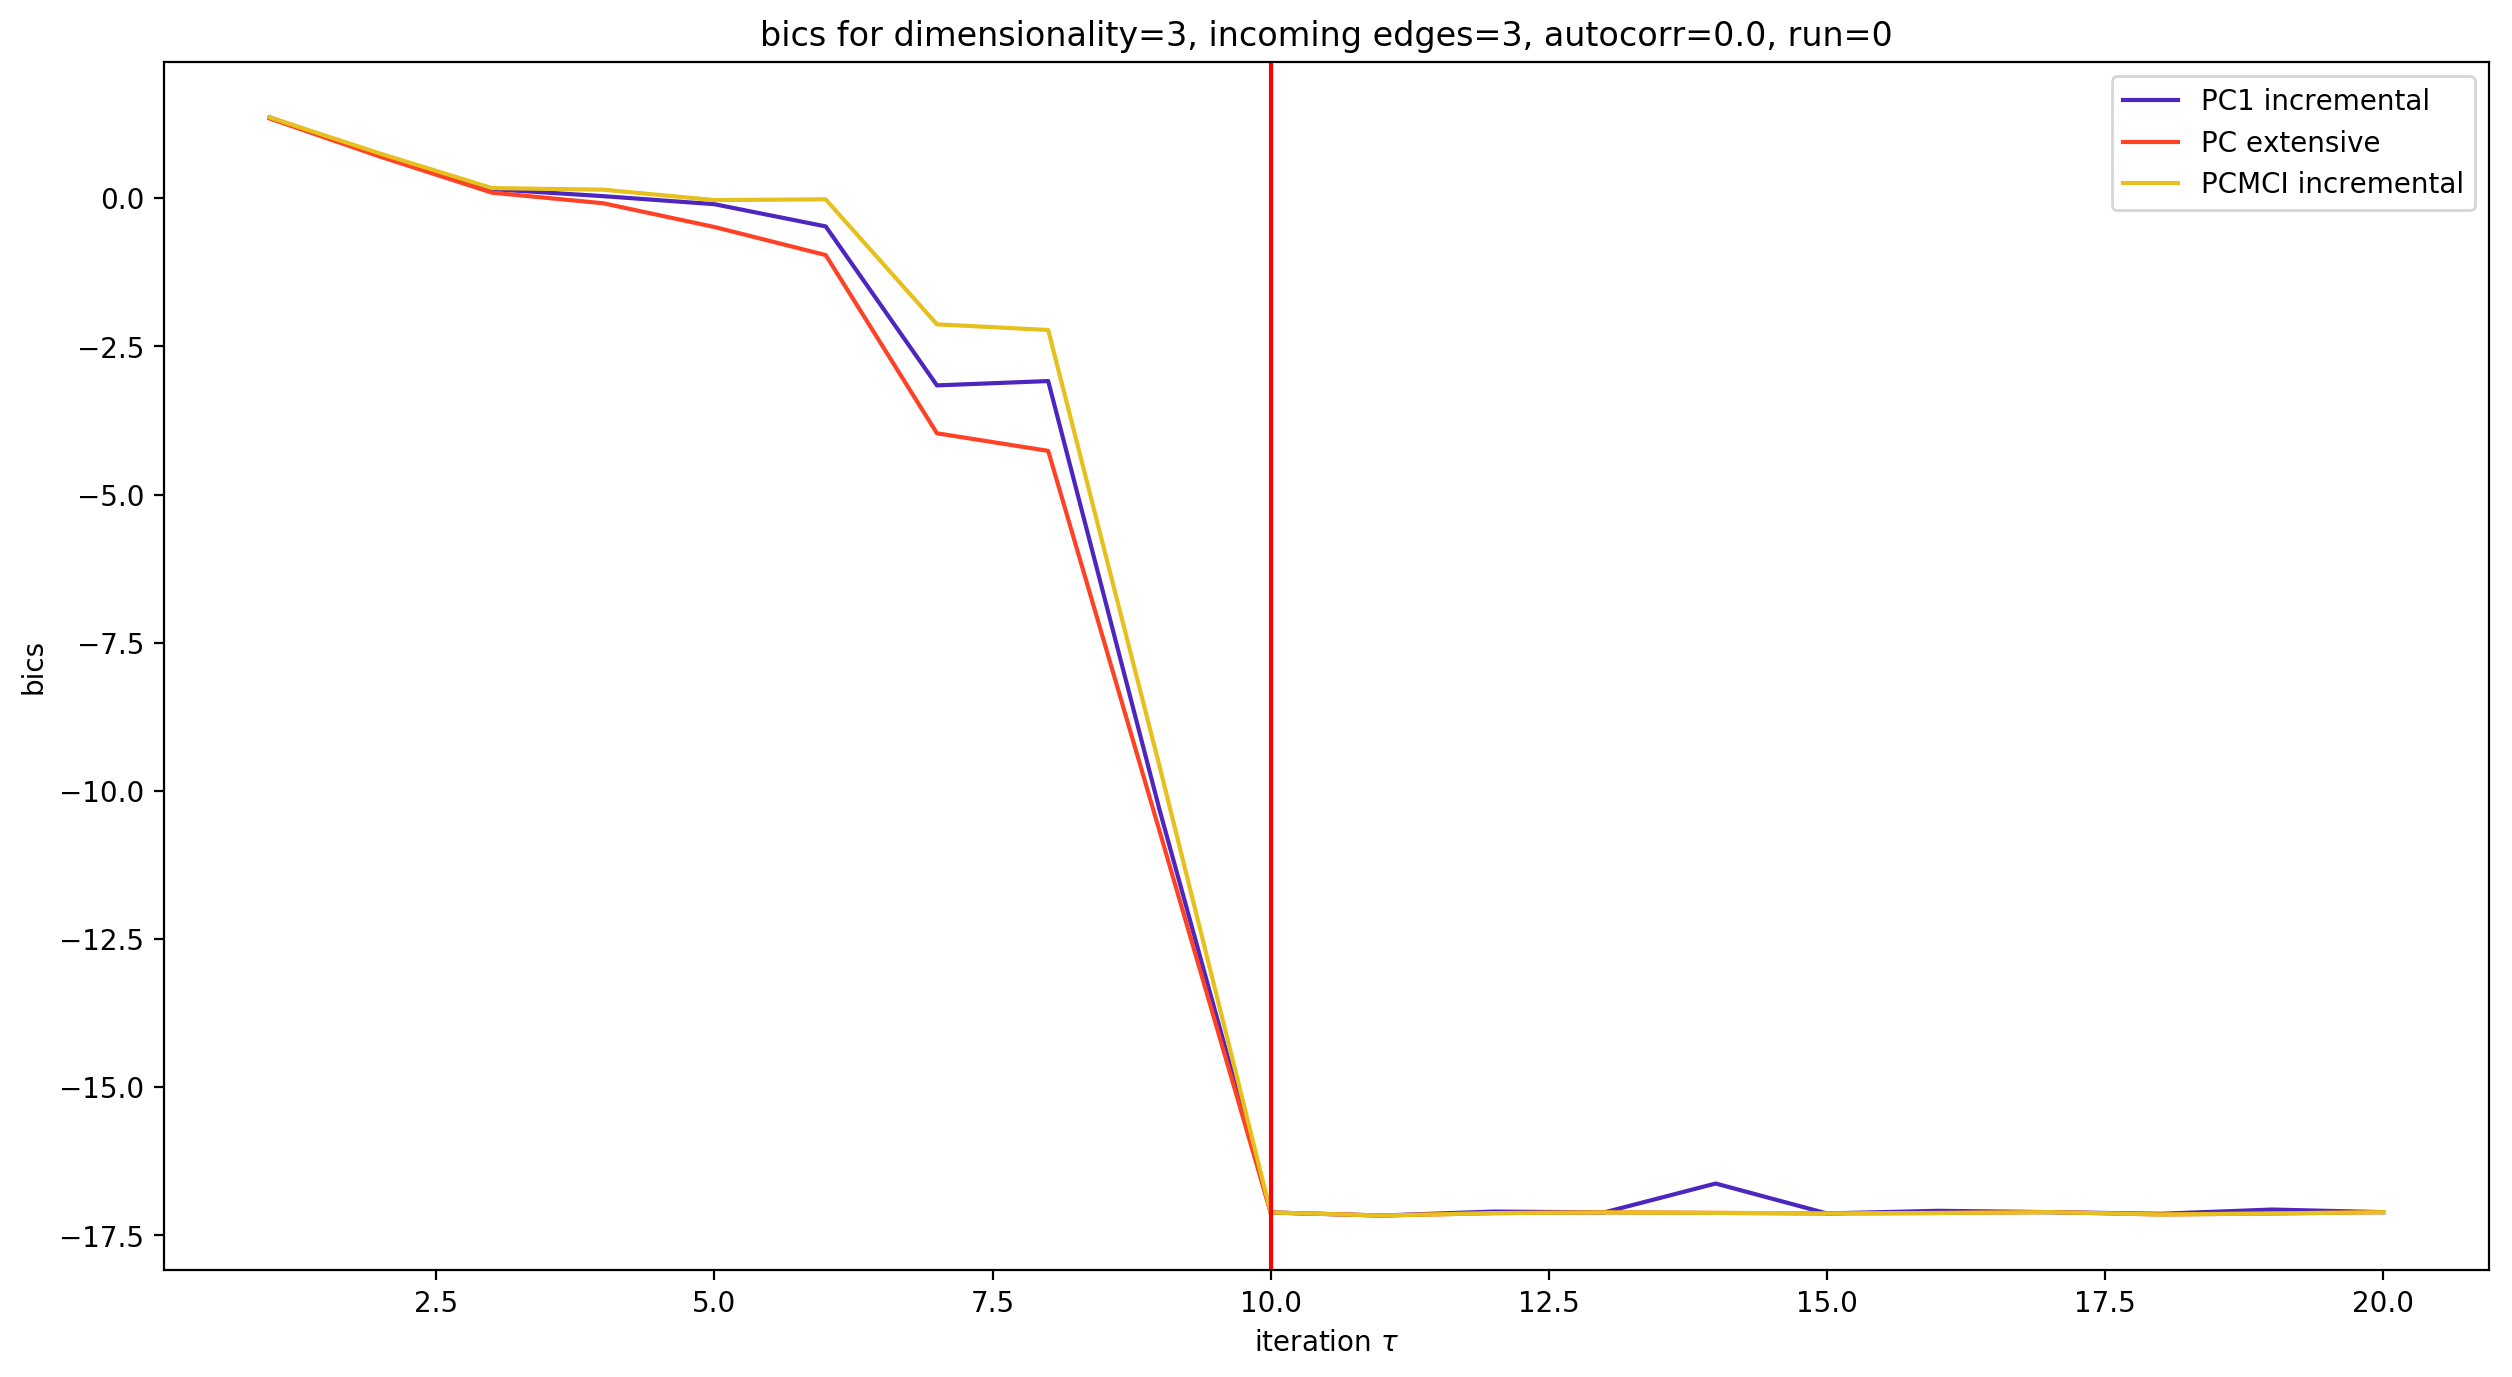

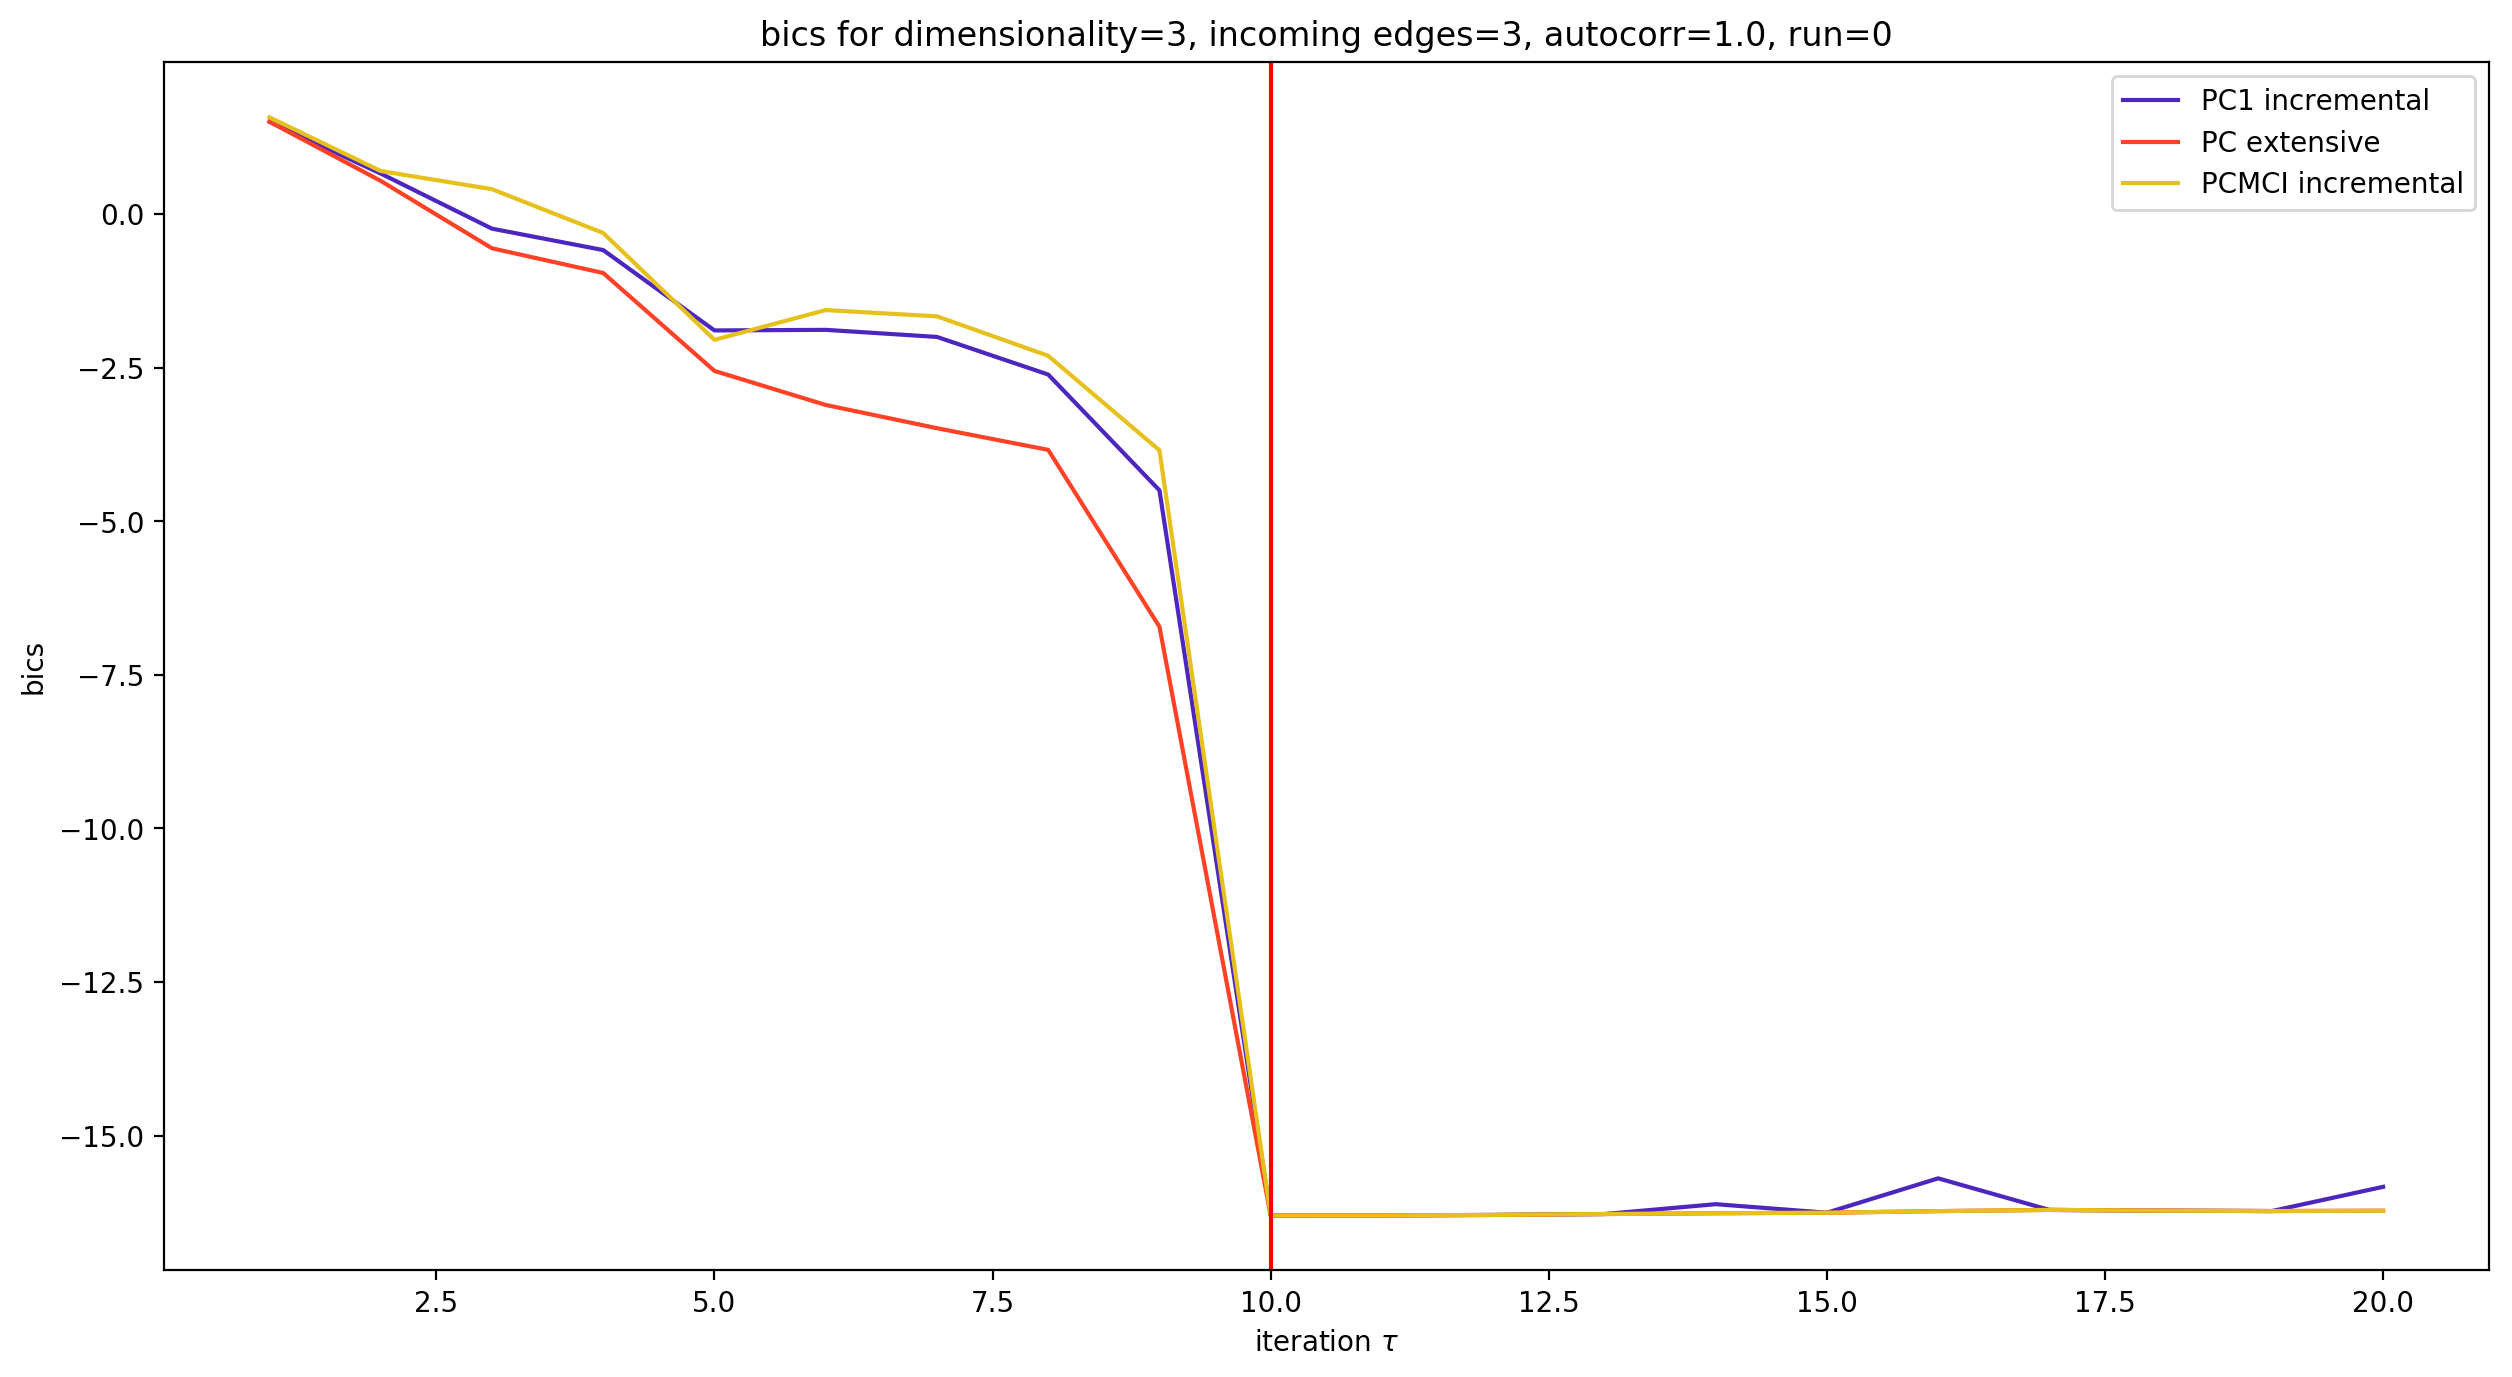

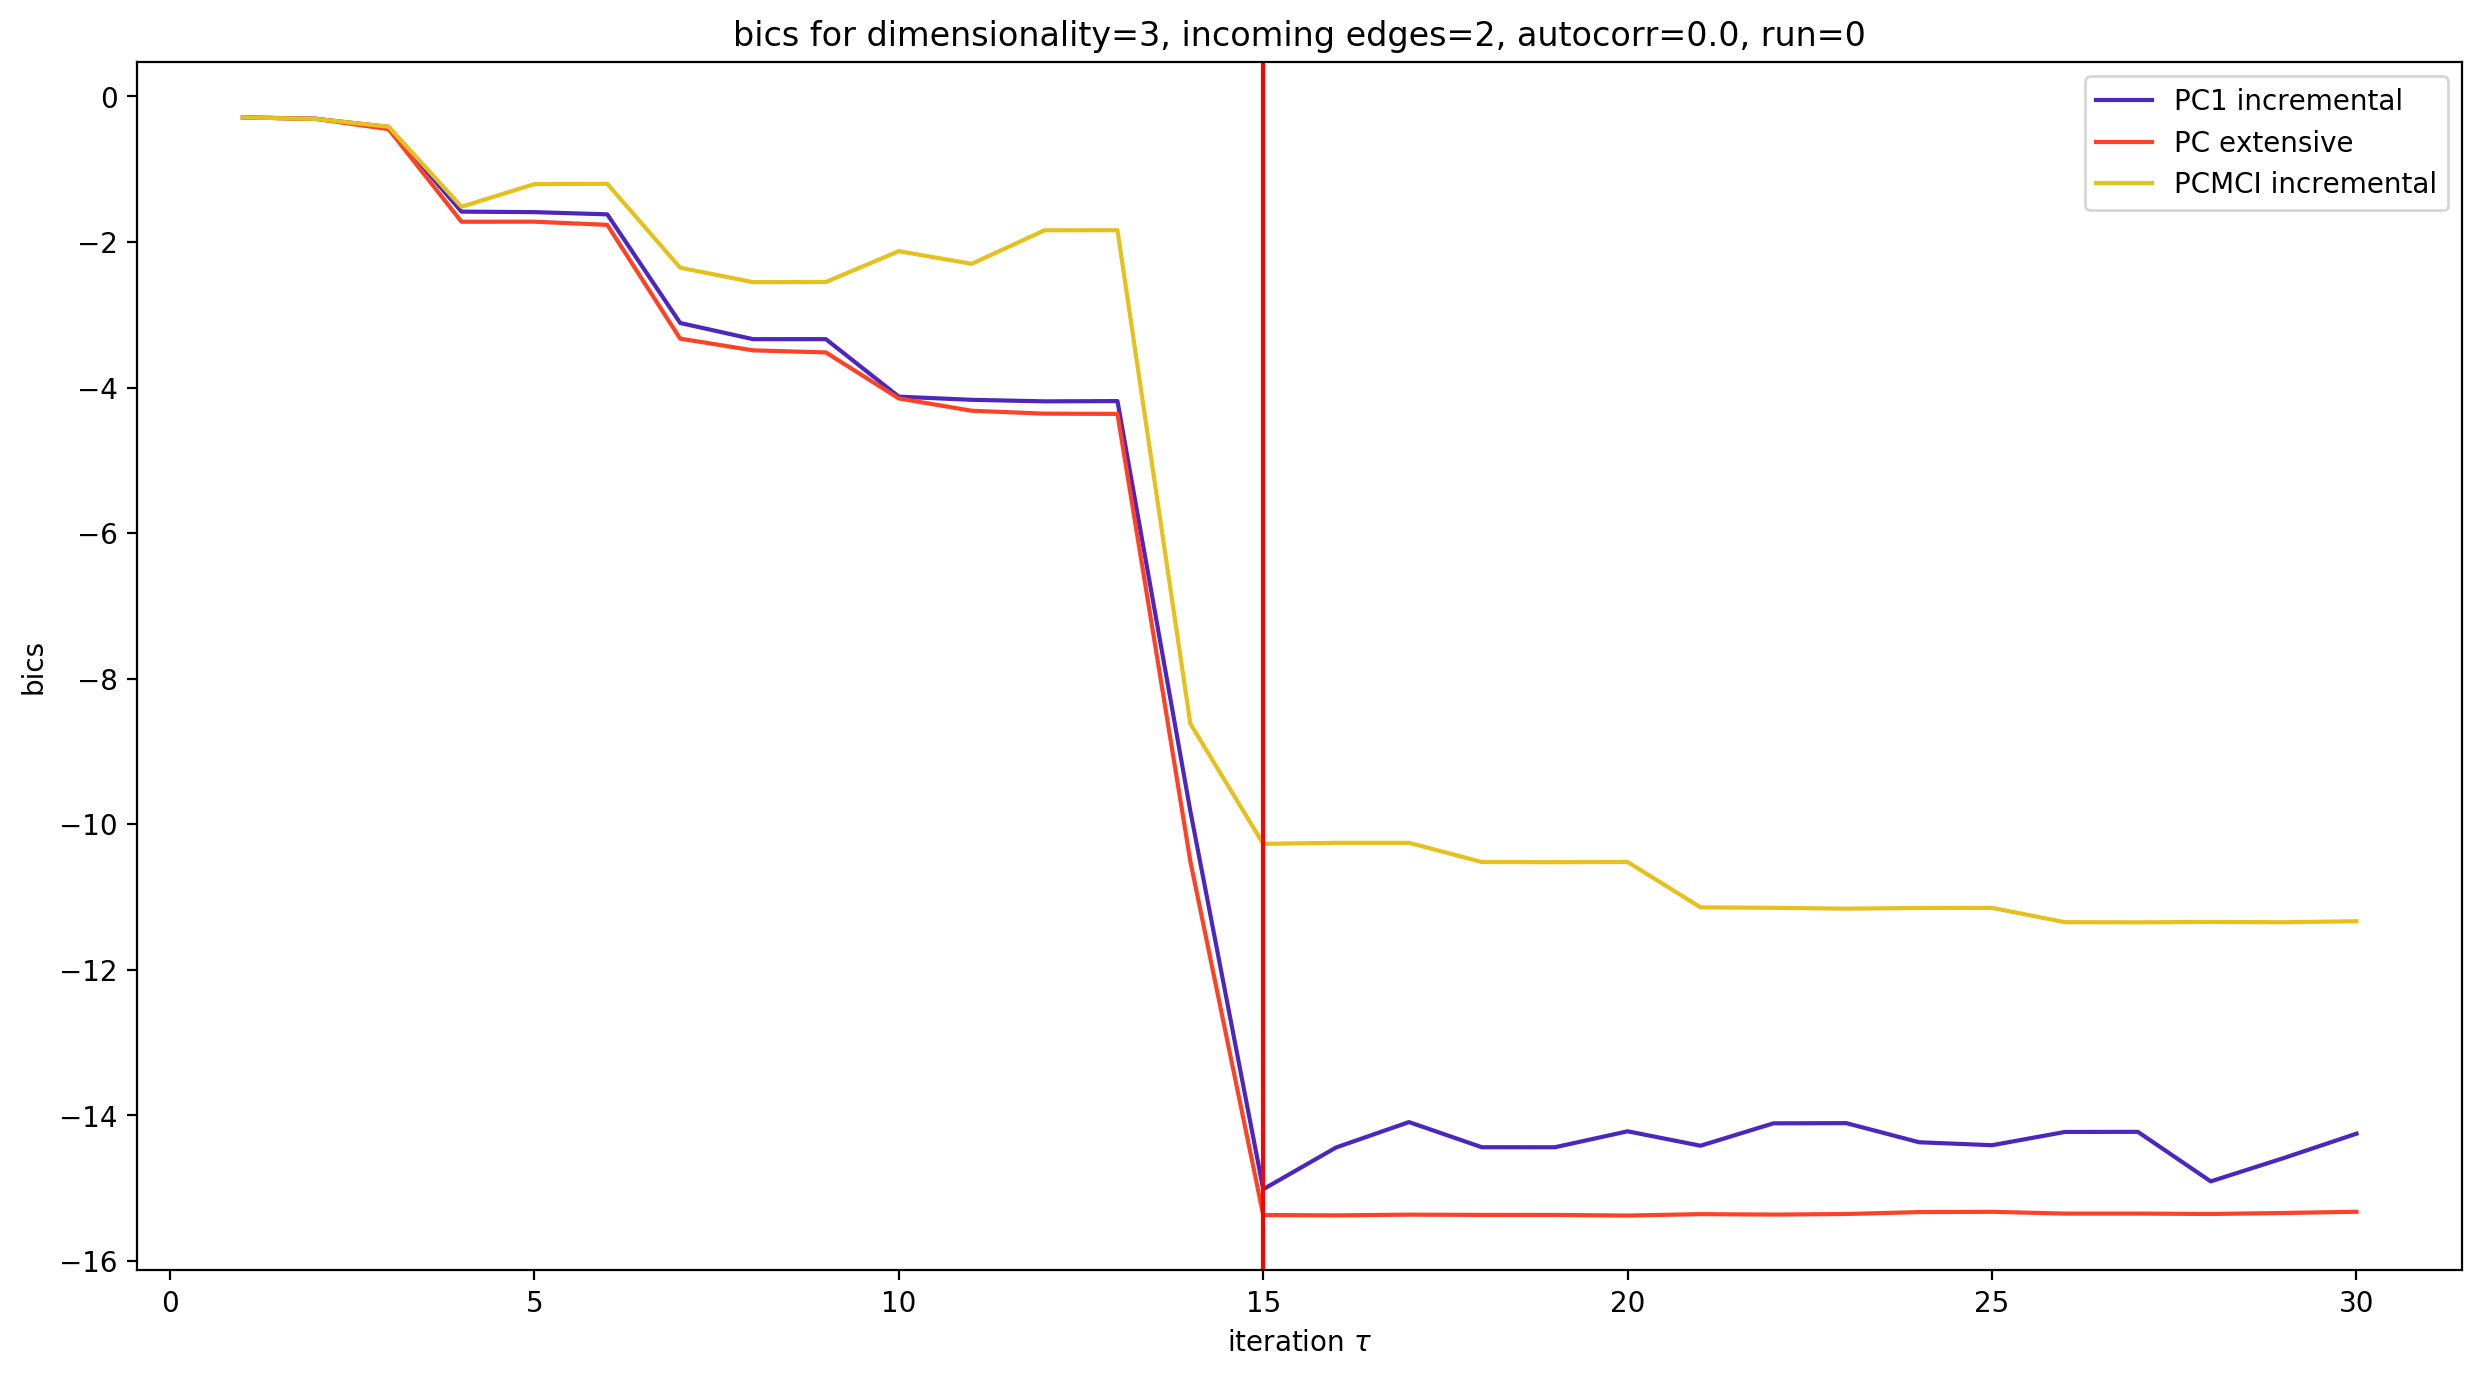

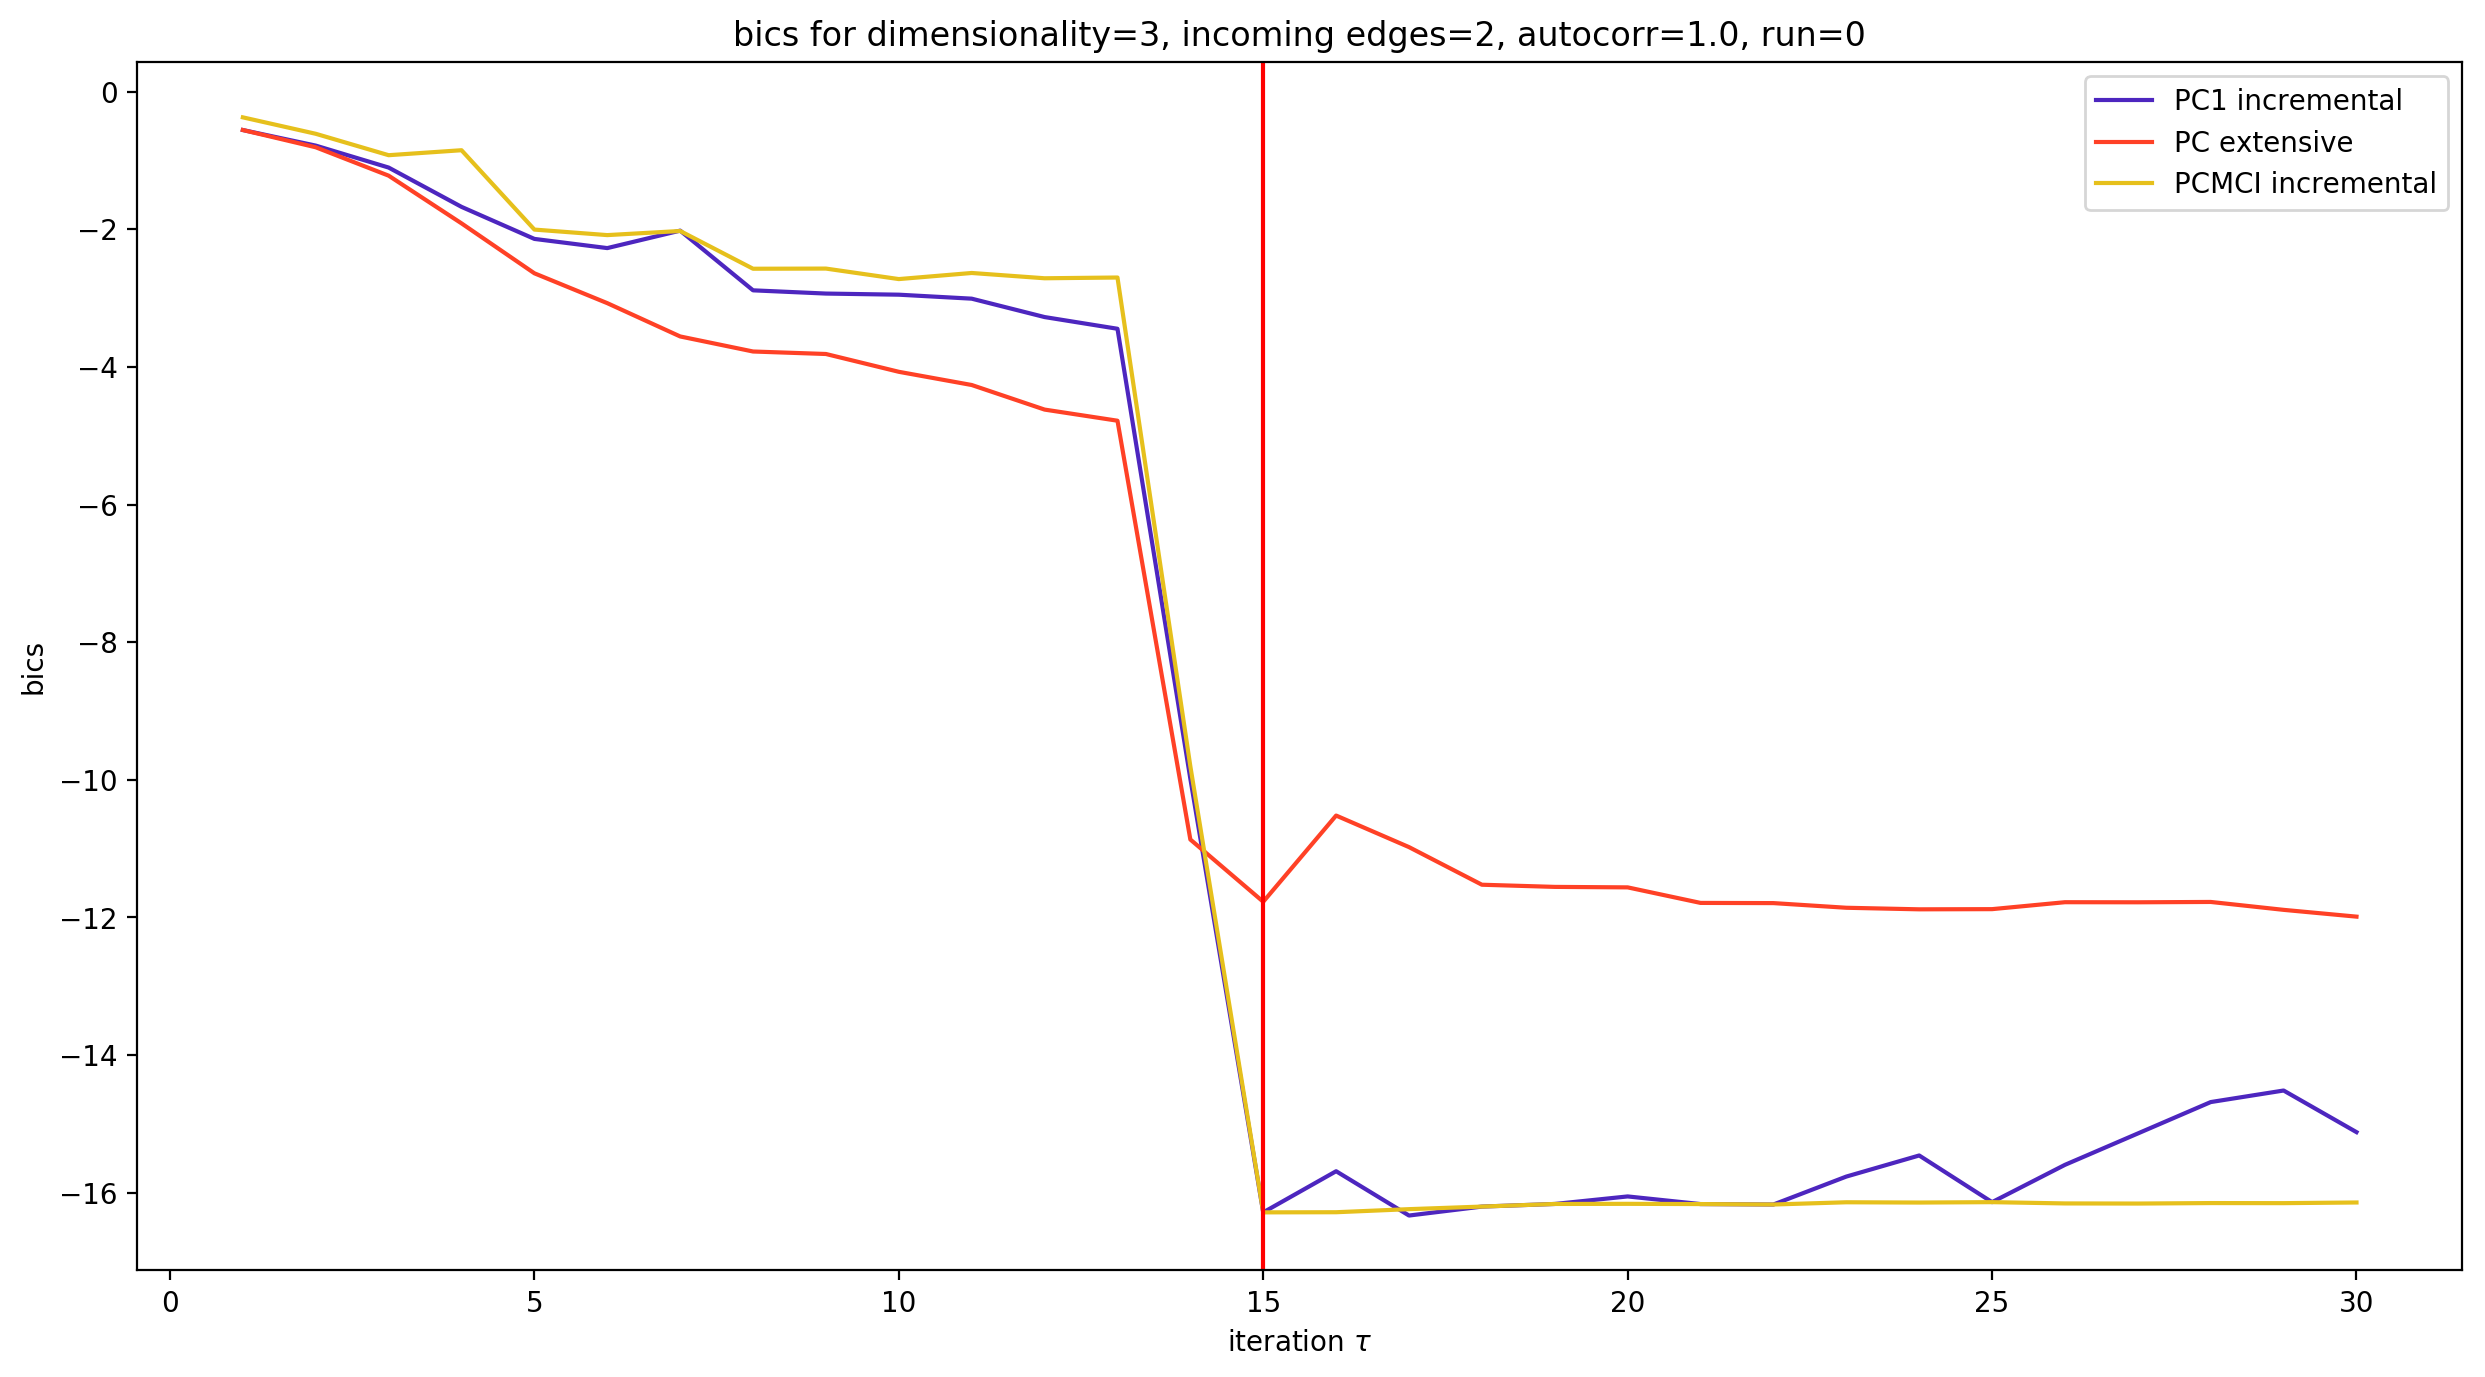

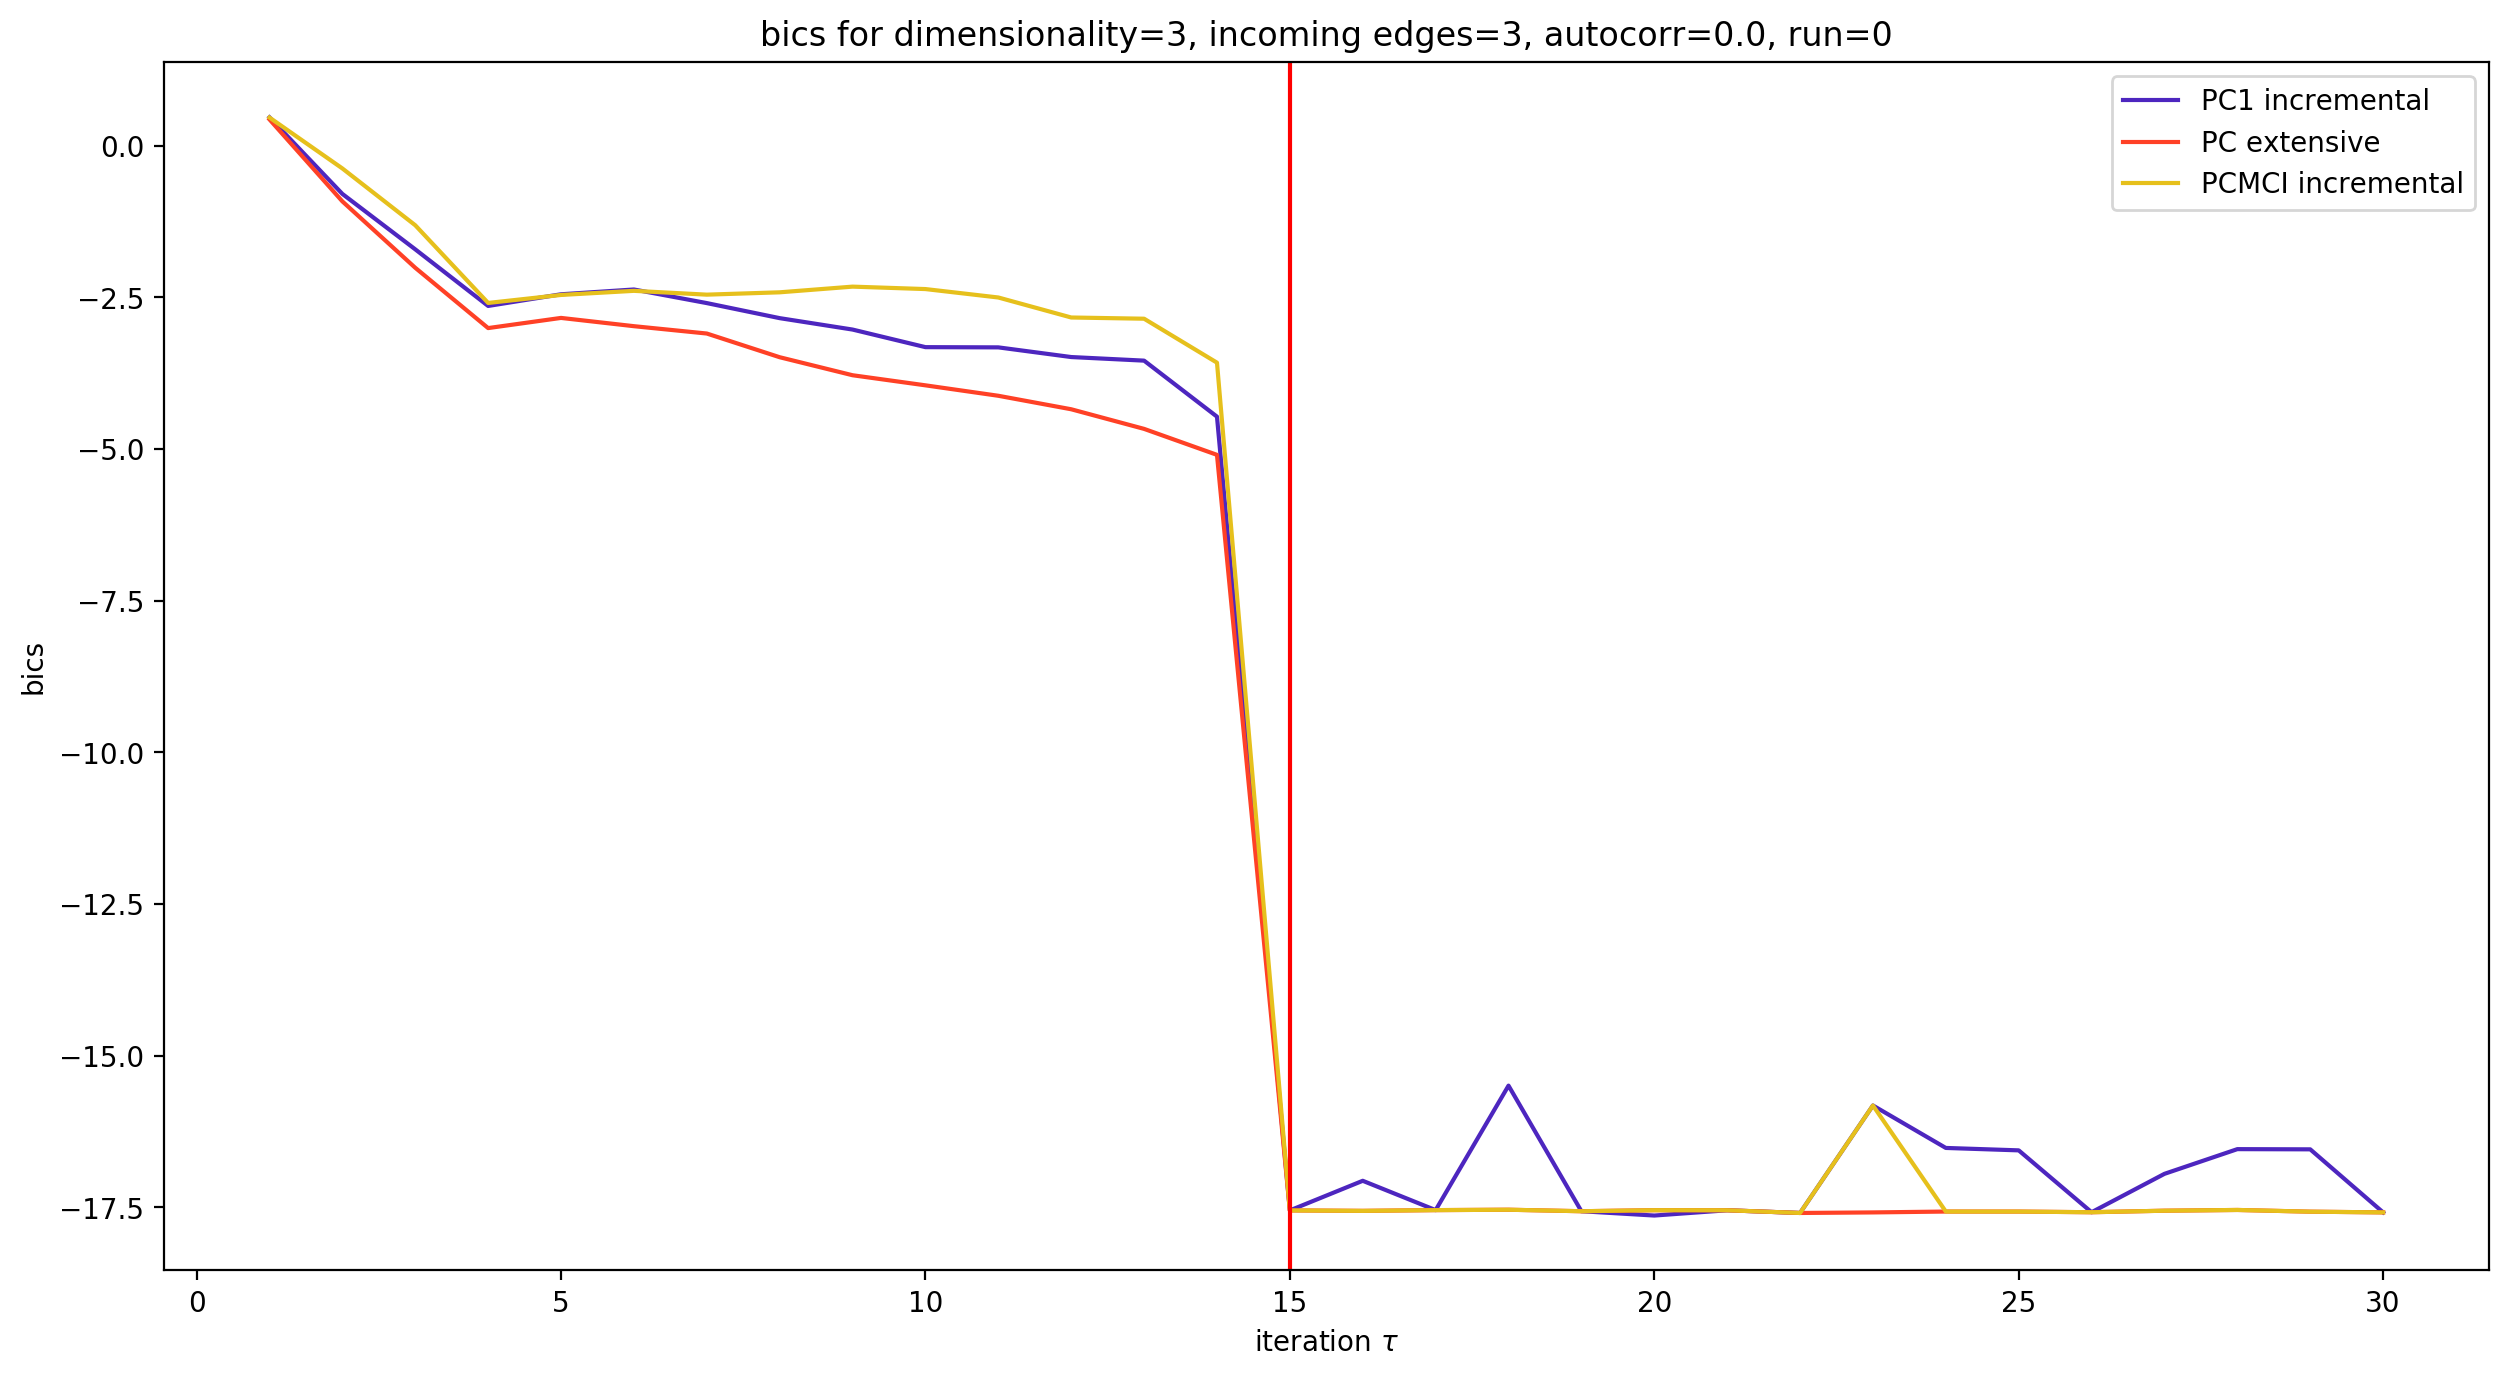

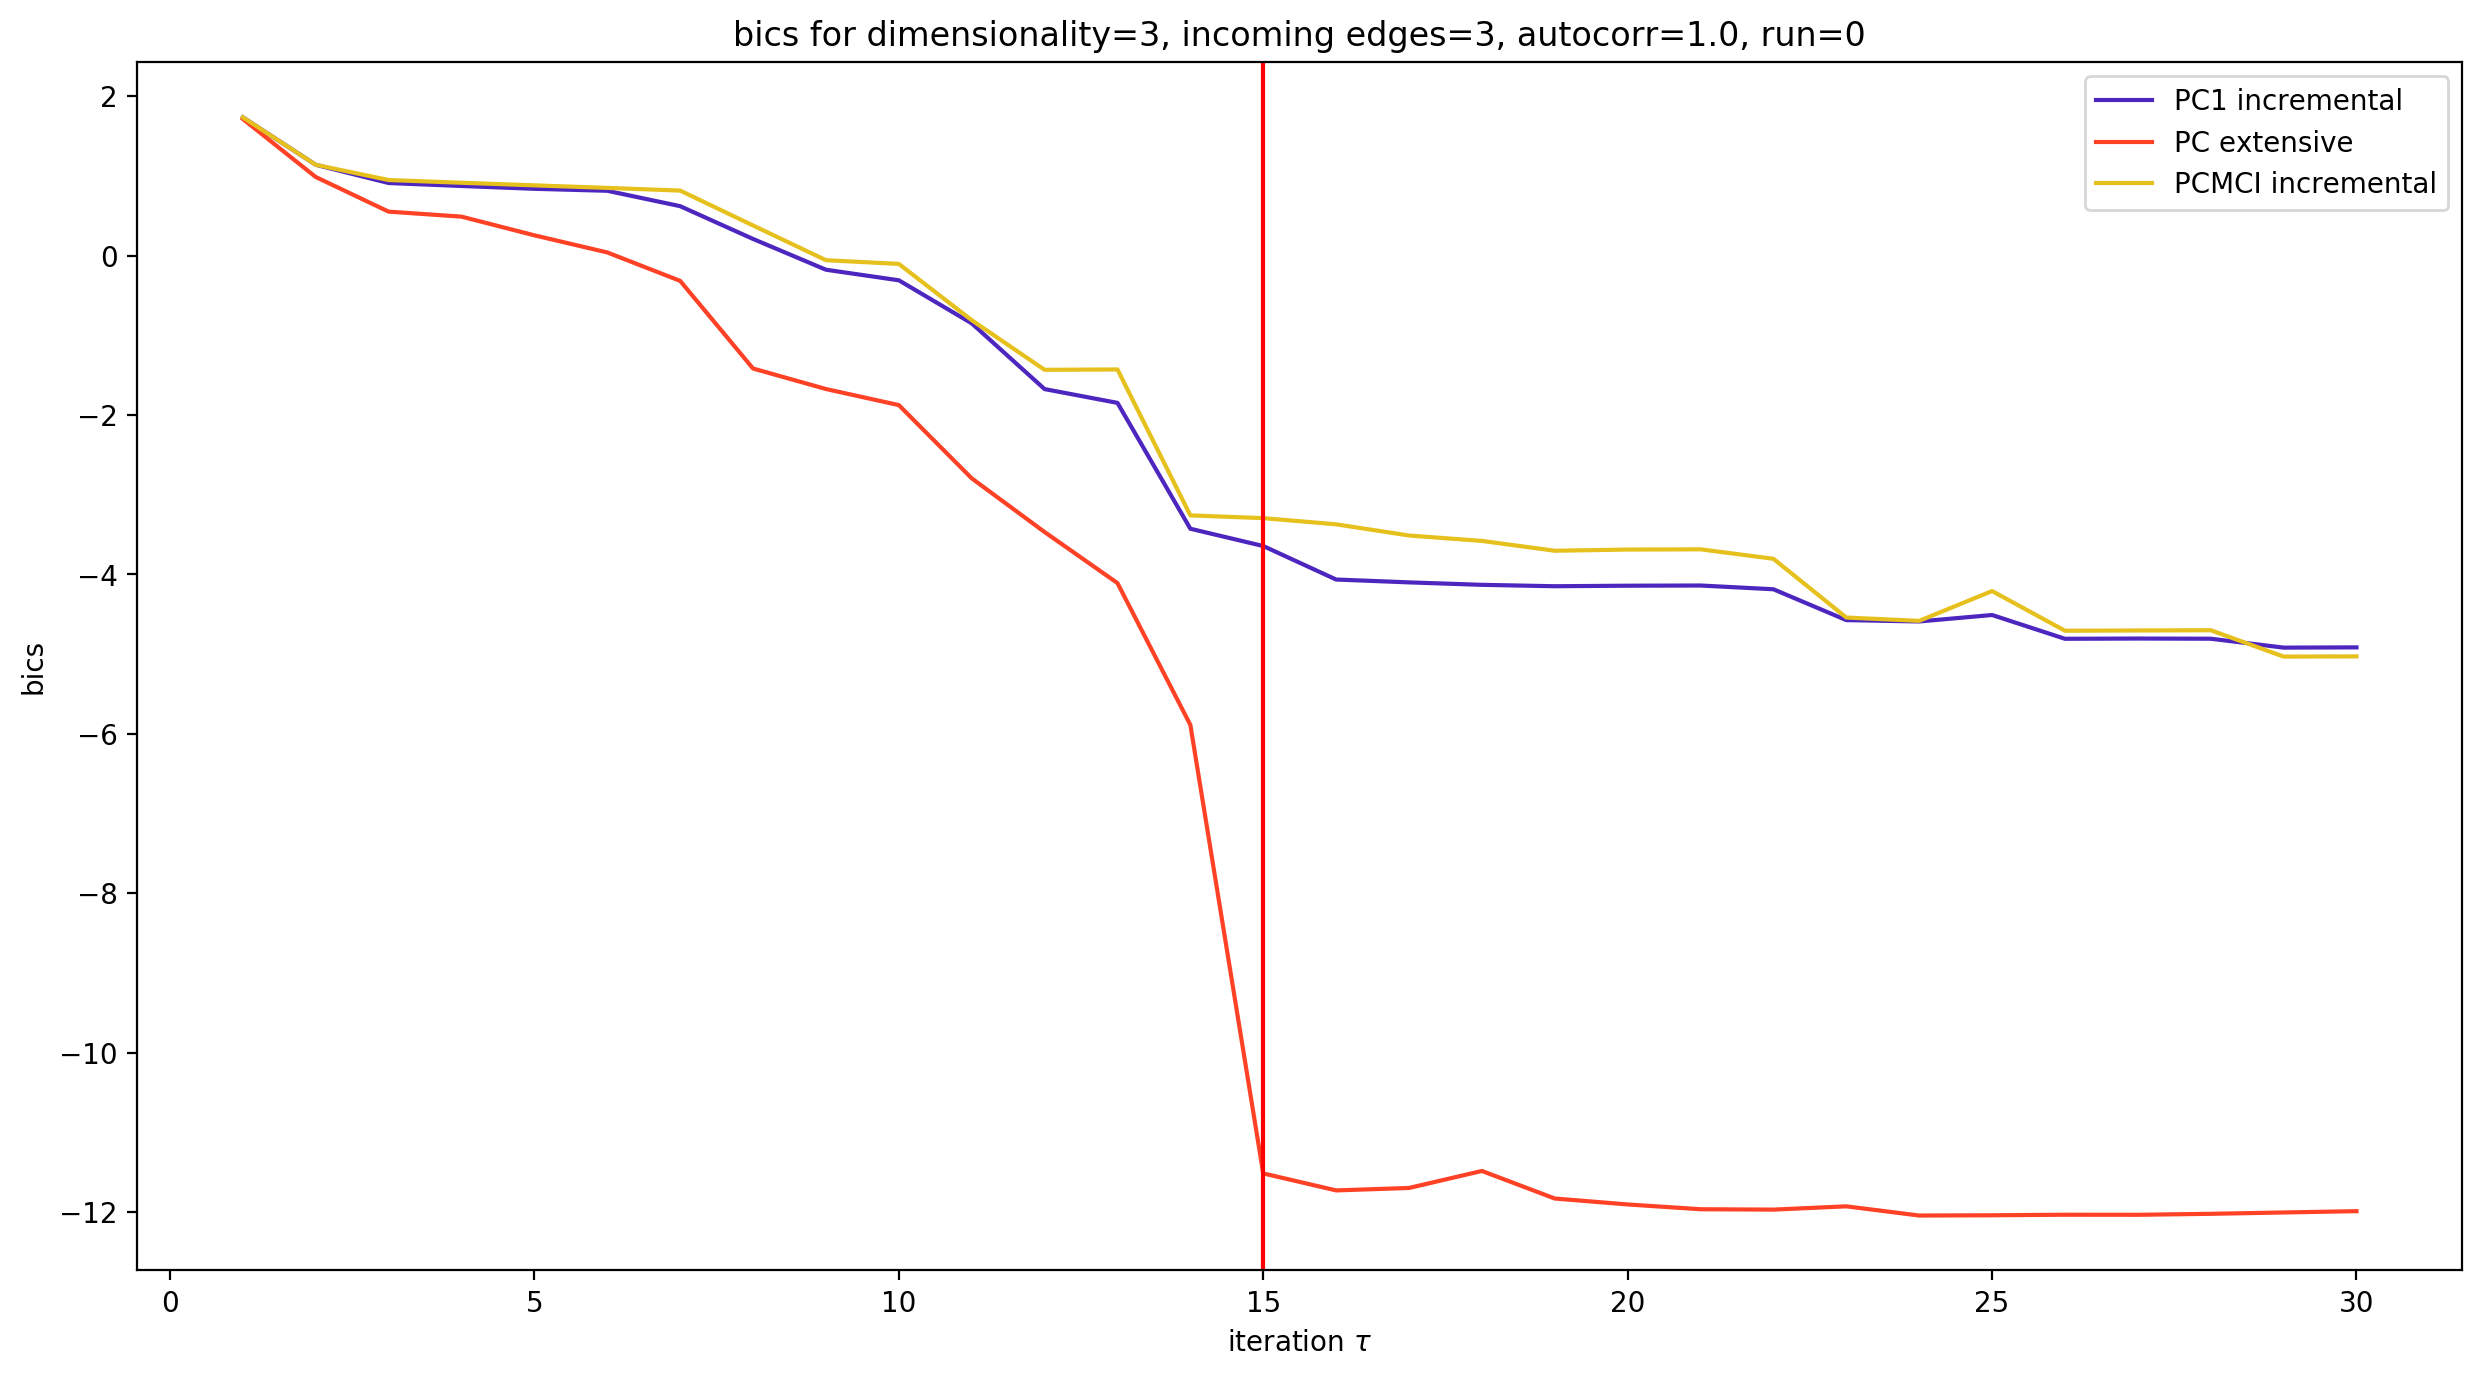

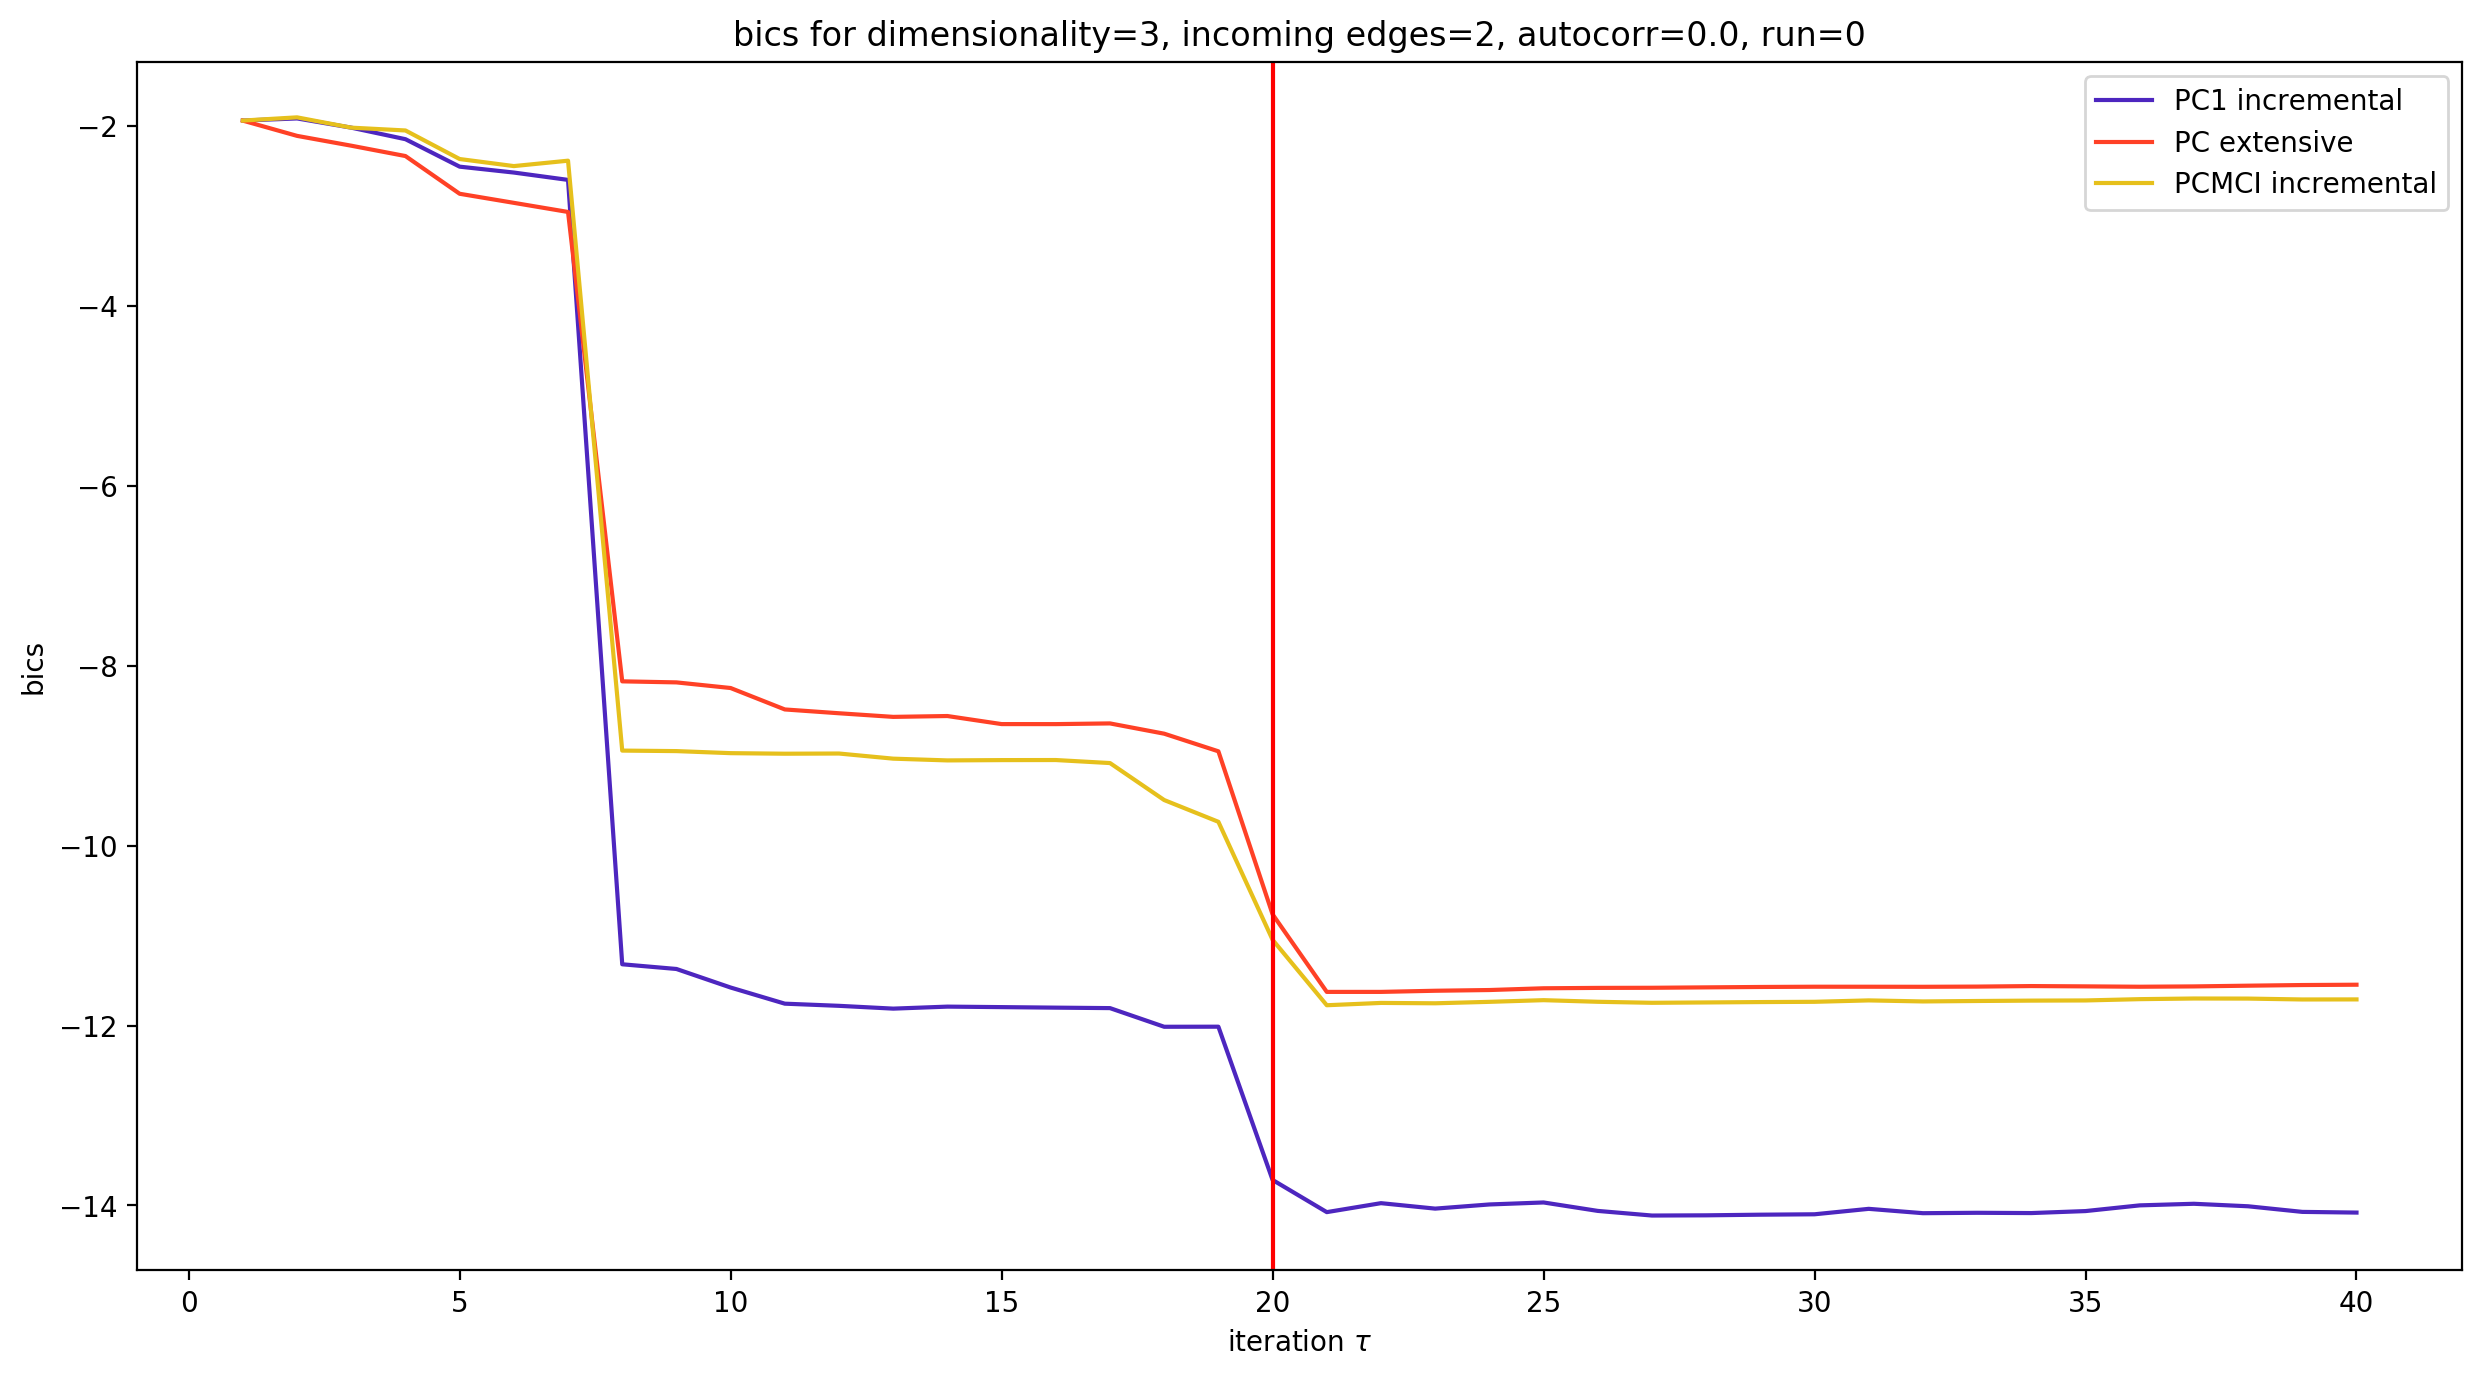

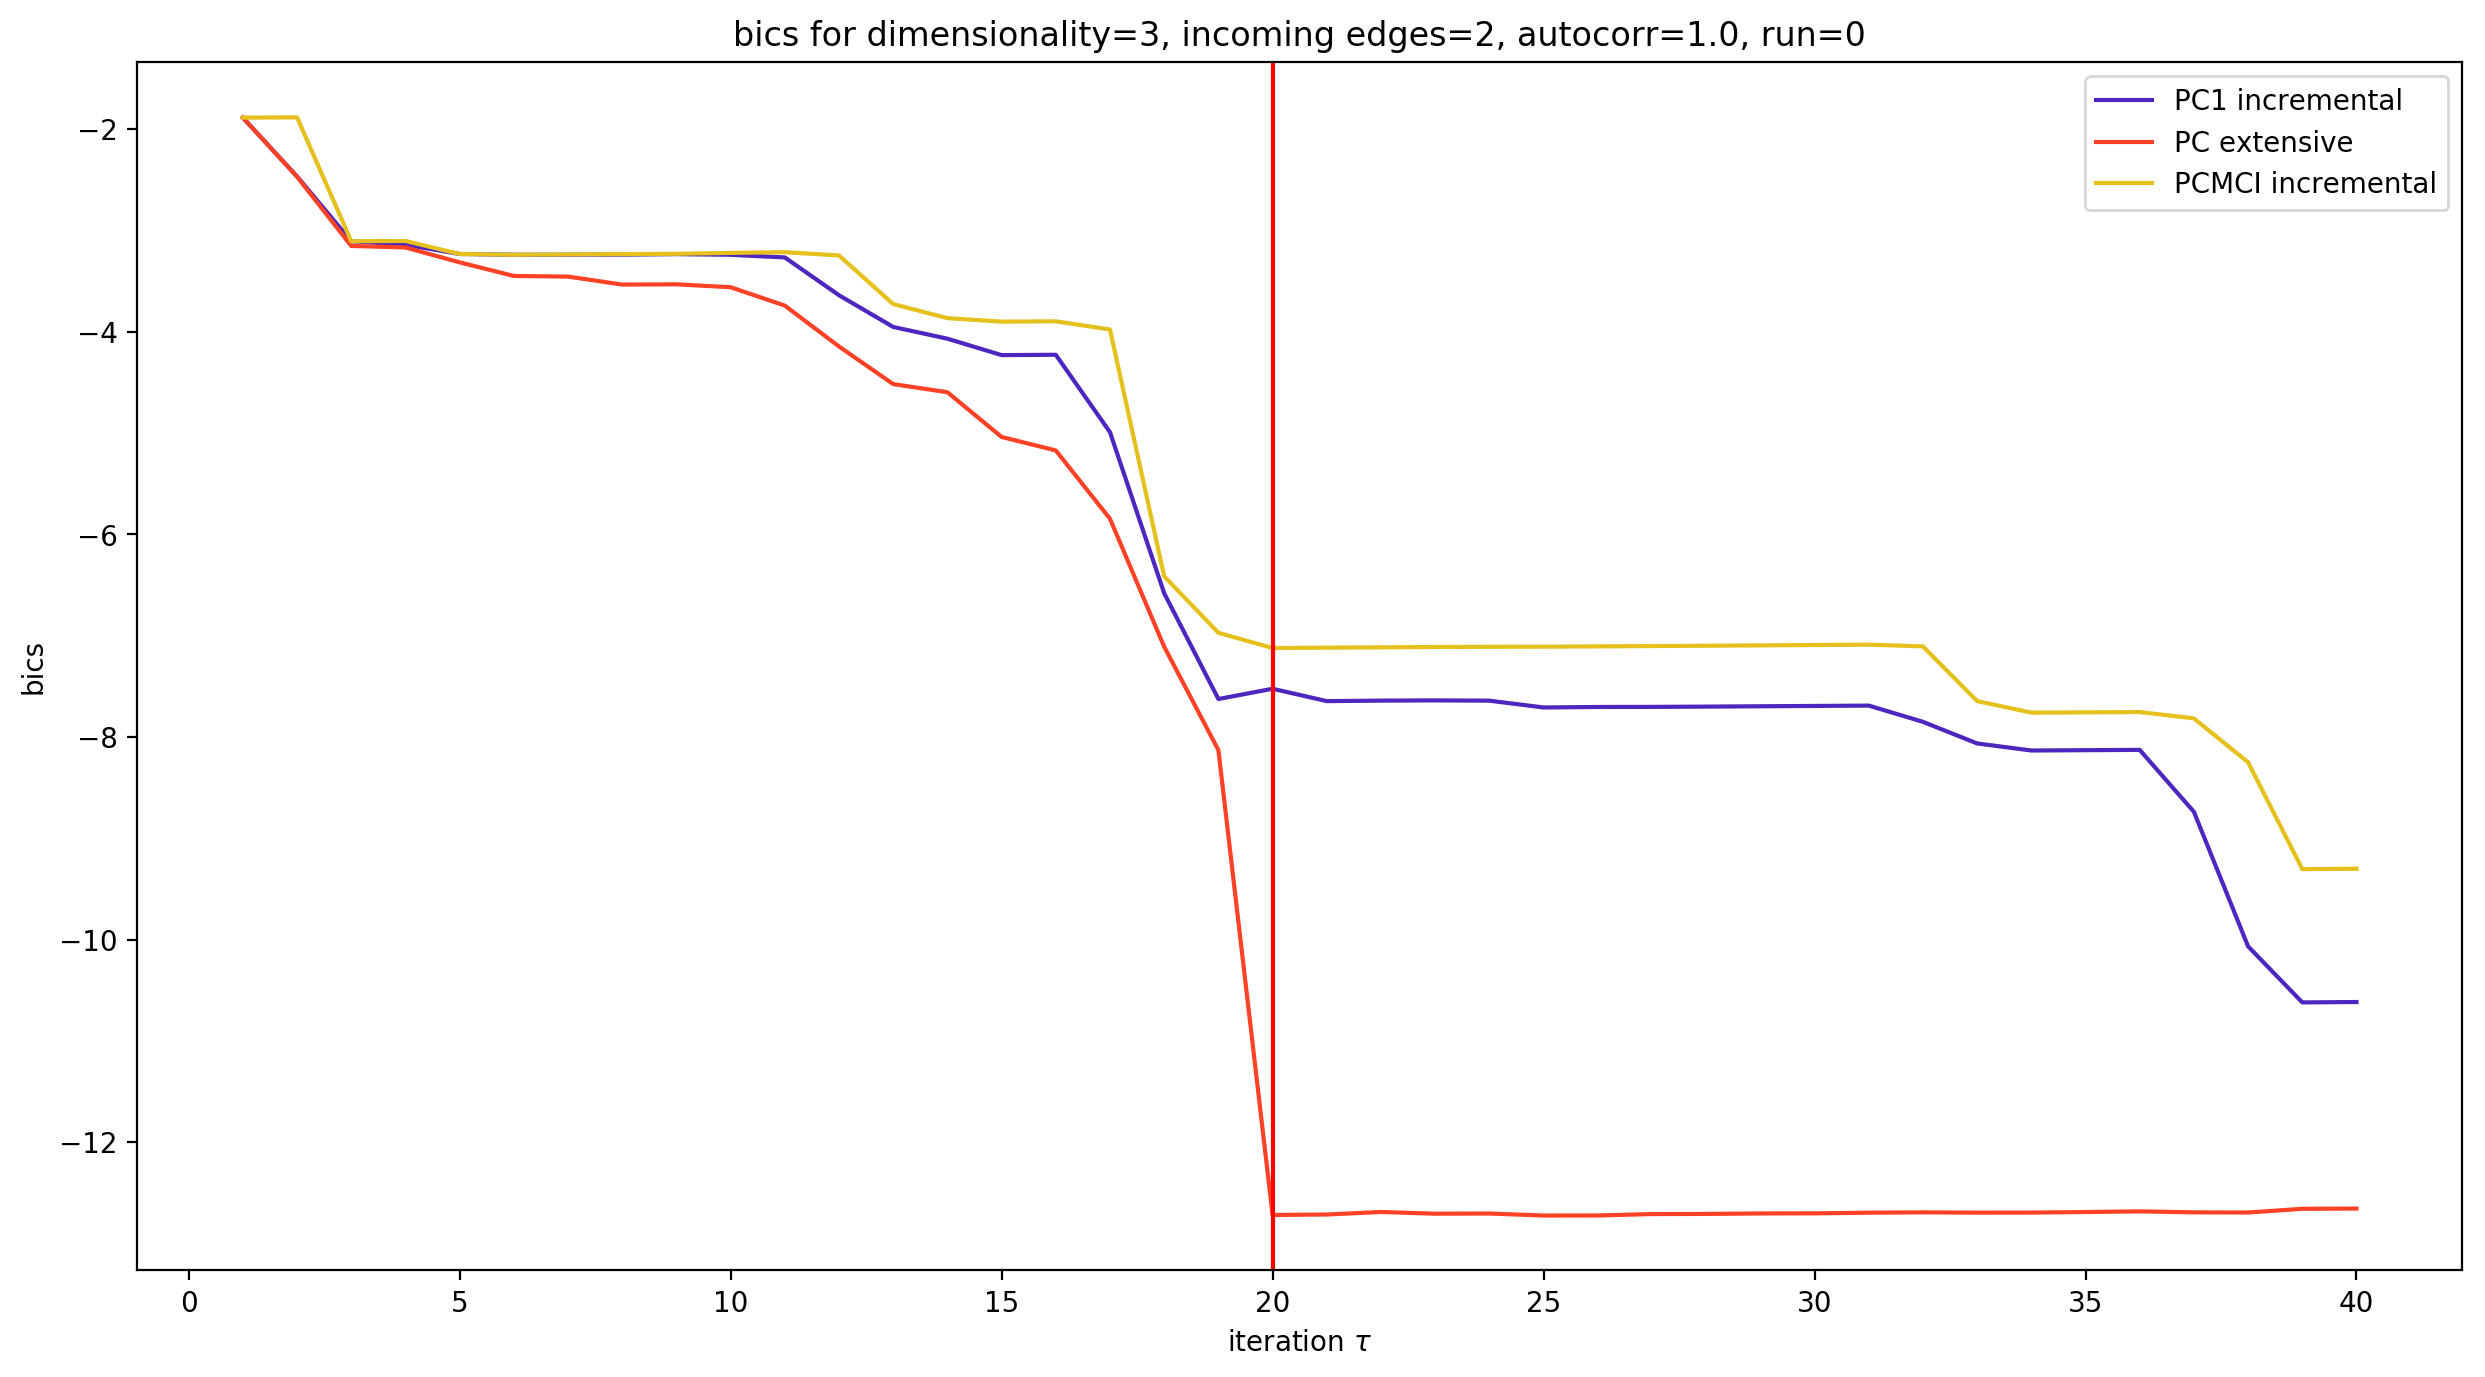

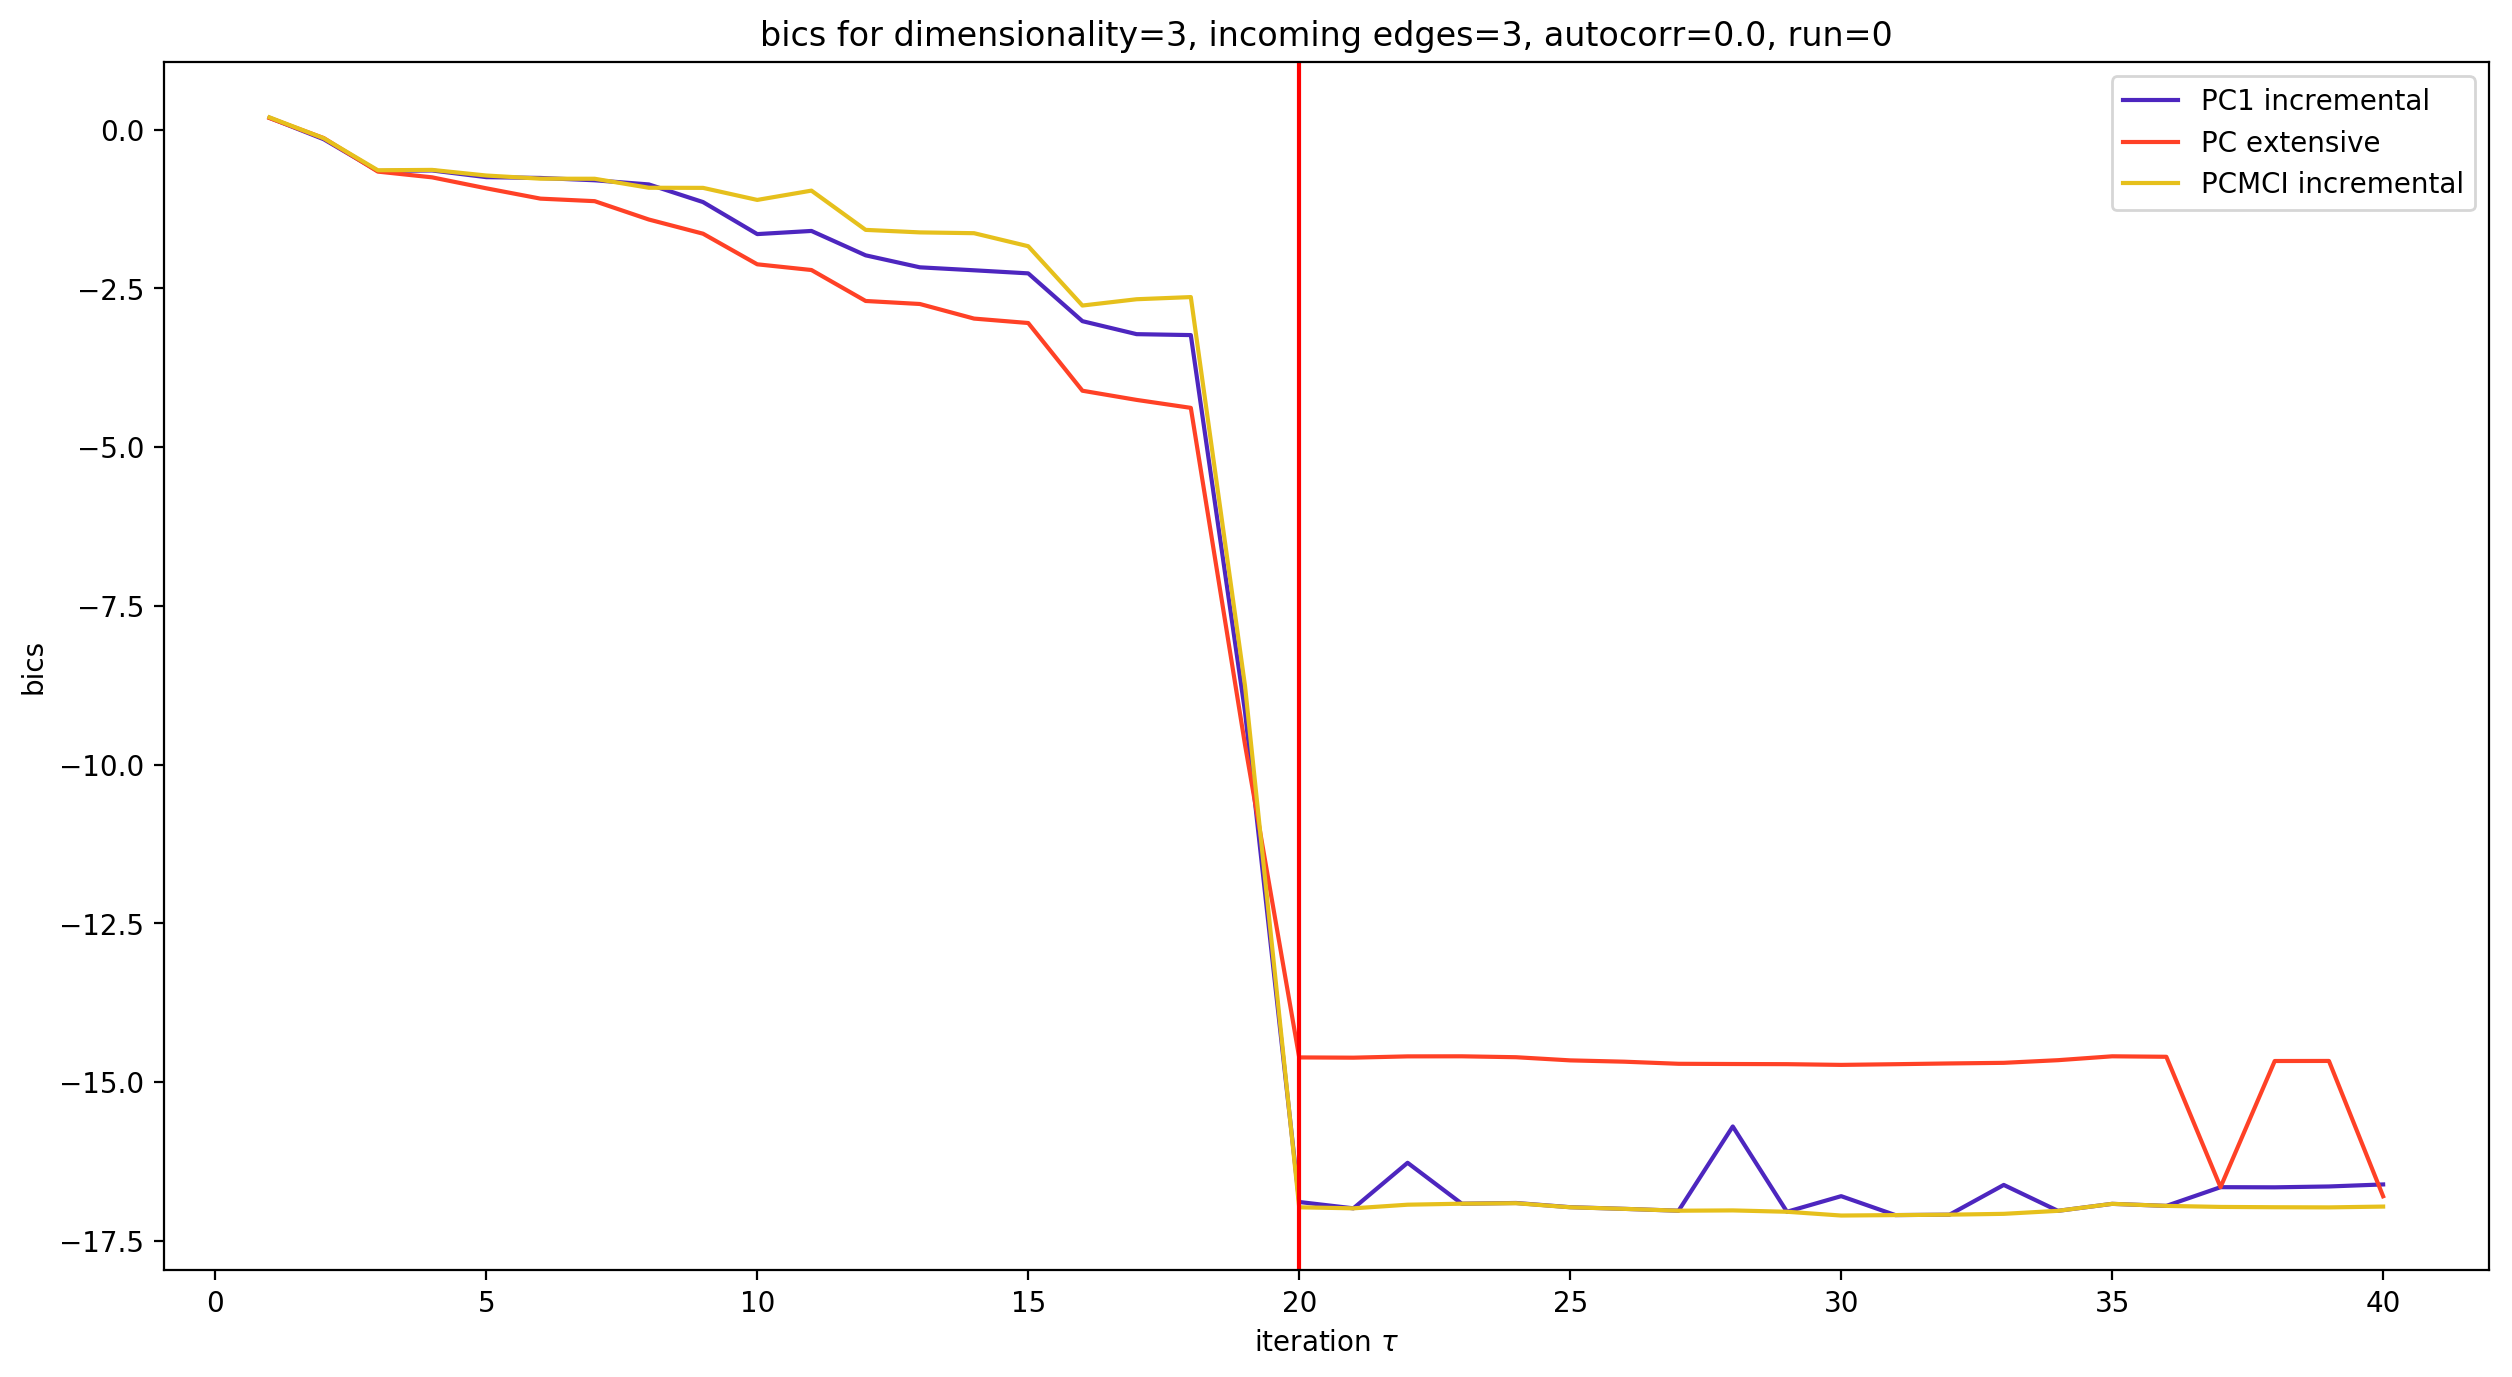

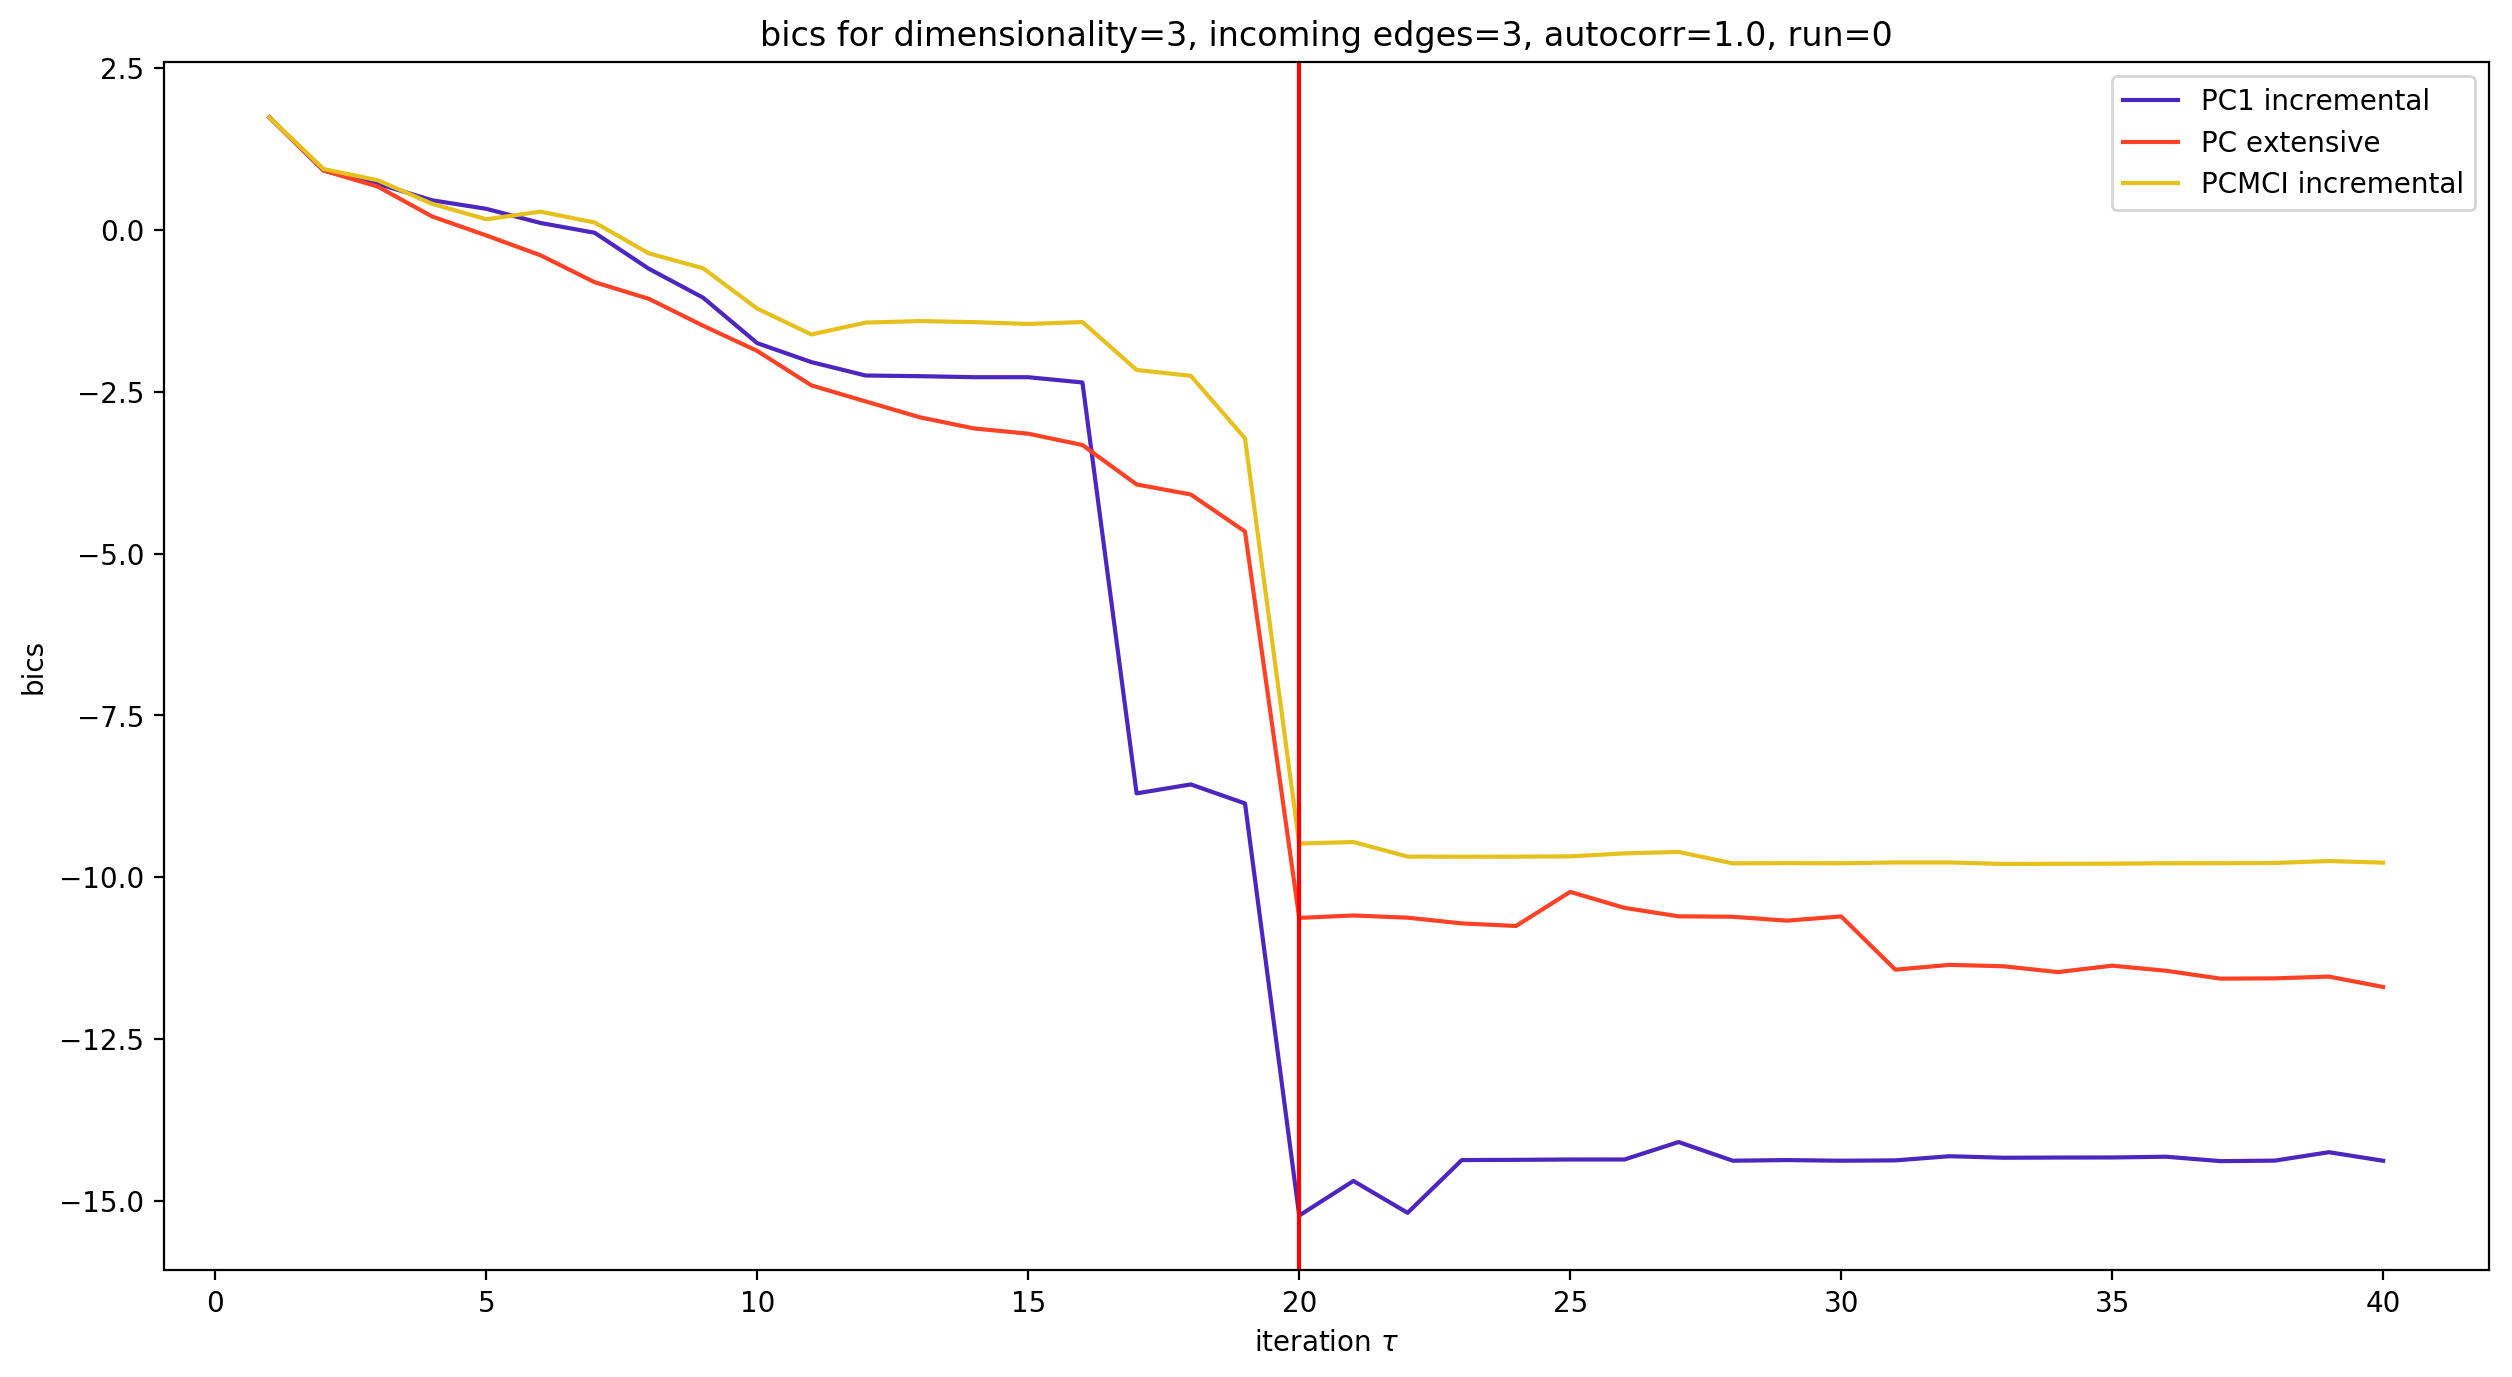

In [127]:
from math import floor

names = ['PC1 incremental', 'PC extensive', 'PCMCI incremental']
prop = 'bics'

width = 0.4

results = pd.read_csv('notebooks/ICML/icml_results_v2/experiment3.csv')
true_taus = np.unique(results['max time lag'])

for group, result in results.groupby(['max time lag', 'dimension', 'incoming edges', 'autocorr', 'run']): 
    
    tau = int(group[0])
    dim = int(group[1])
    in_edges = int(group[2])
    autocorr = float(group[3])
    run = int(group[4])
    
    if run != 0:
        continue
    
#     if (tau, dim, in_edges, autocorr) not in visualize:
#         continue
    
    colors = plt.cm.CMRmap(np.linspace(0,1,len(names)+2))
    plt.figure(dpi=200, figsize=(15, 8))
    
    x = result['tau estimate']
    for i, name in enumerate(names):
        y = result[name + '_' + prop]
        plt.plot(x, y, color=colors[i+1], label=name)
    plt.axvline(tau, color='red')
    
    plt.xlabel('iteration $\\tau$')
    plt.ylabel(prop)
    plt.title(f'{prop} for dimensionality={dim}, incoming edges={in_edges}, autocorr={autocorr}, run={run}')
    
    plt.legend()
    plt.show()

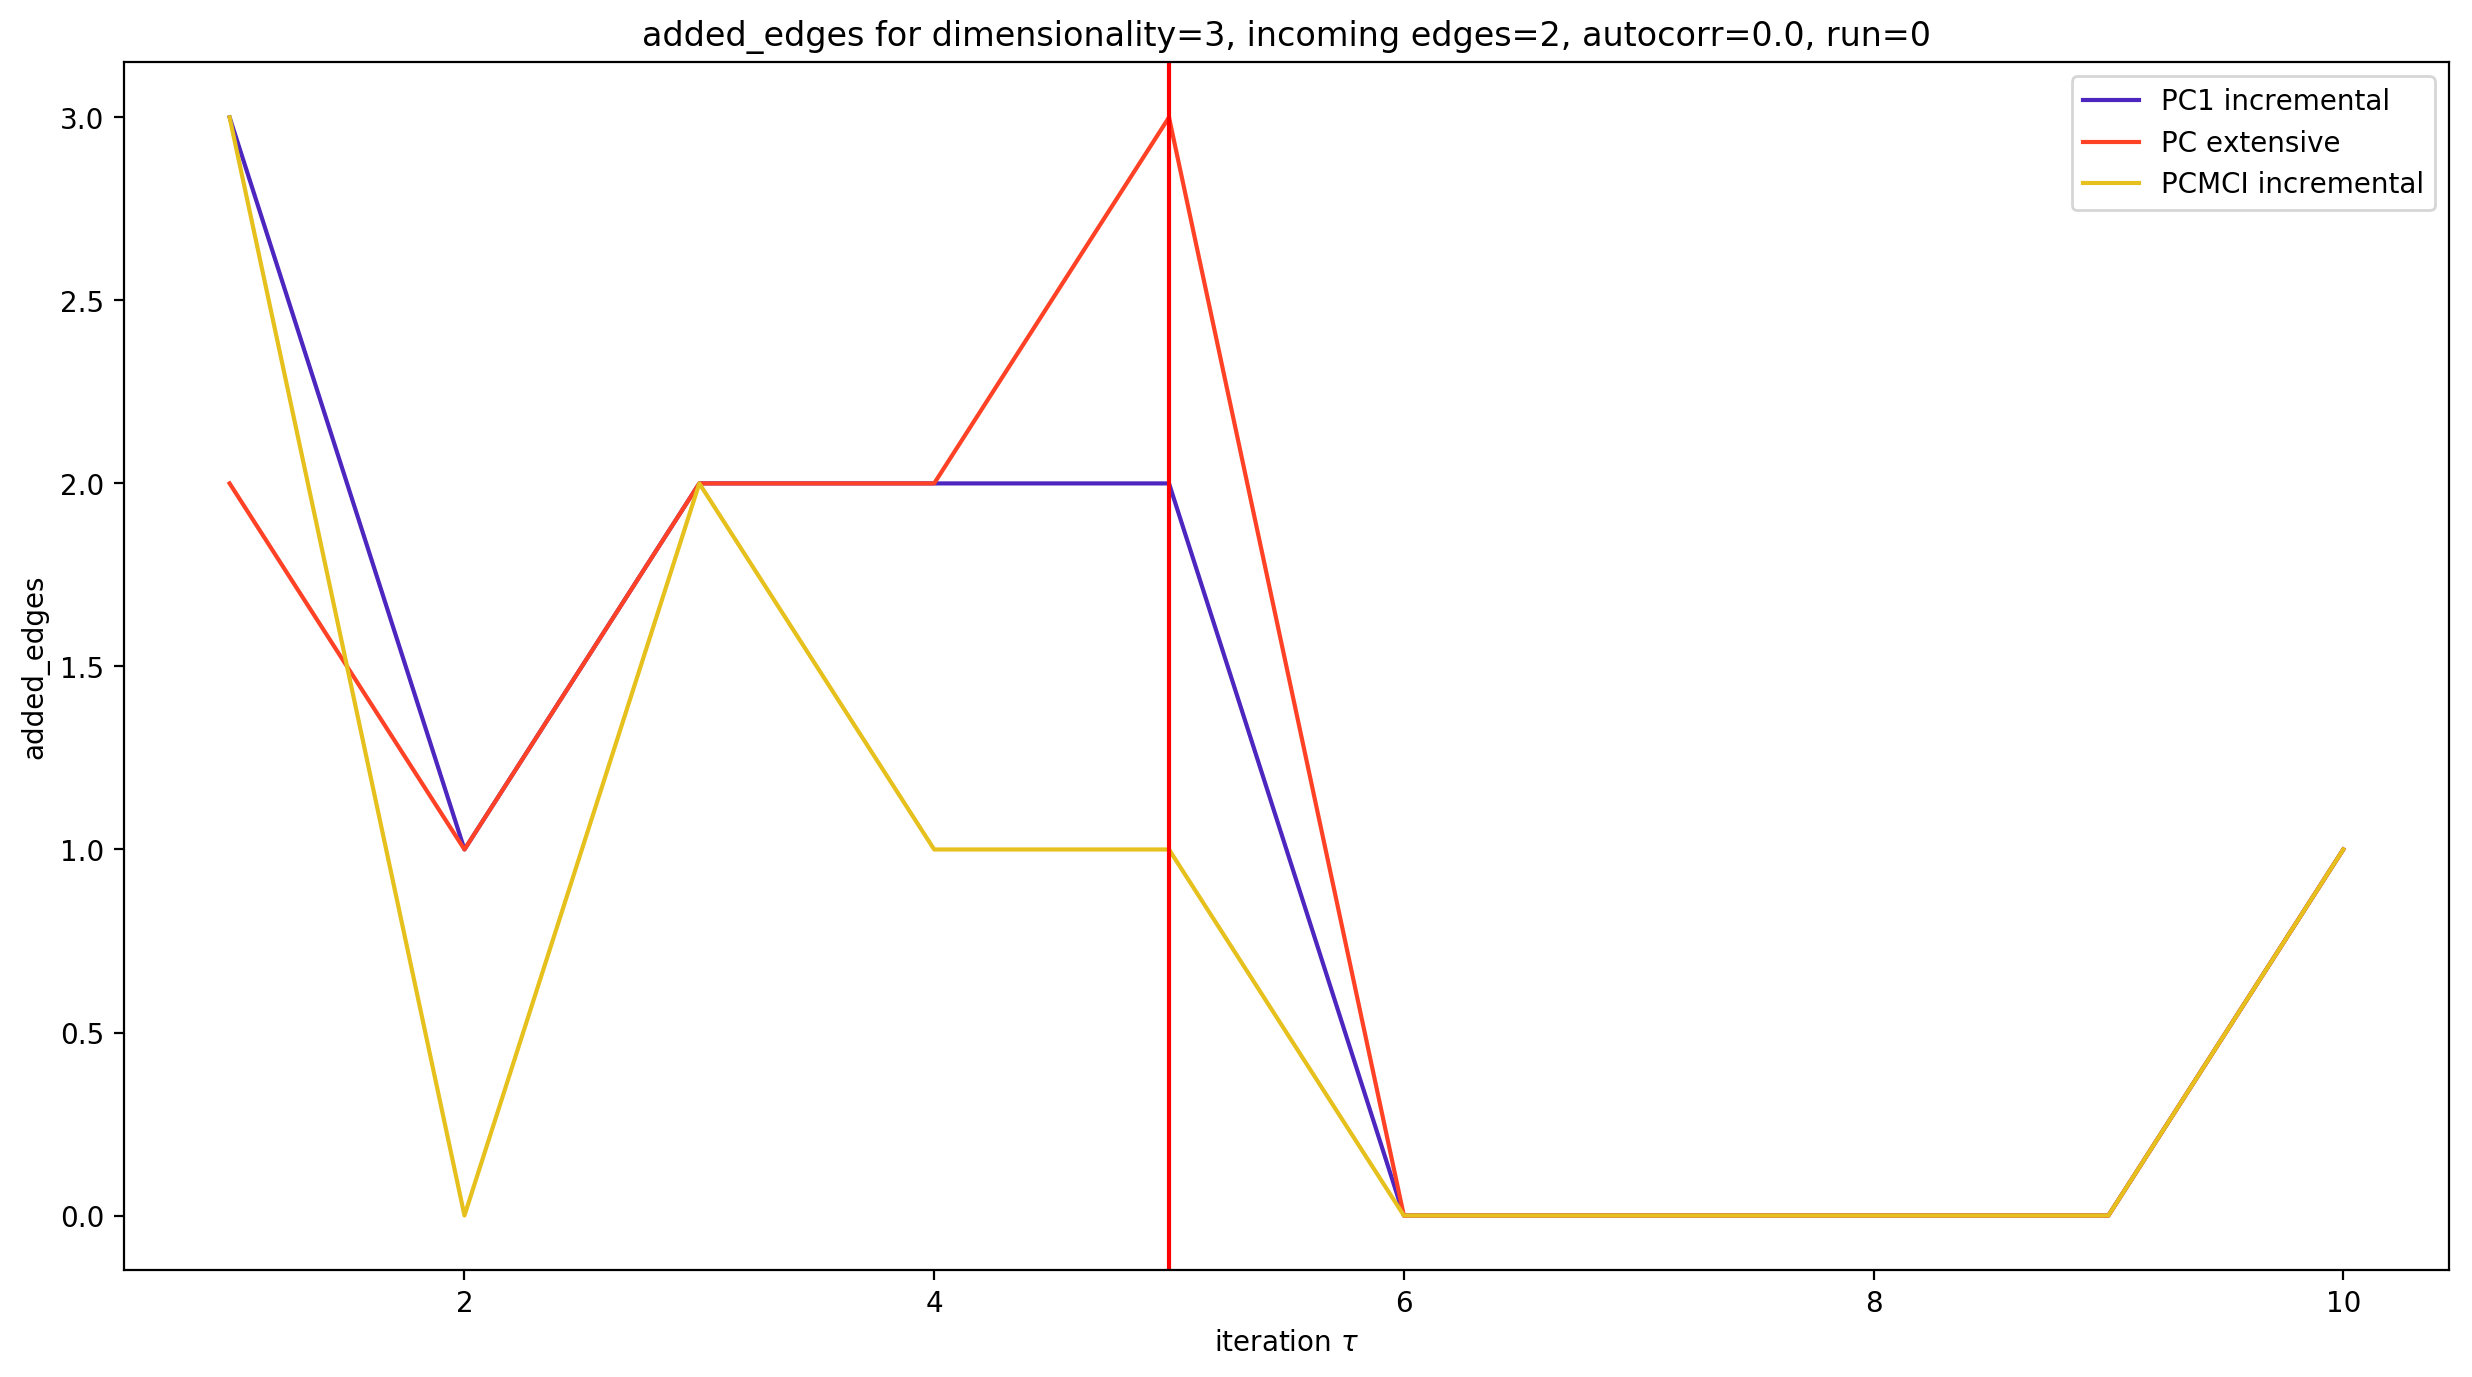

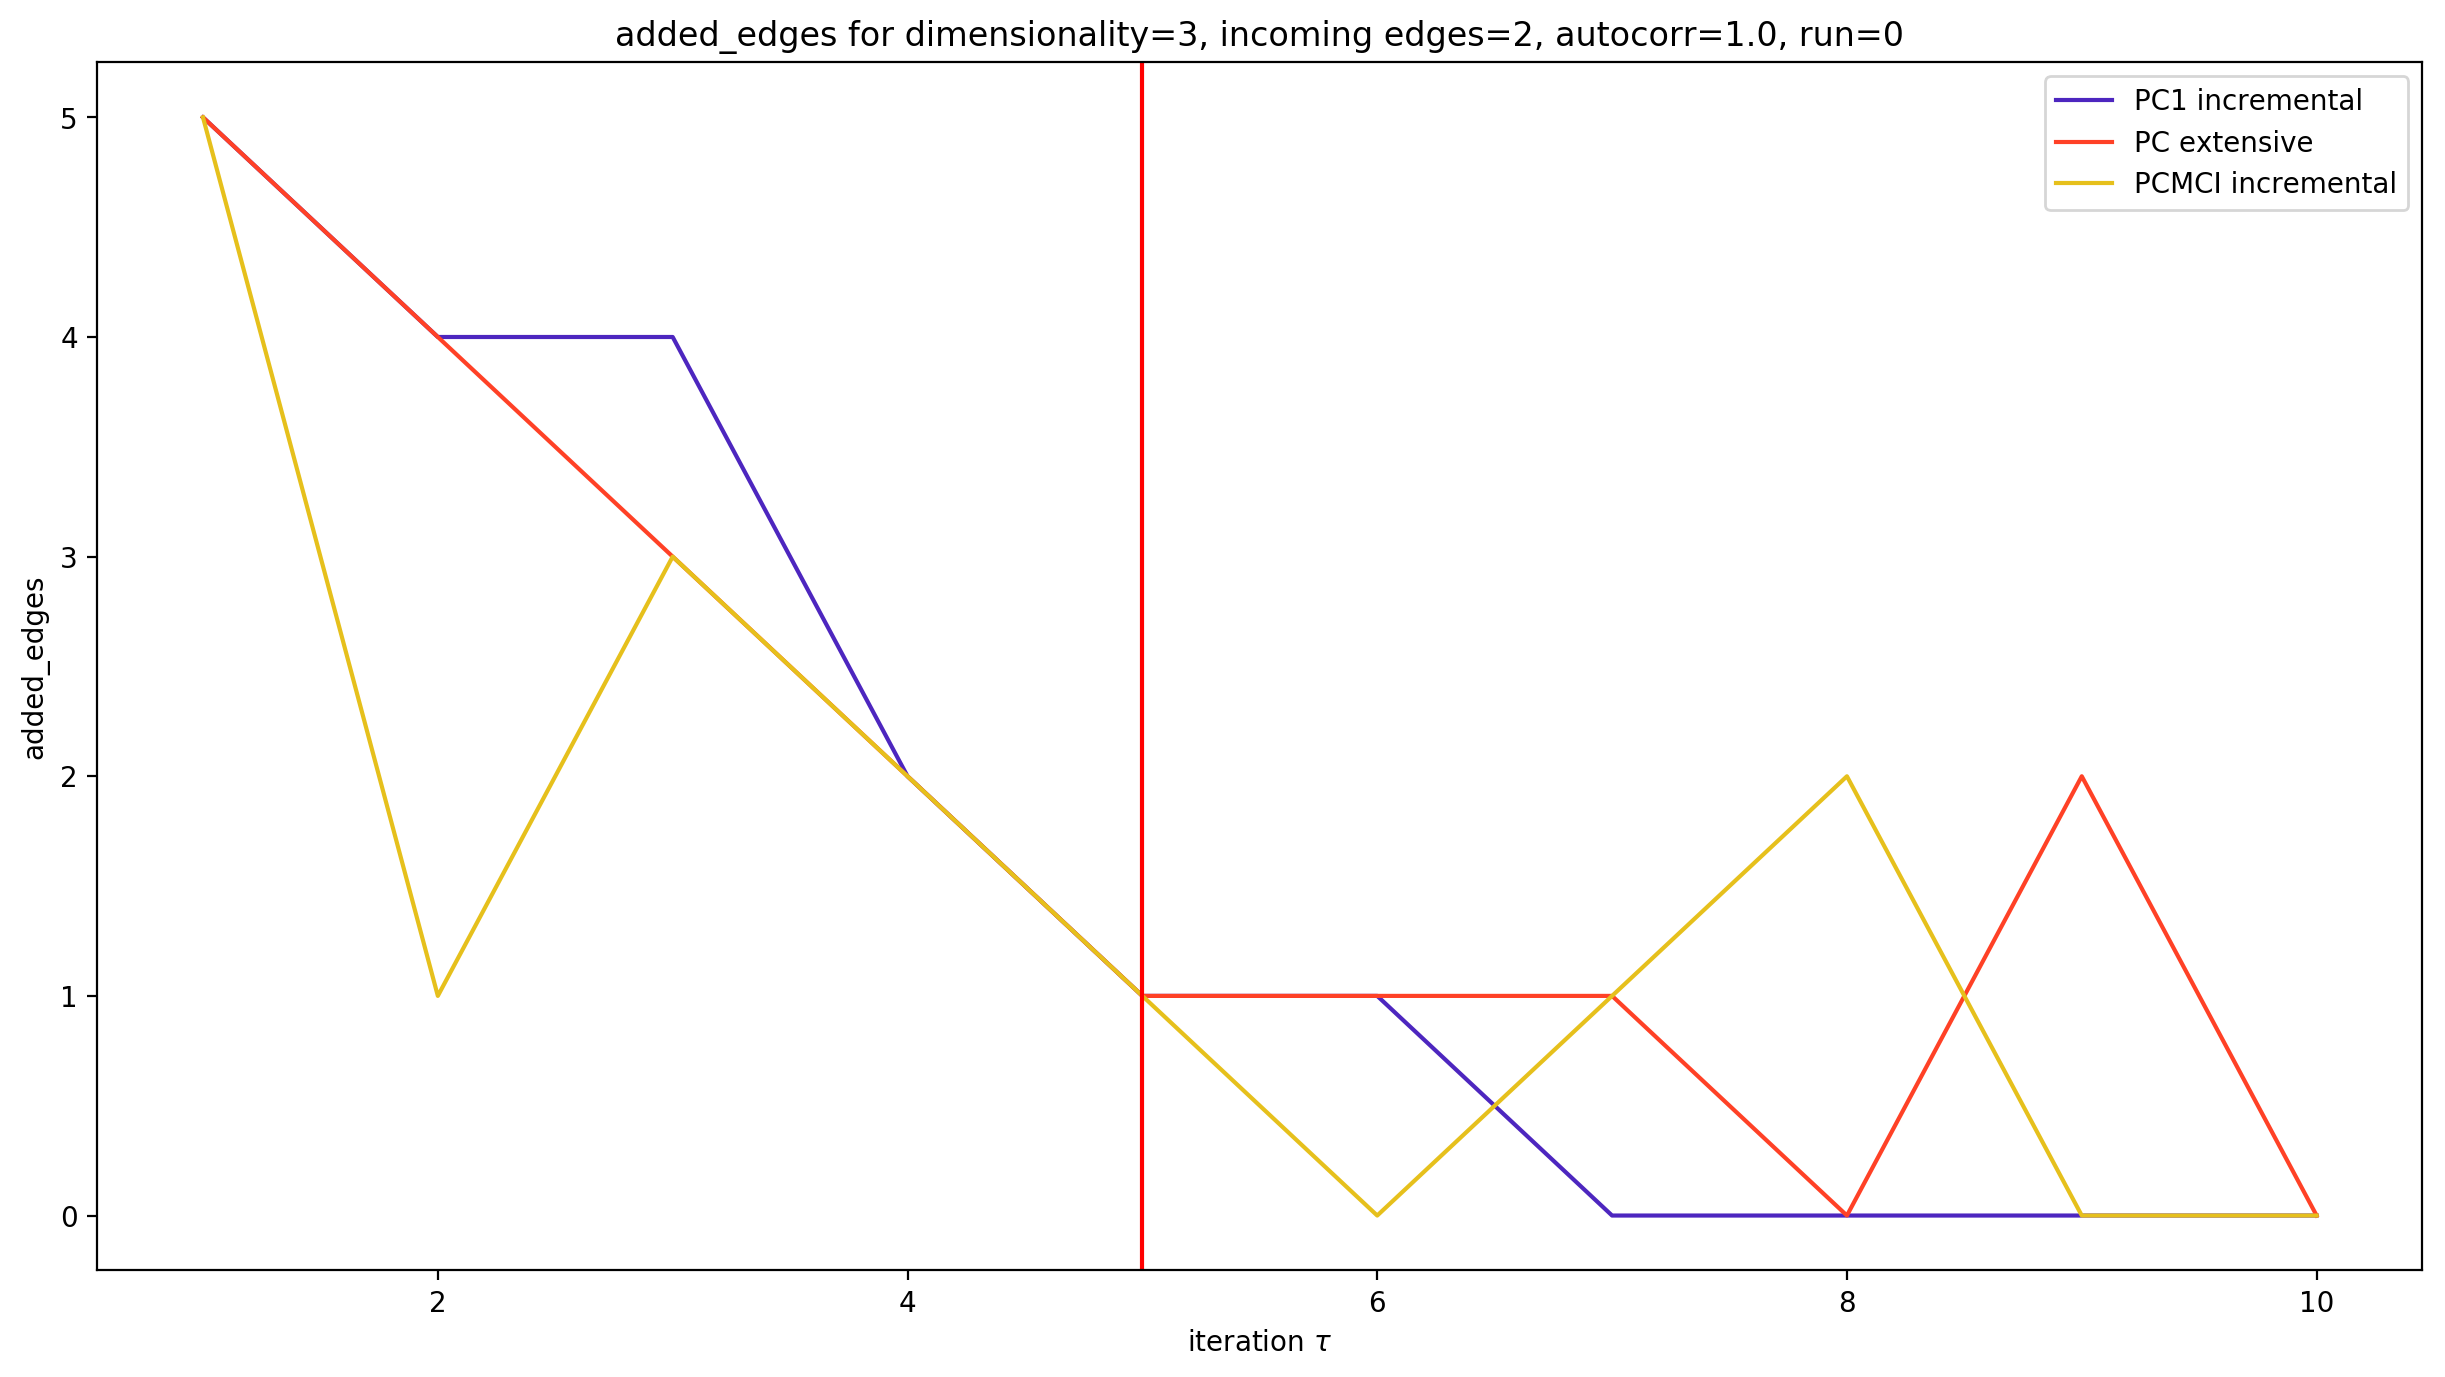

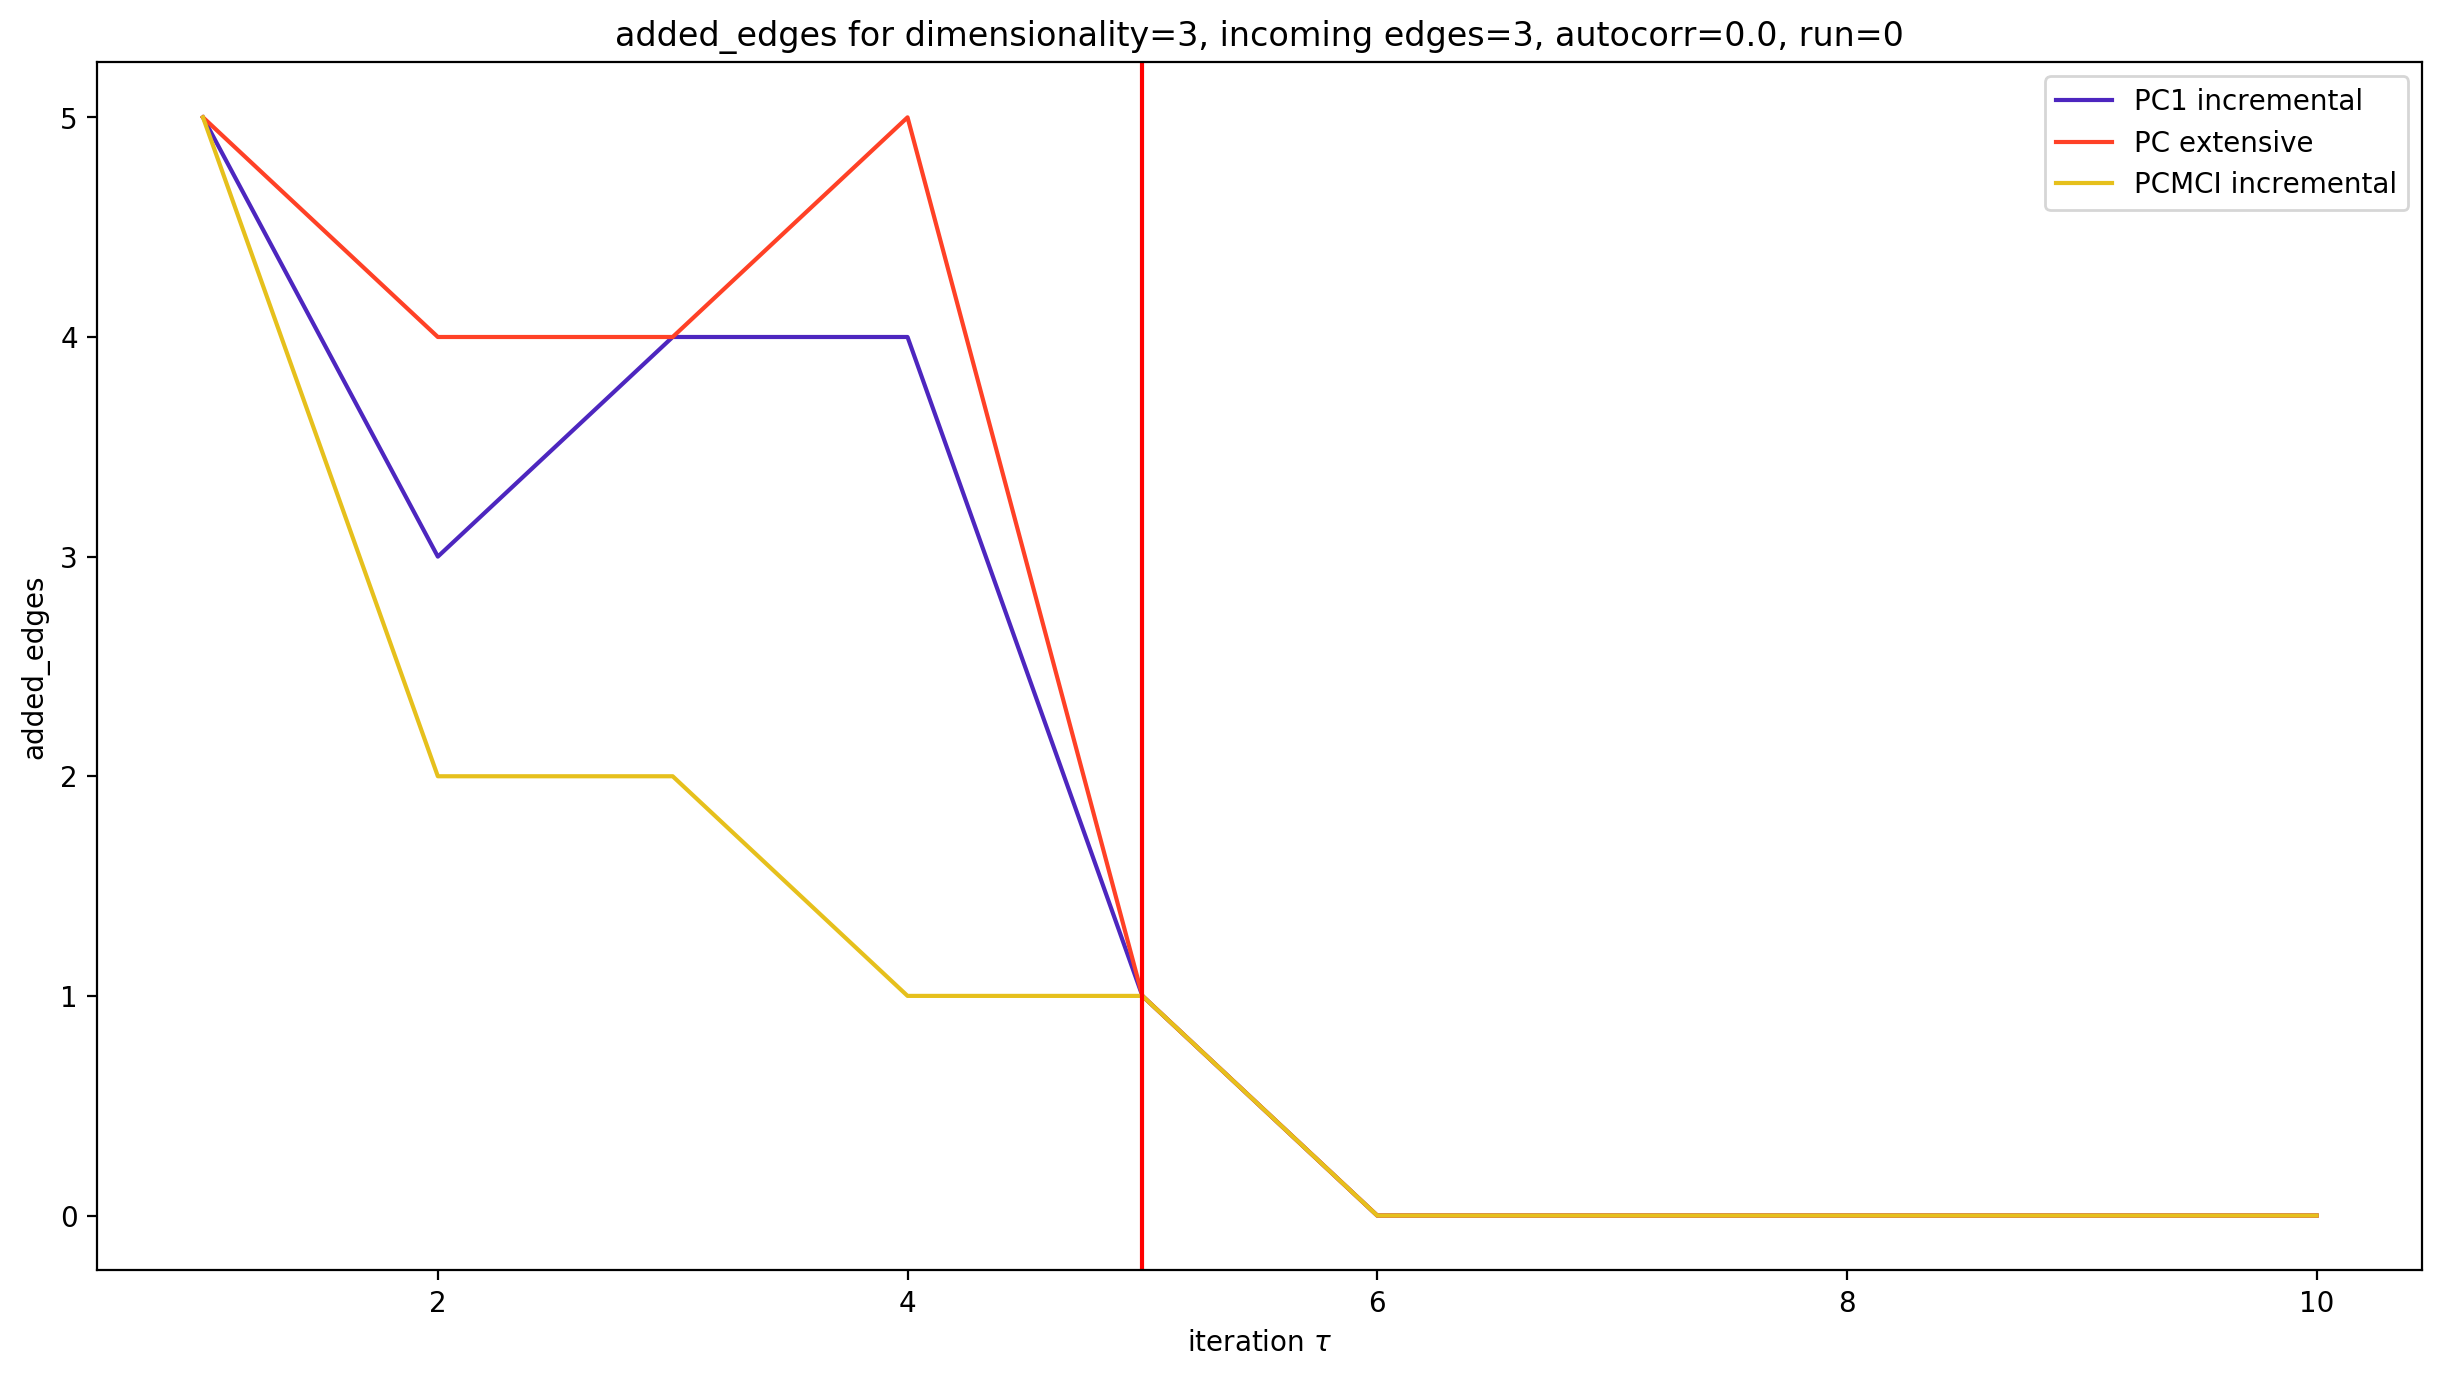

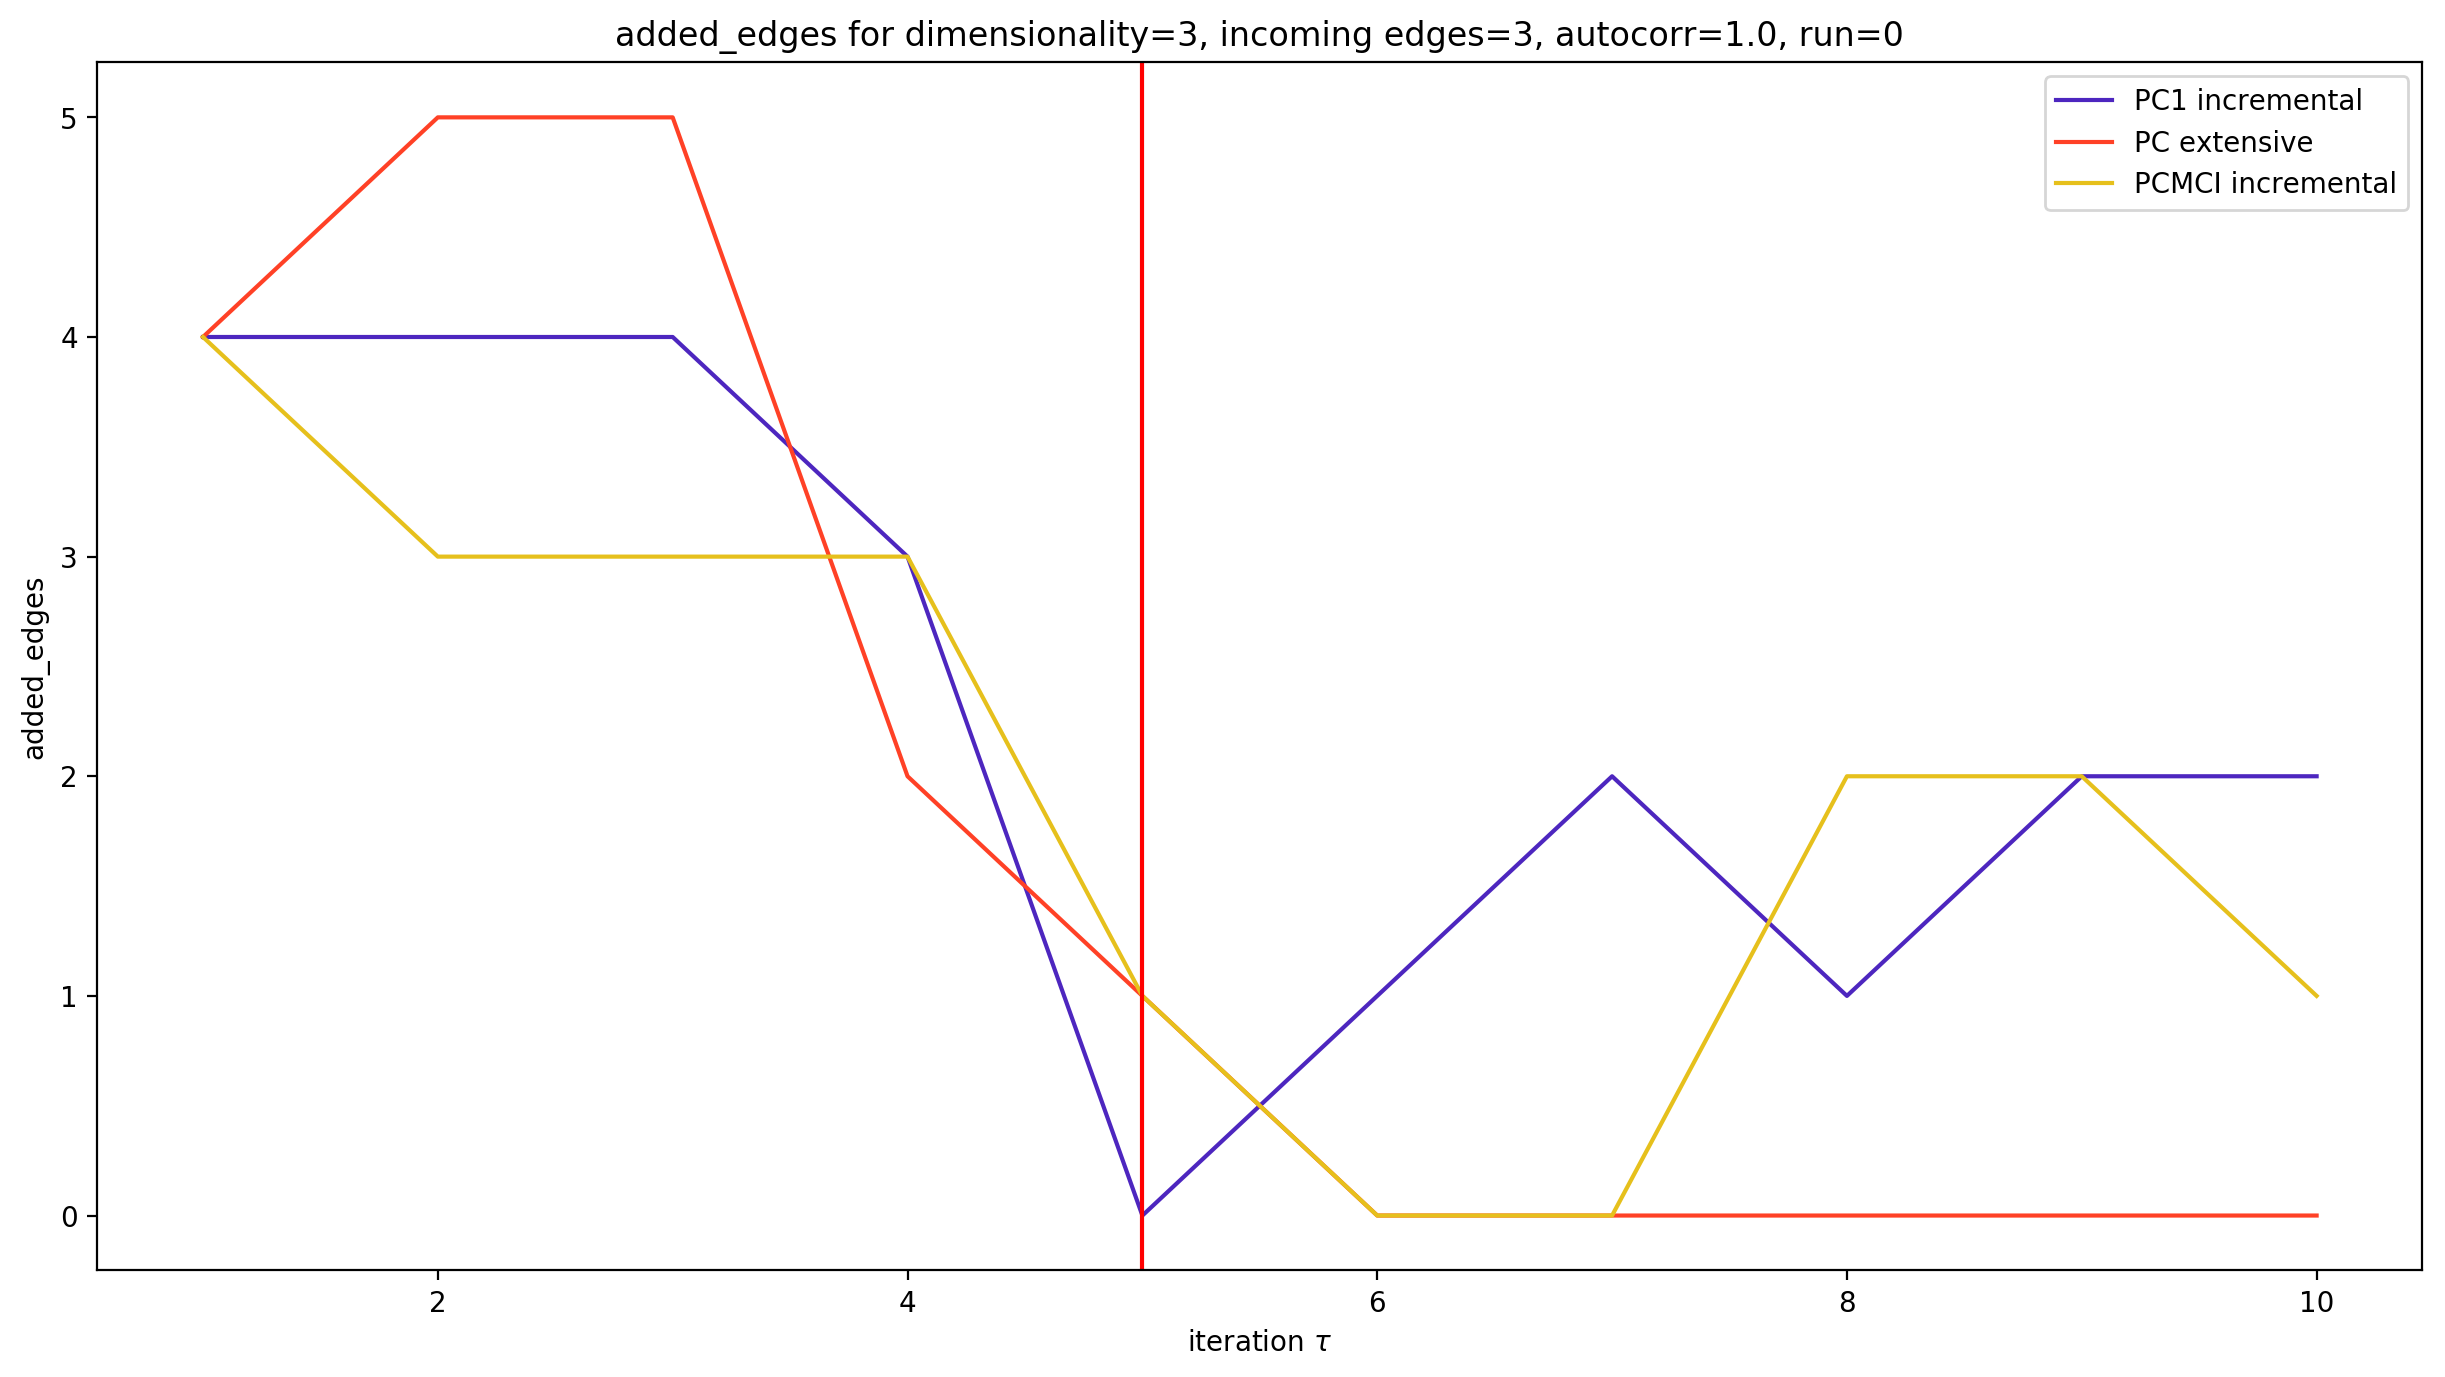

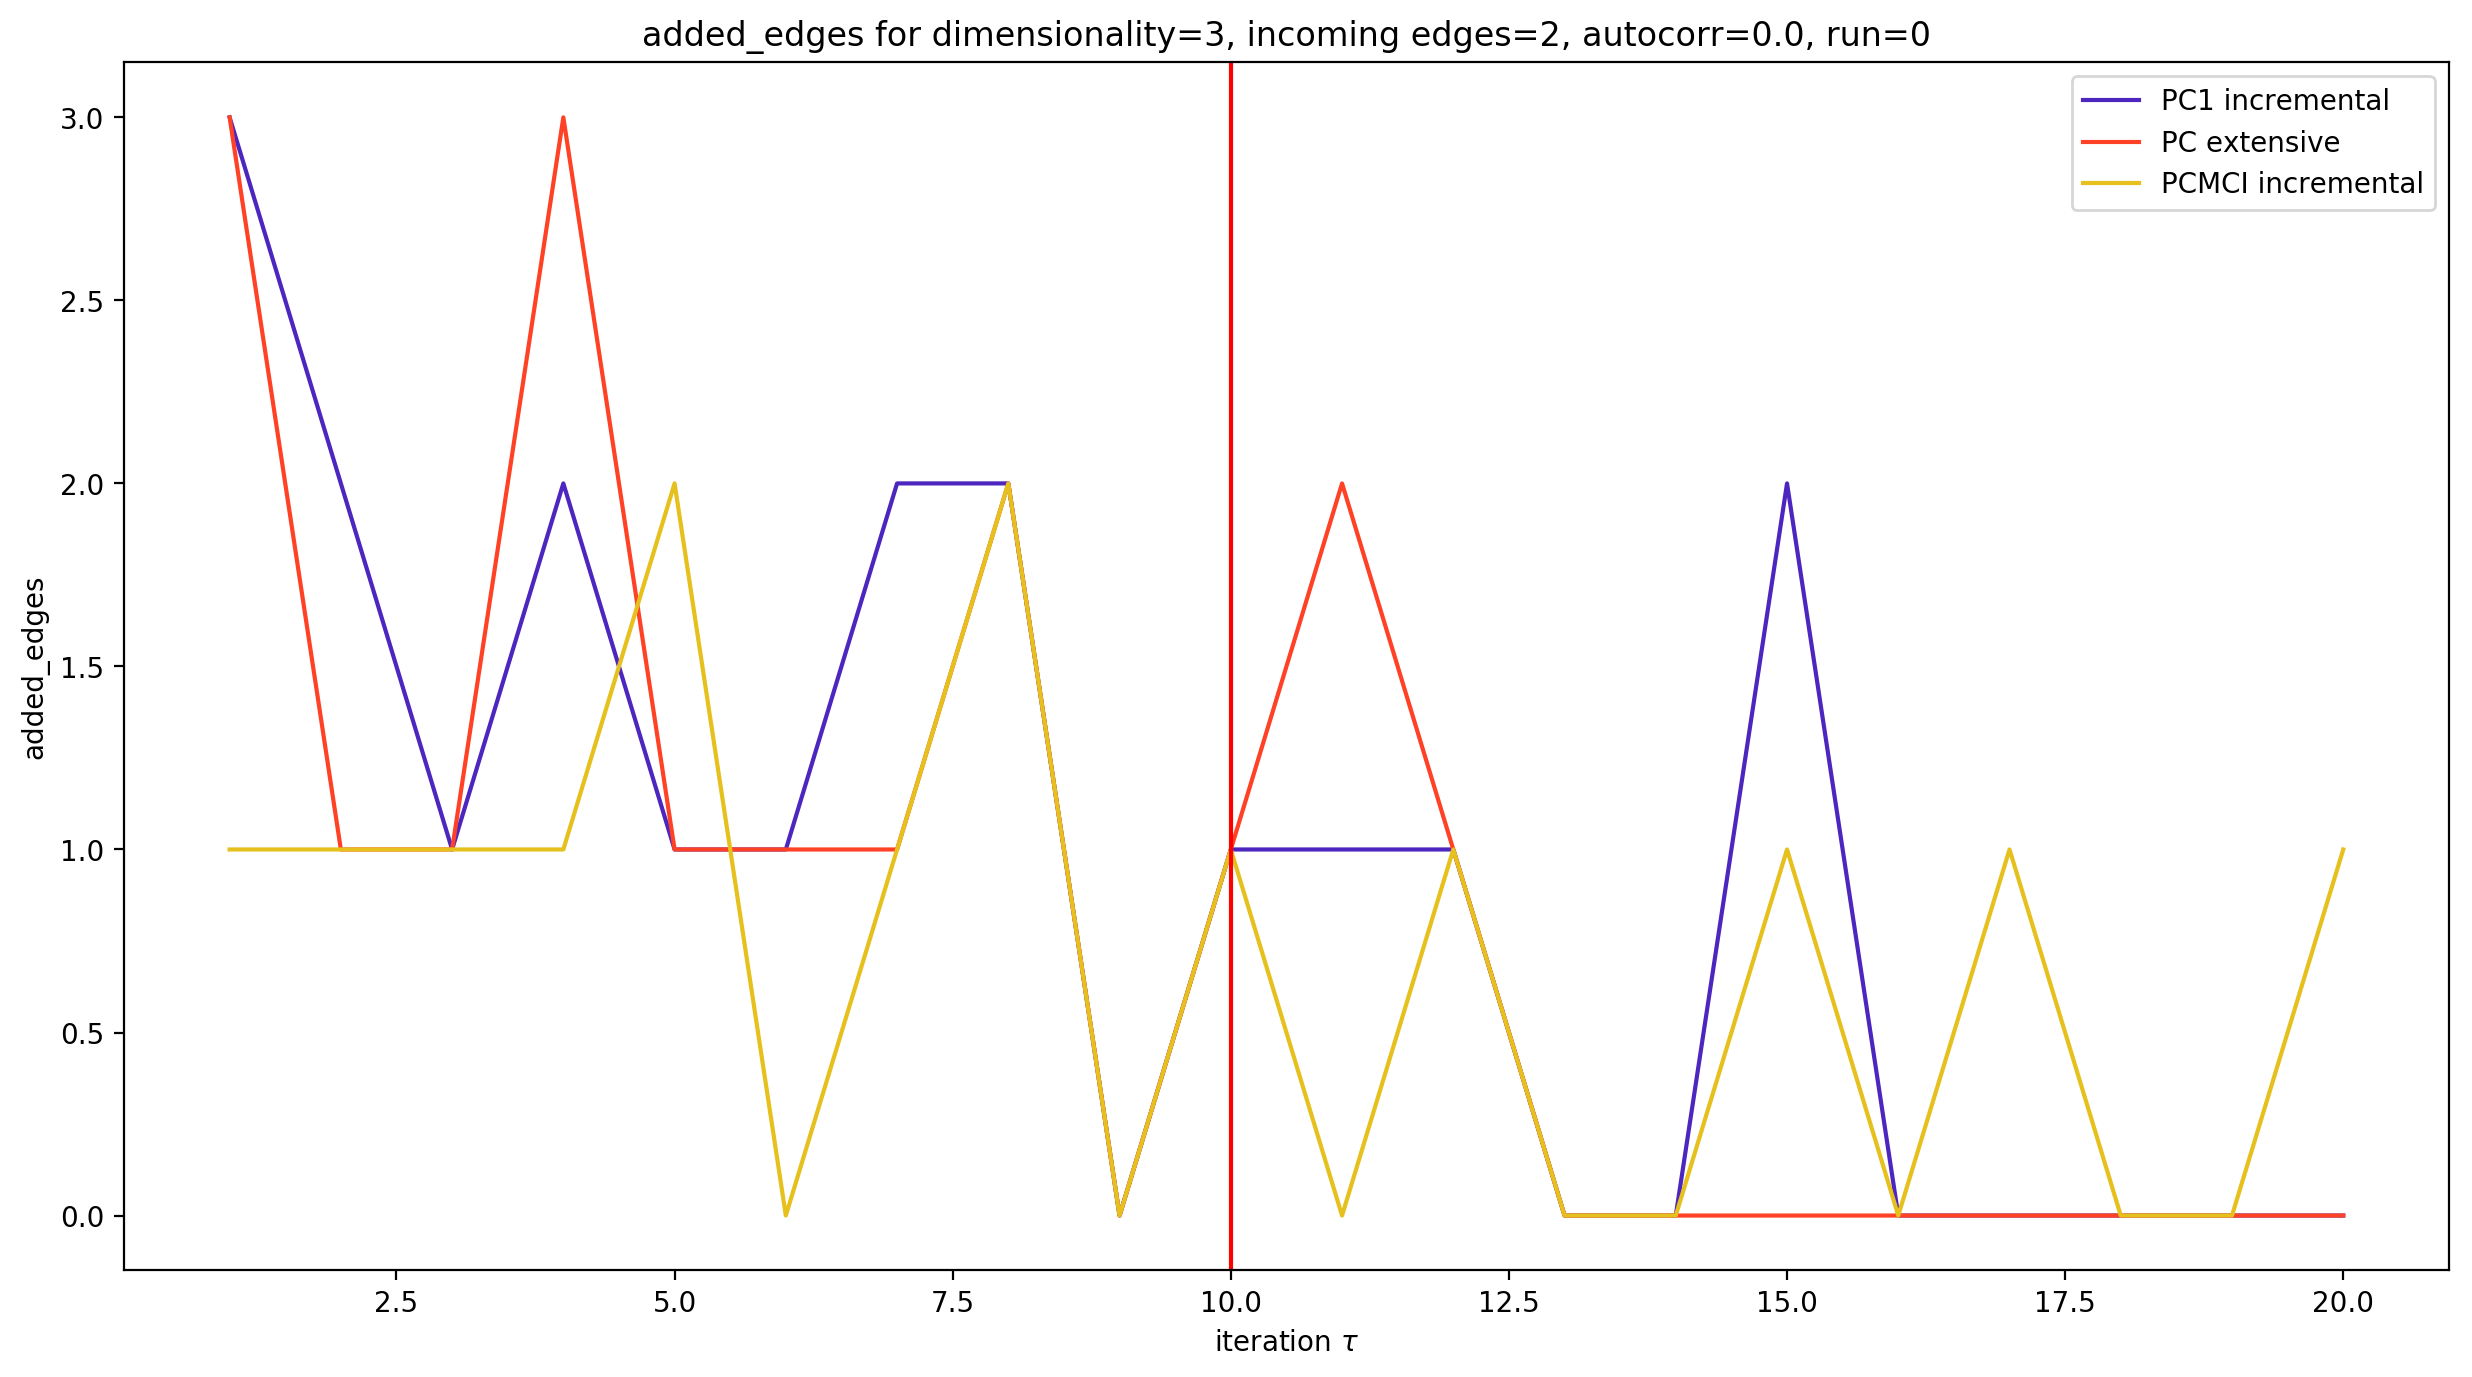

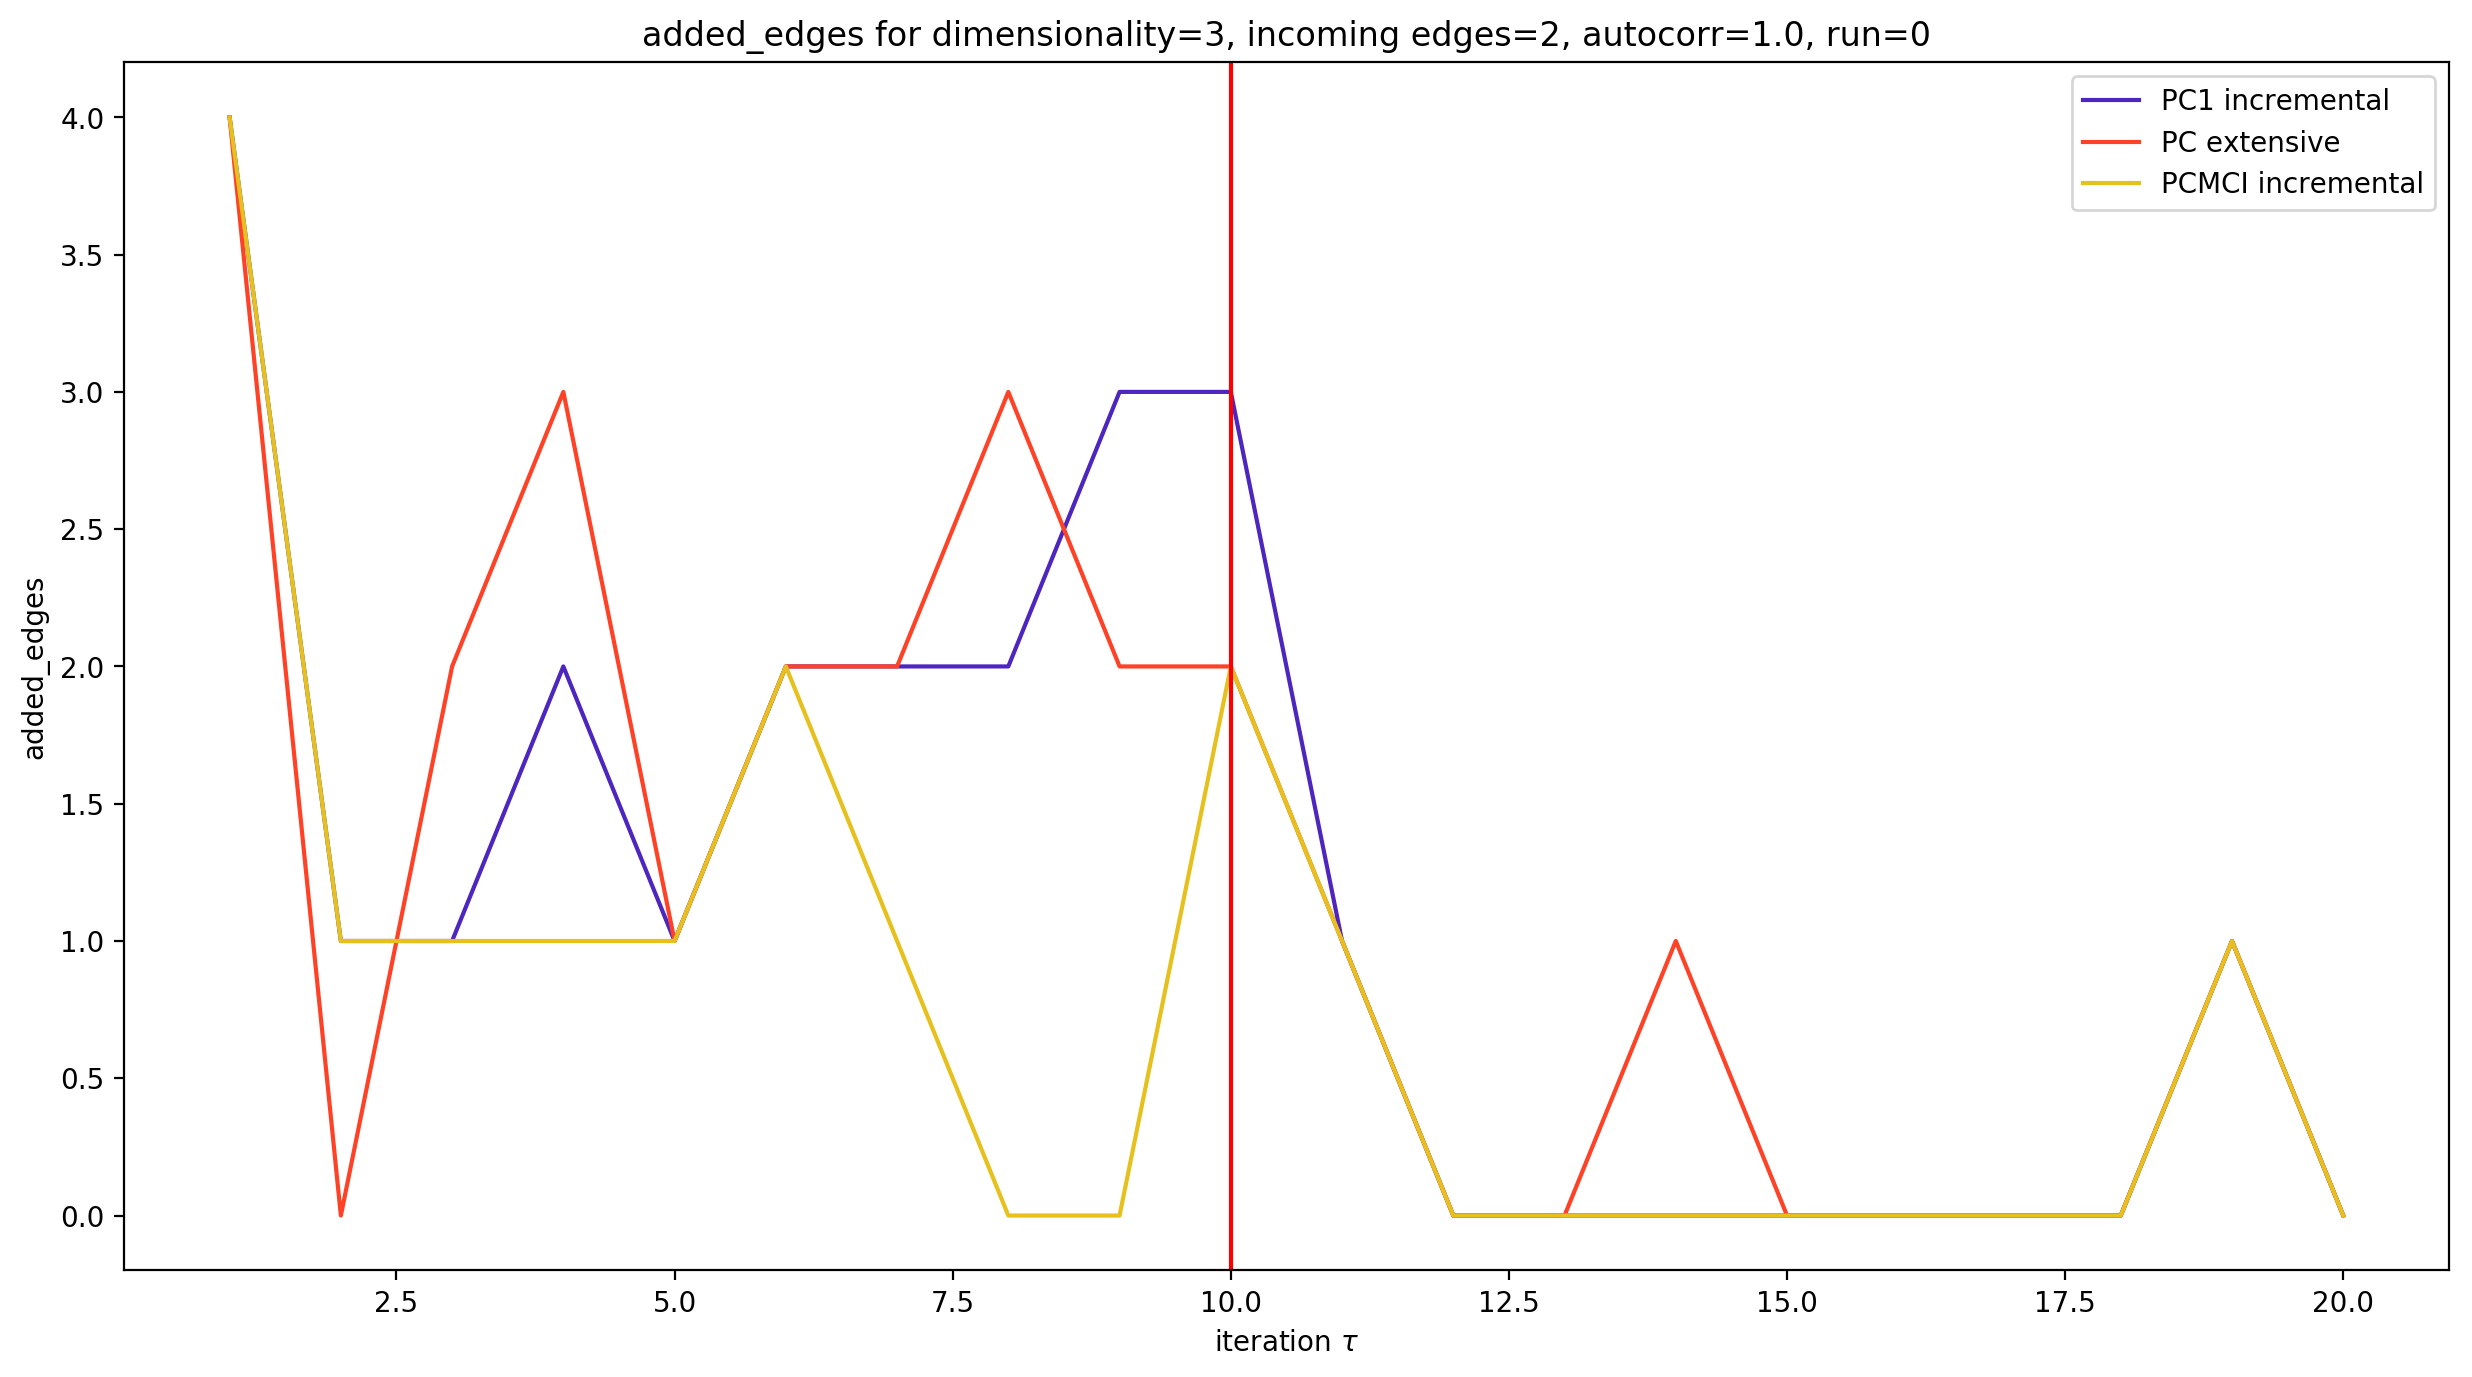

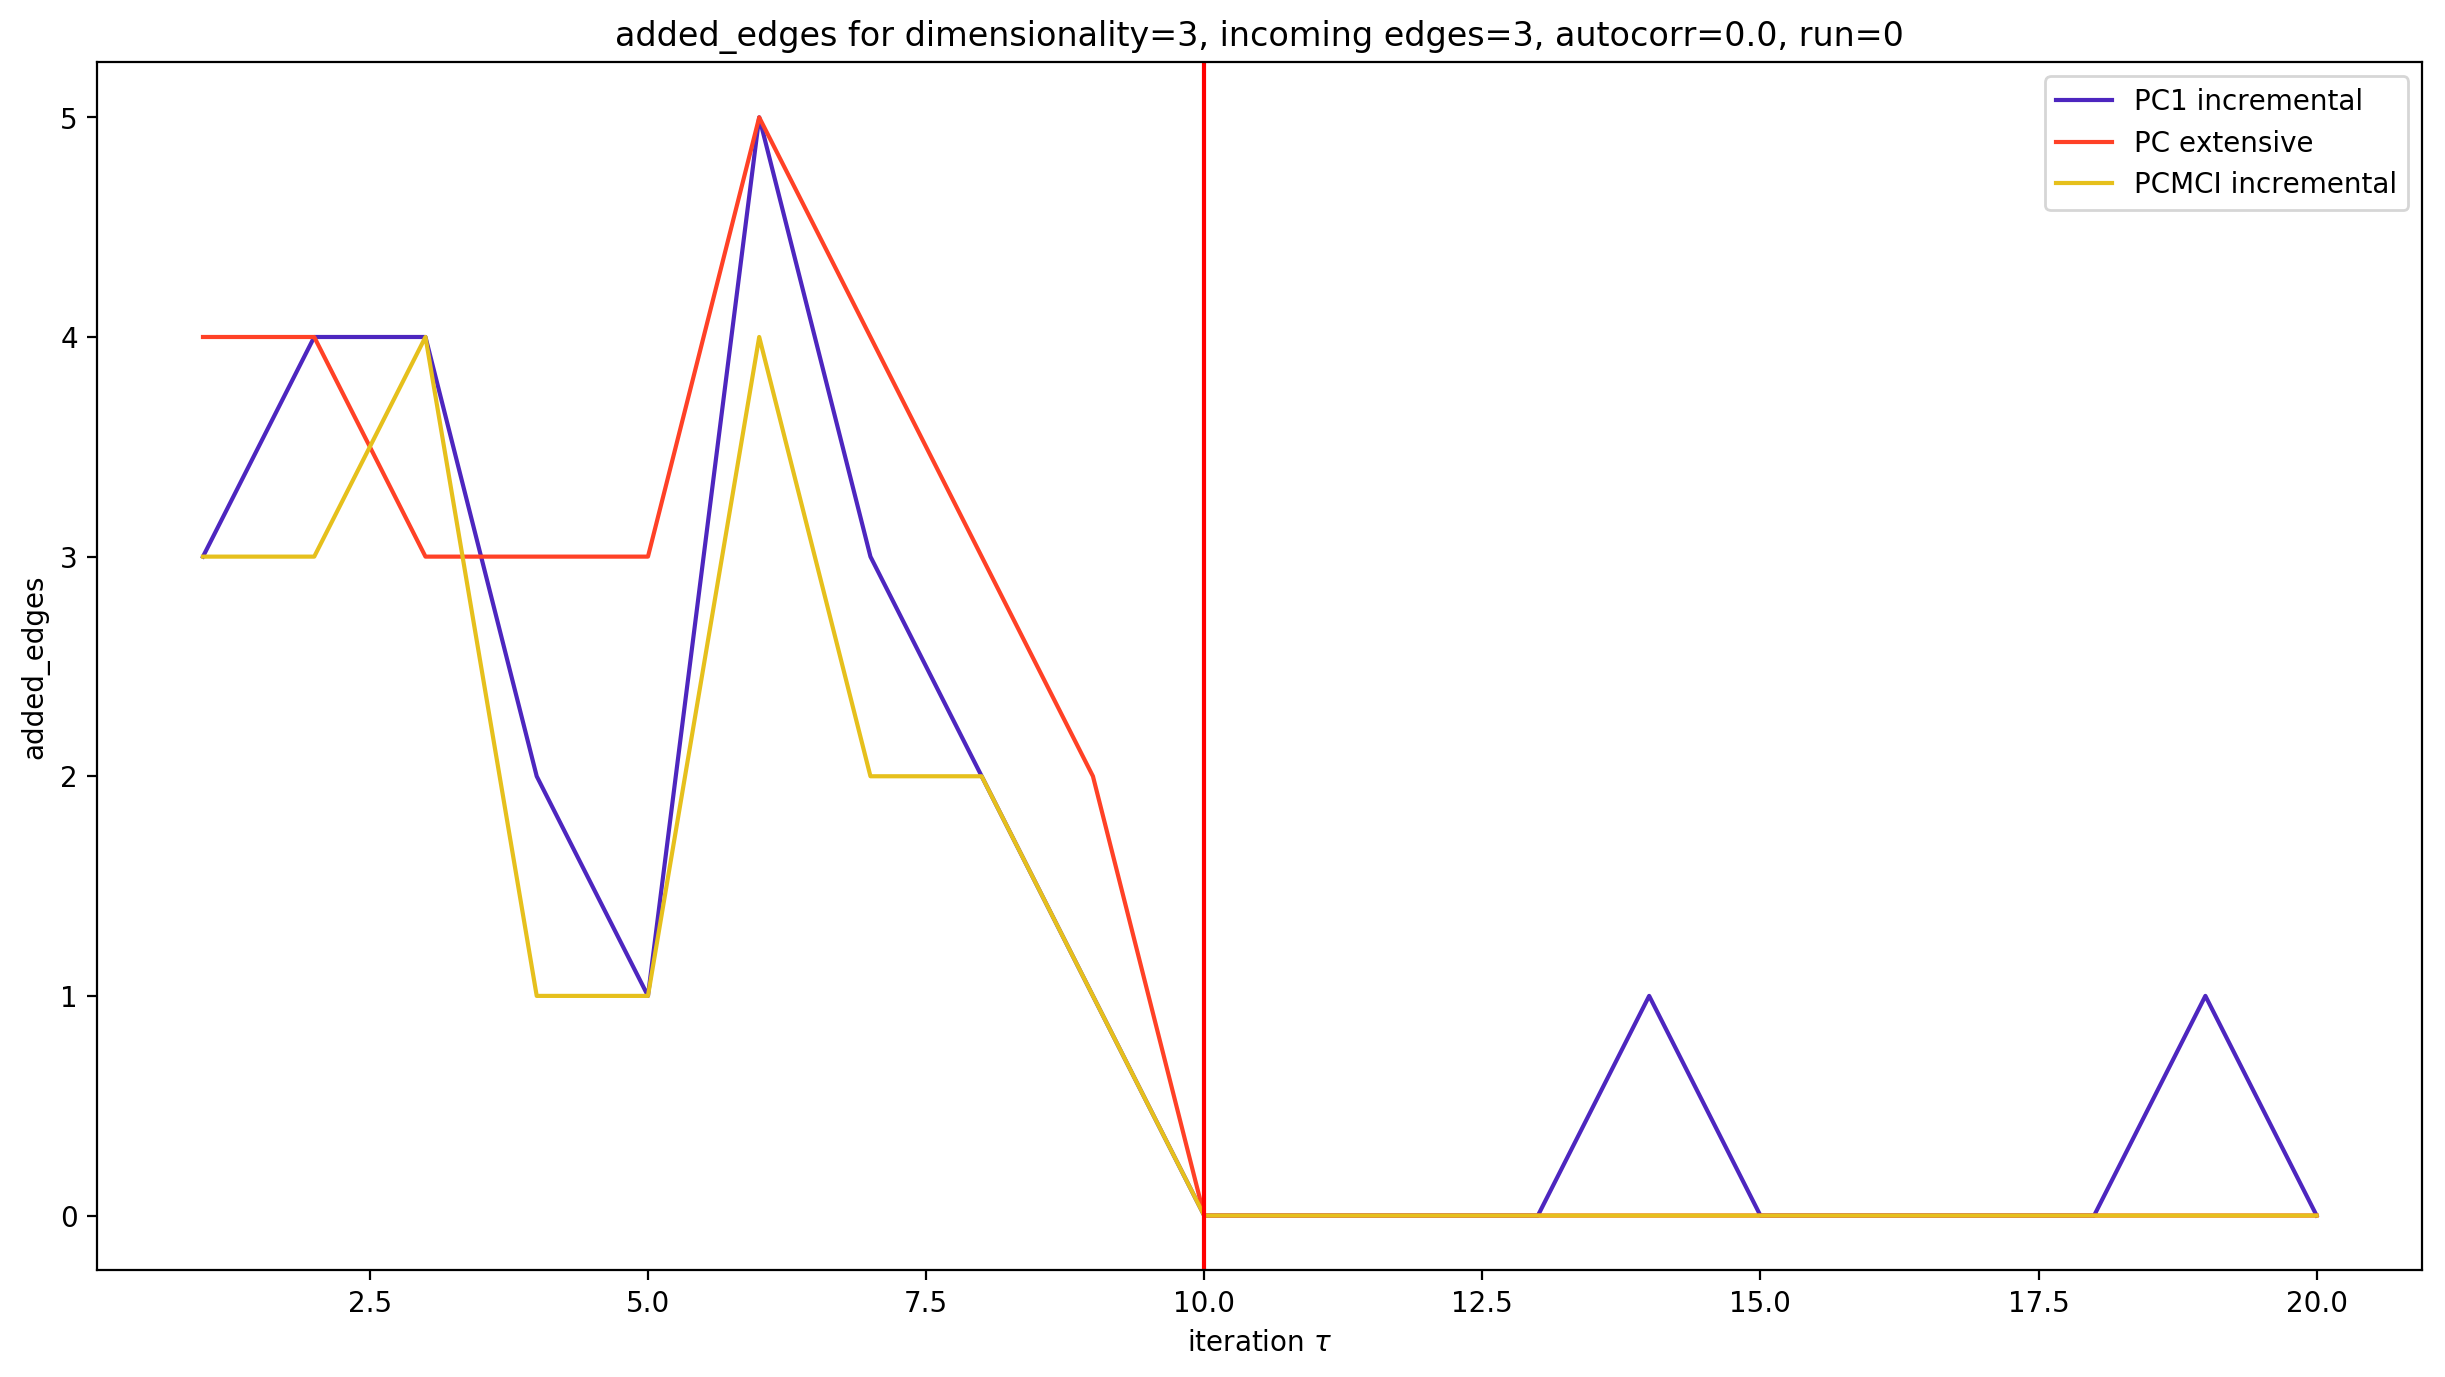

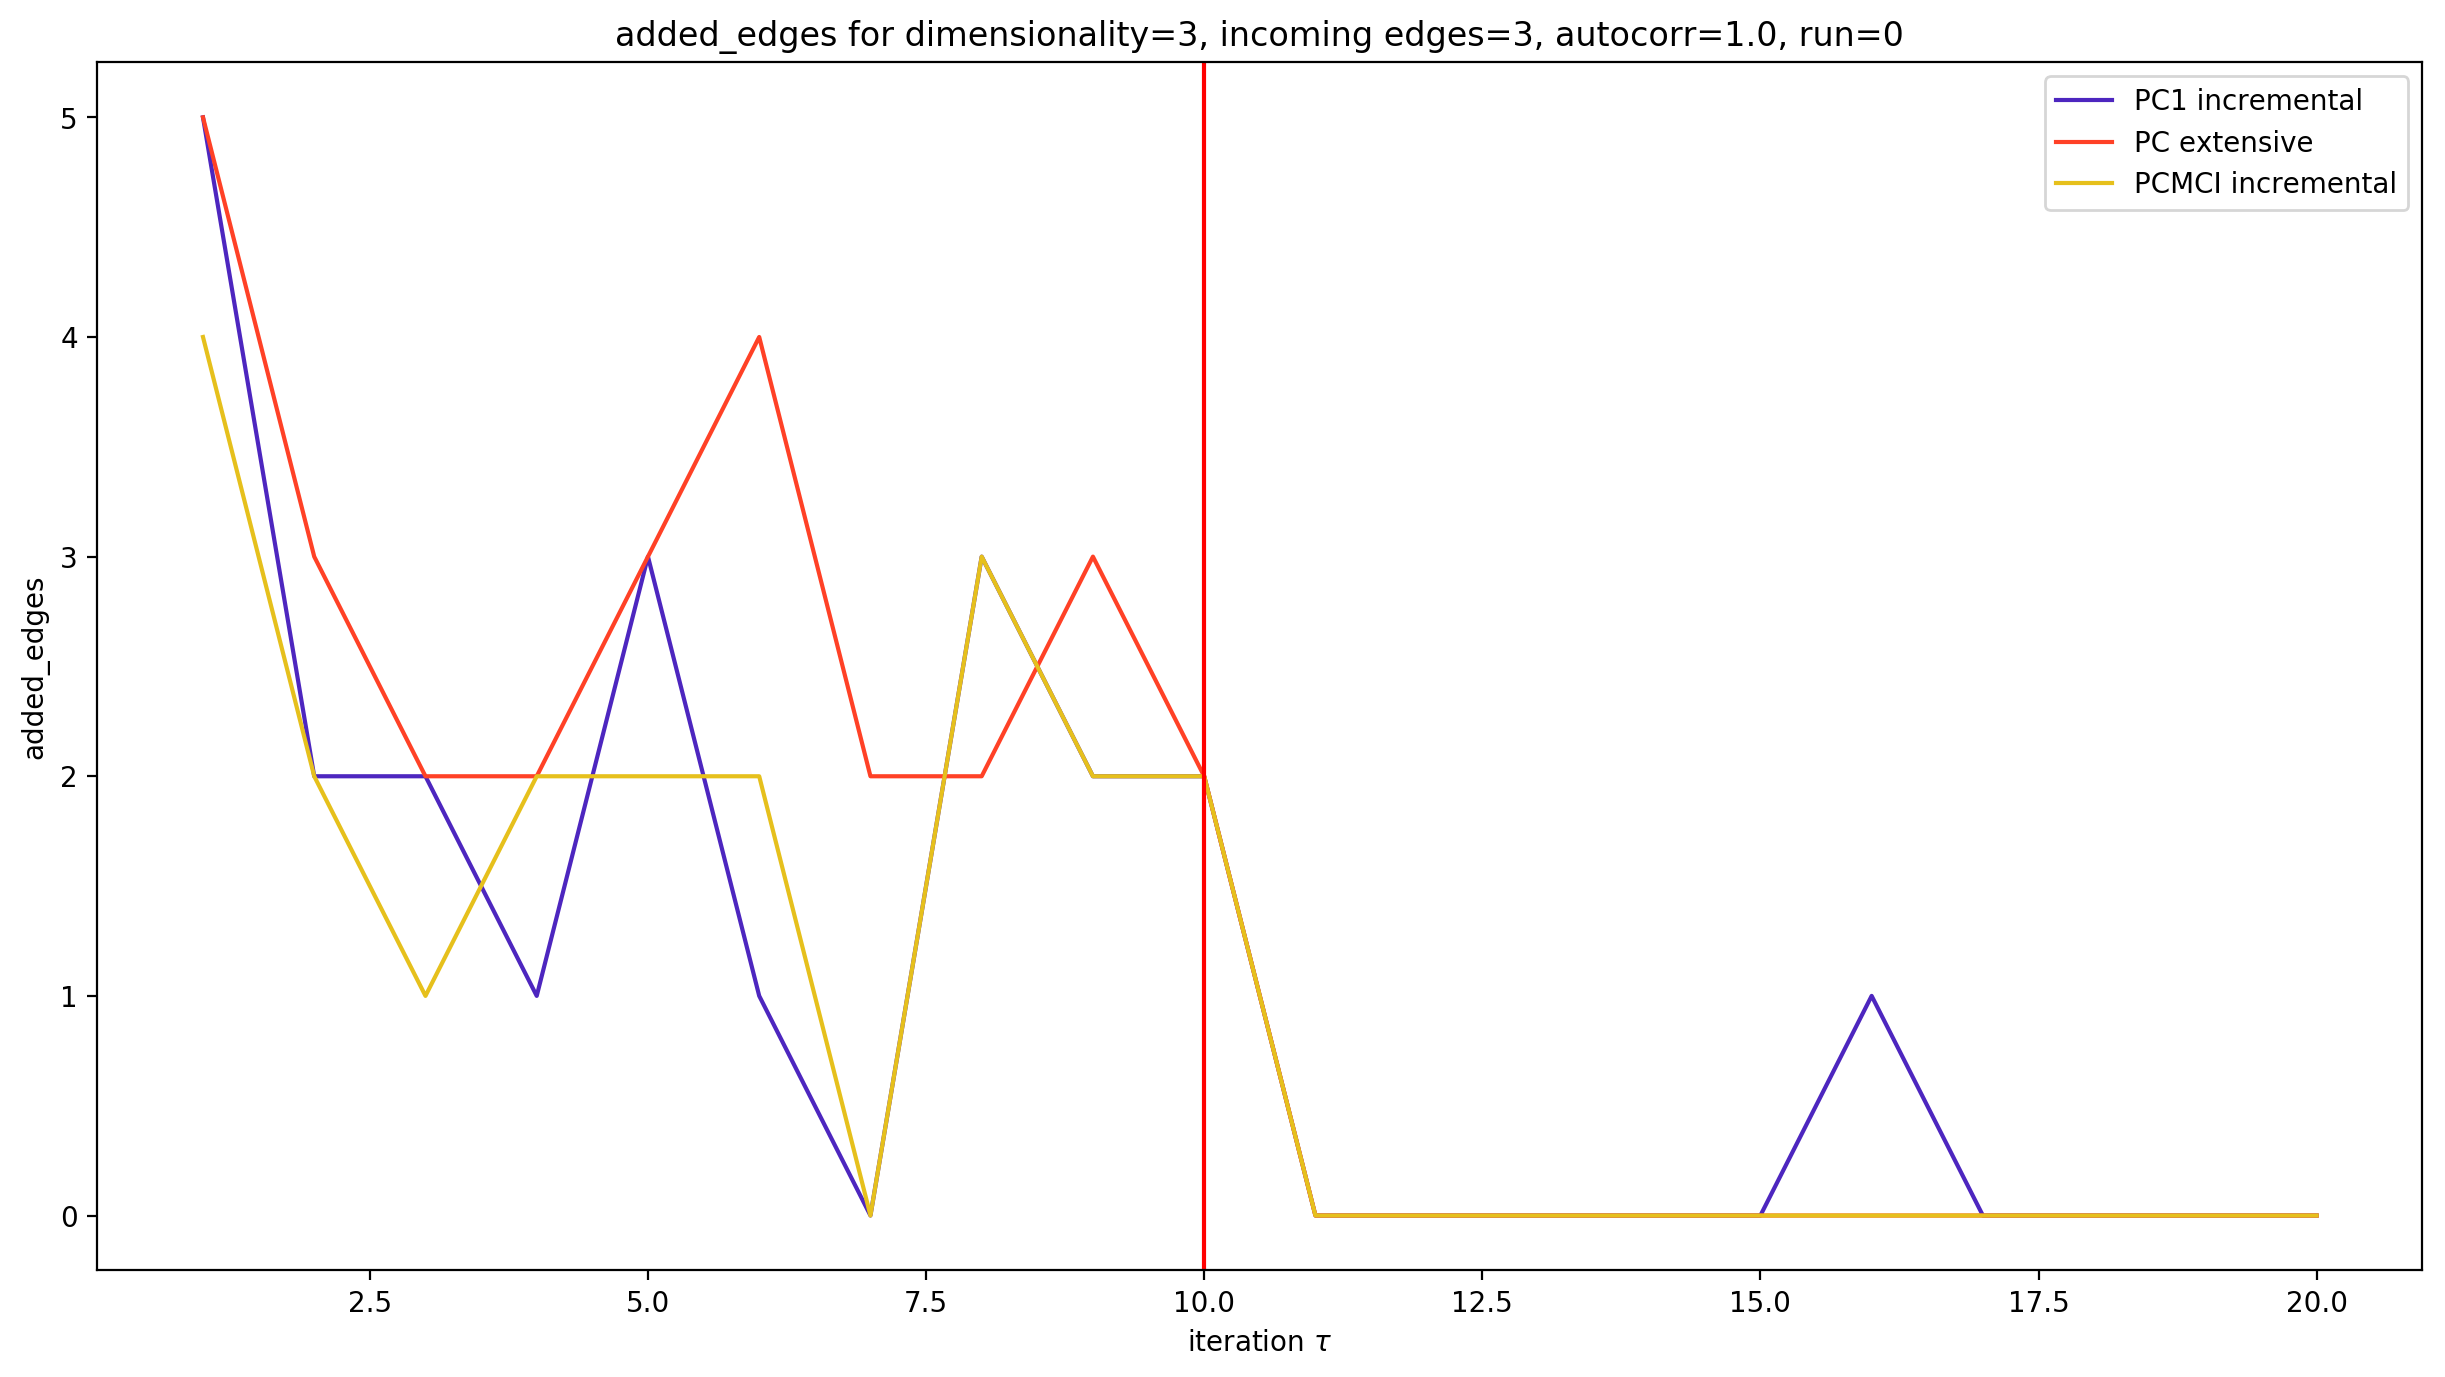

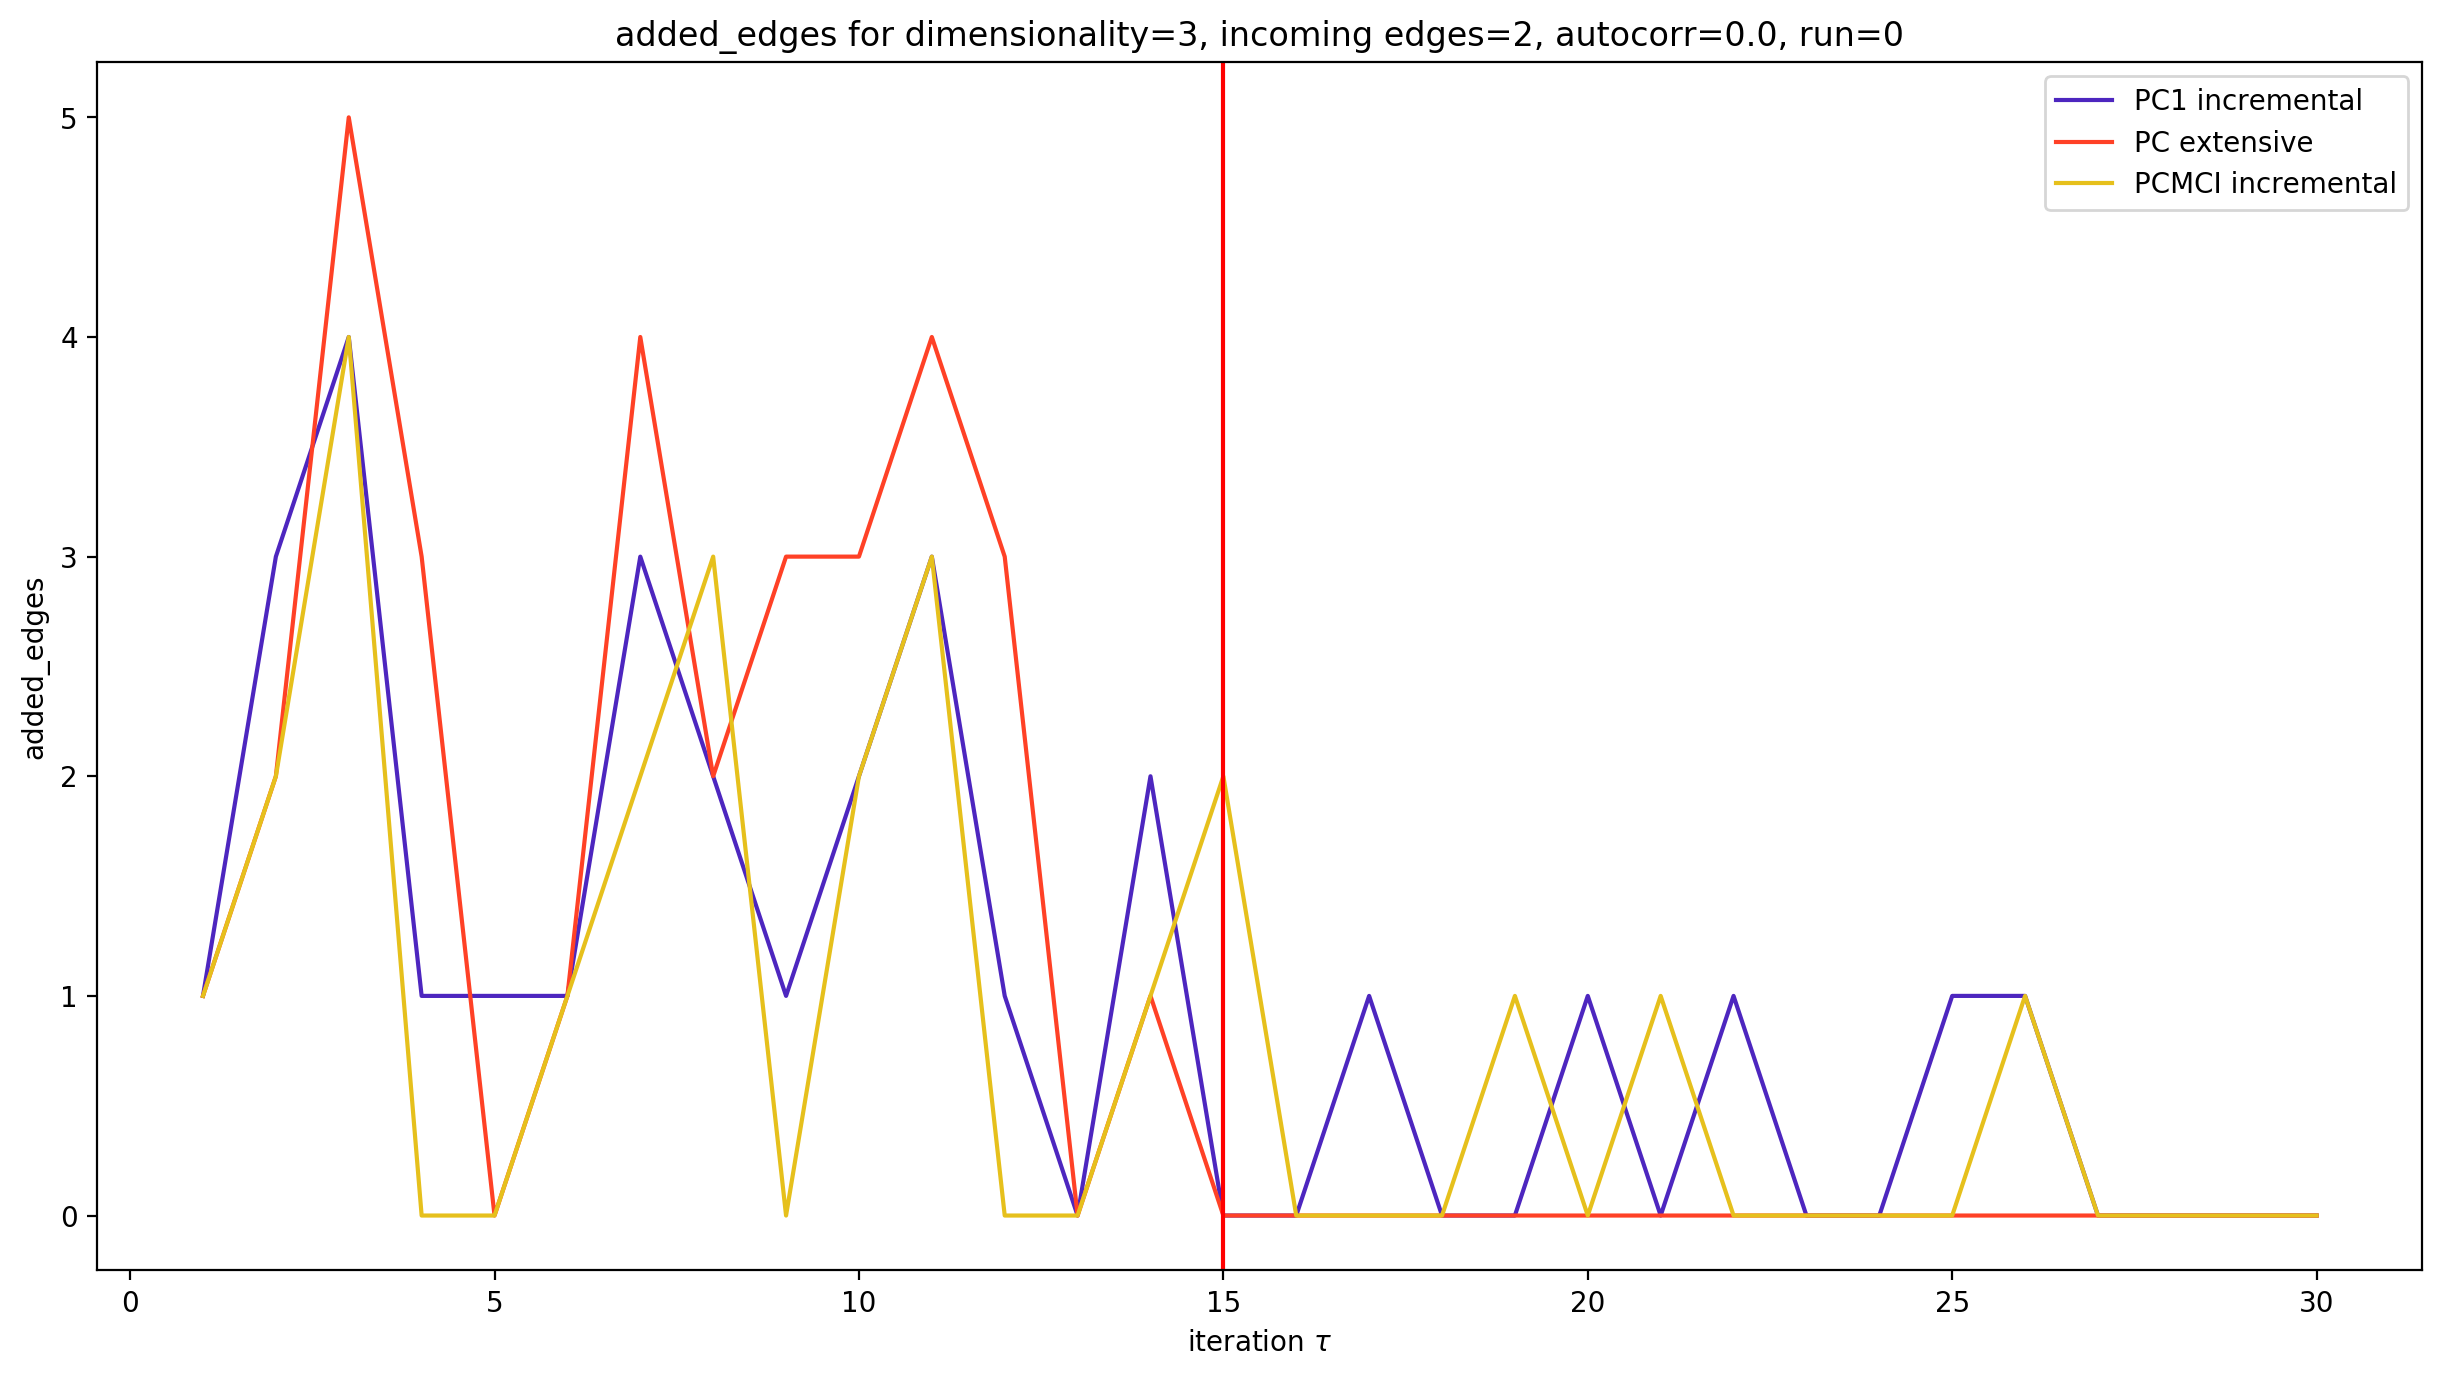

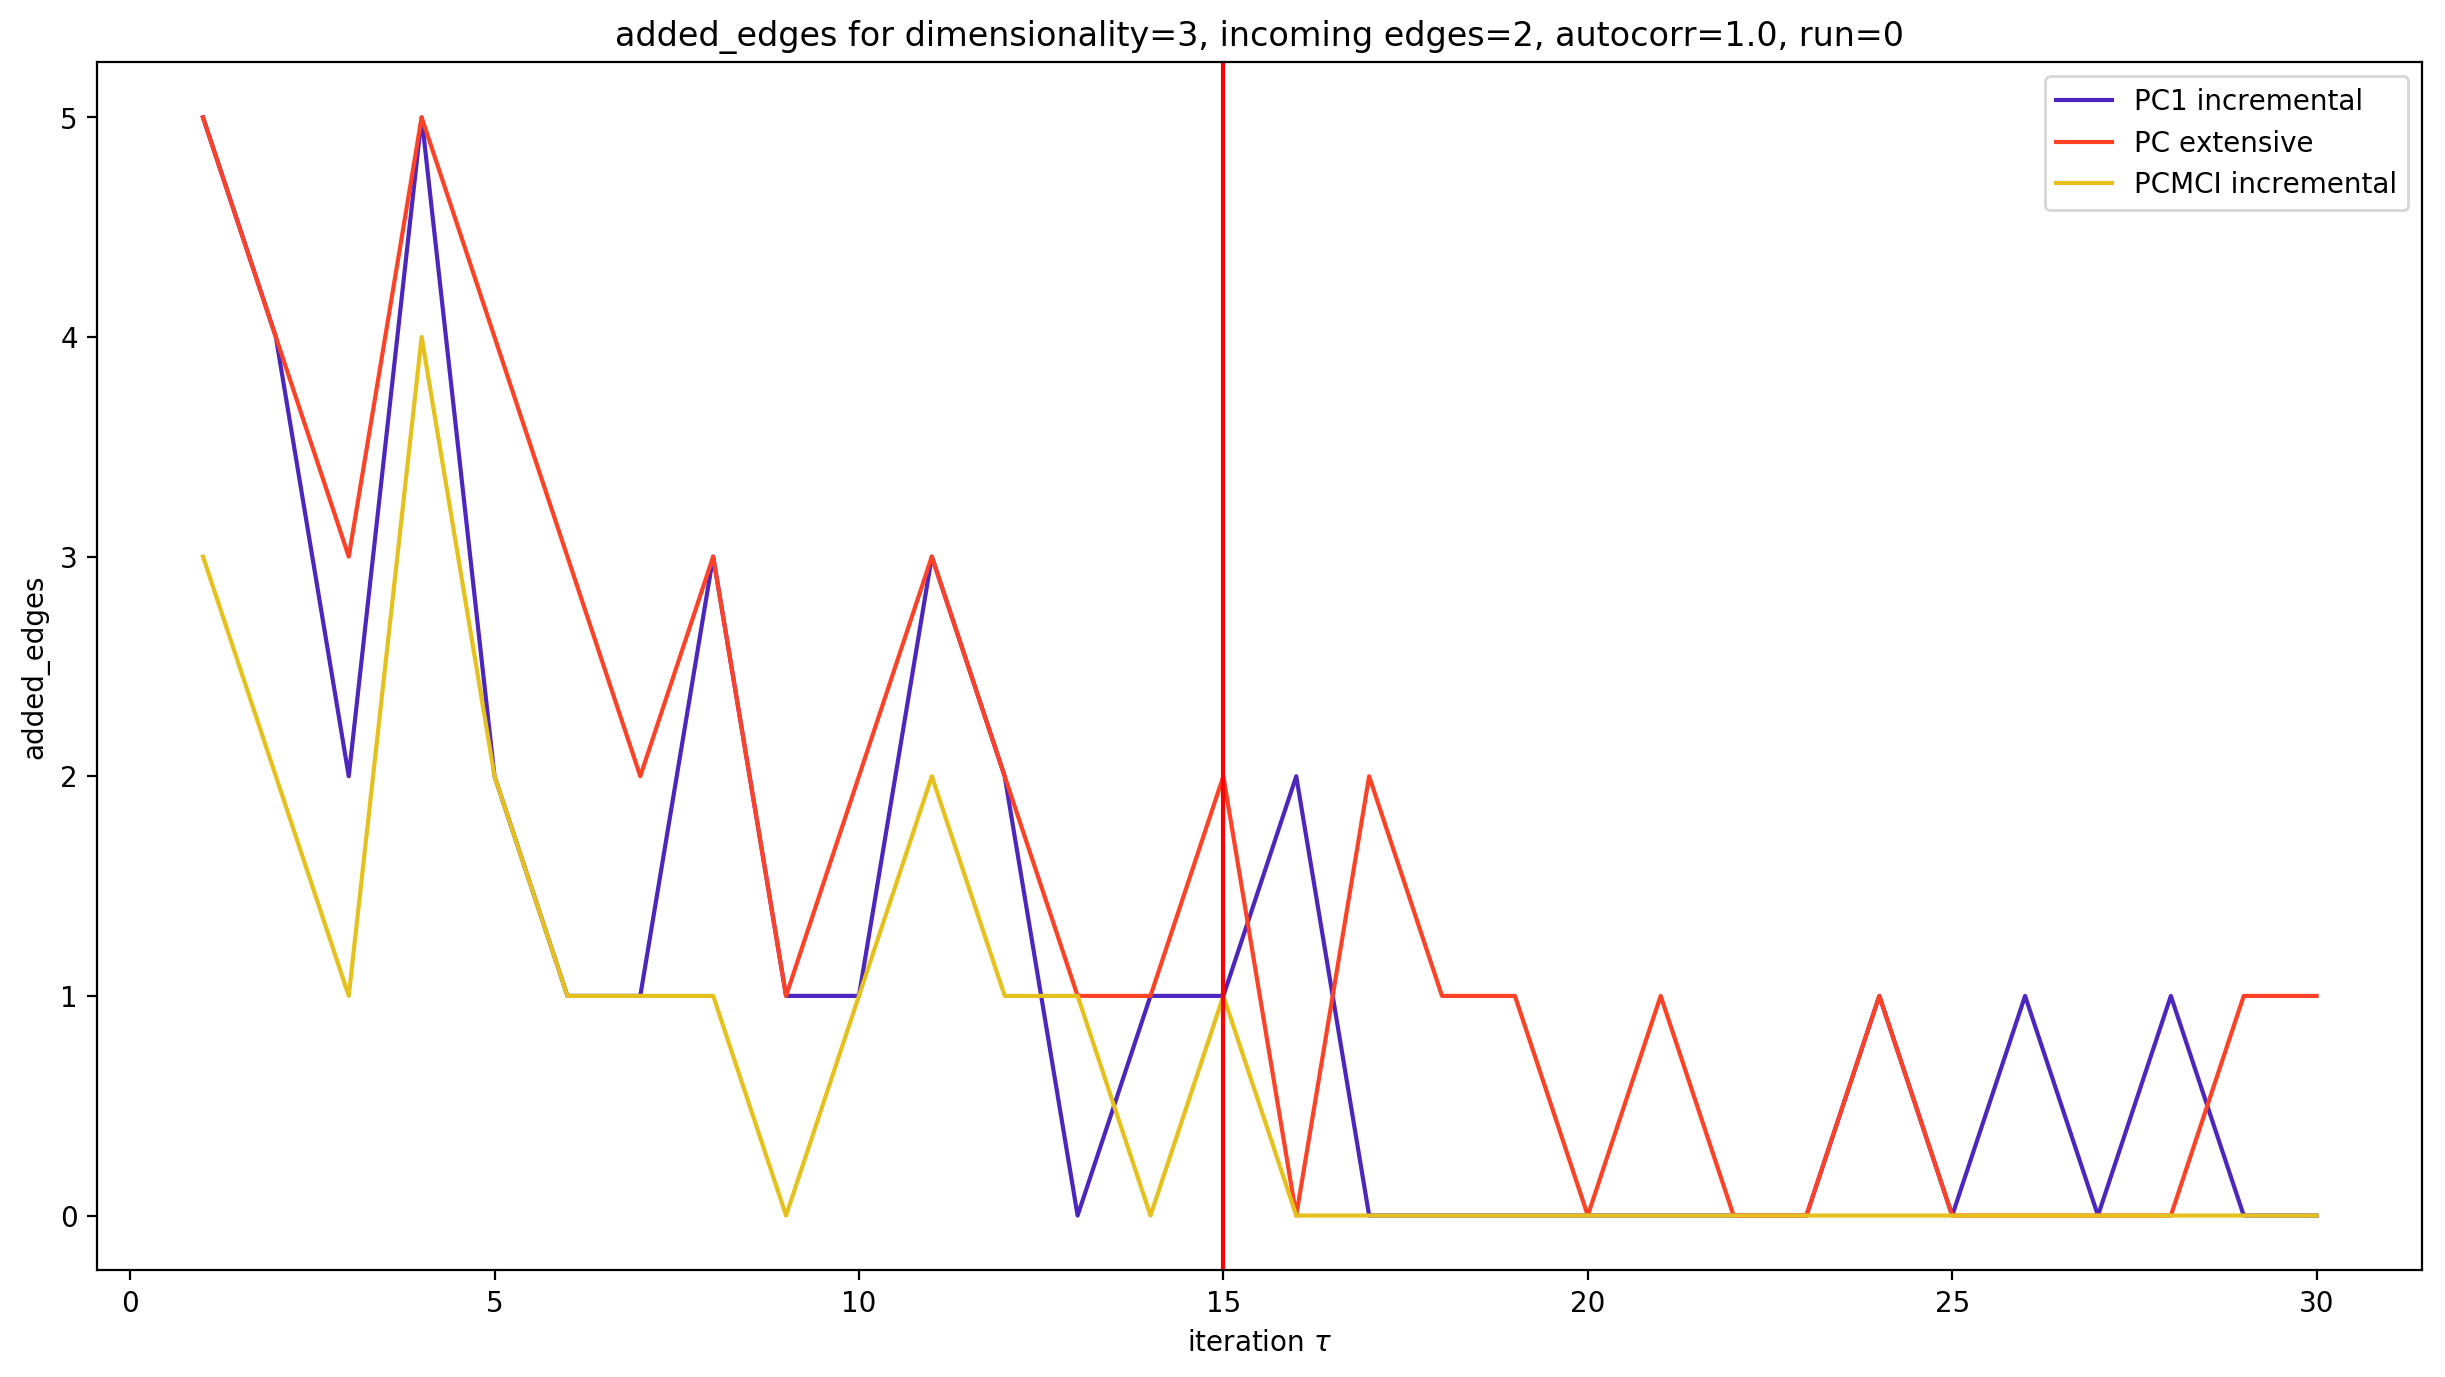

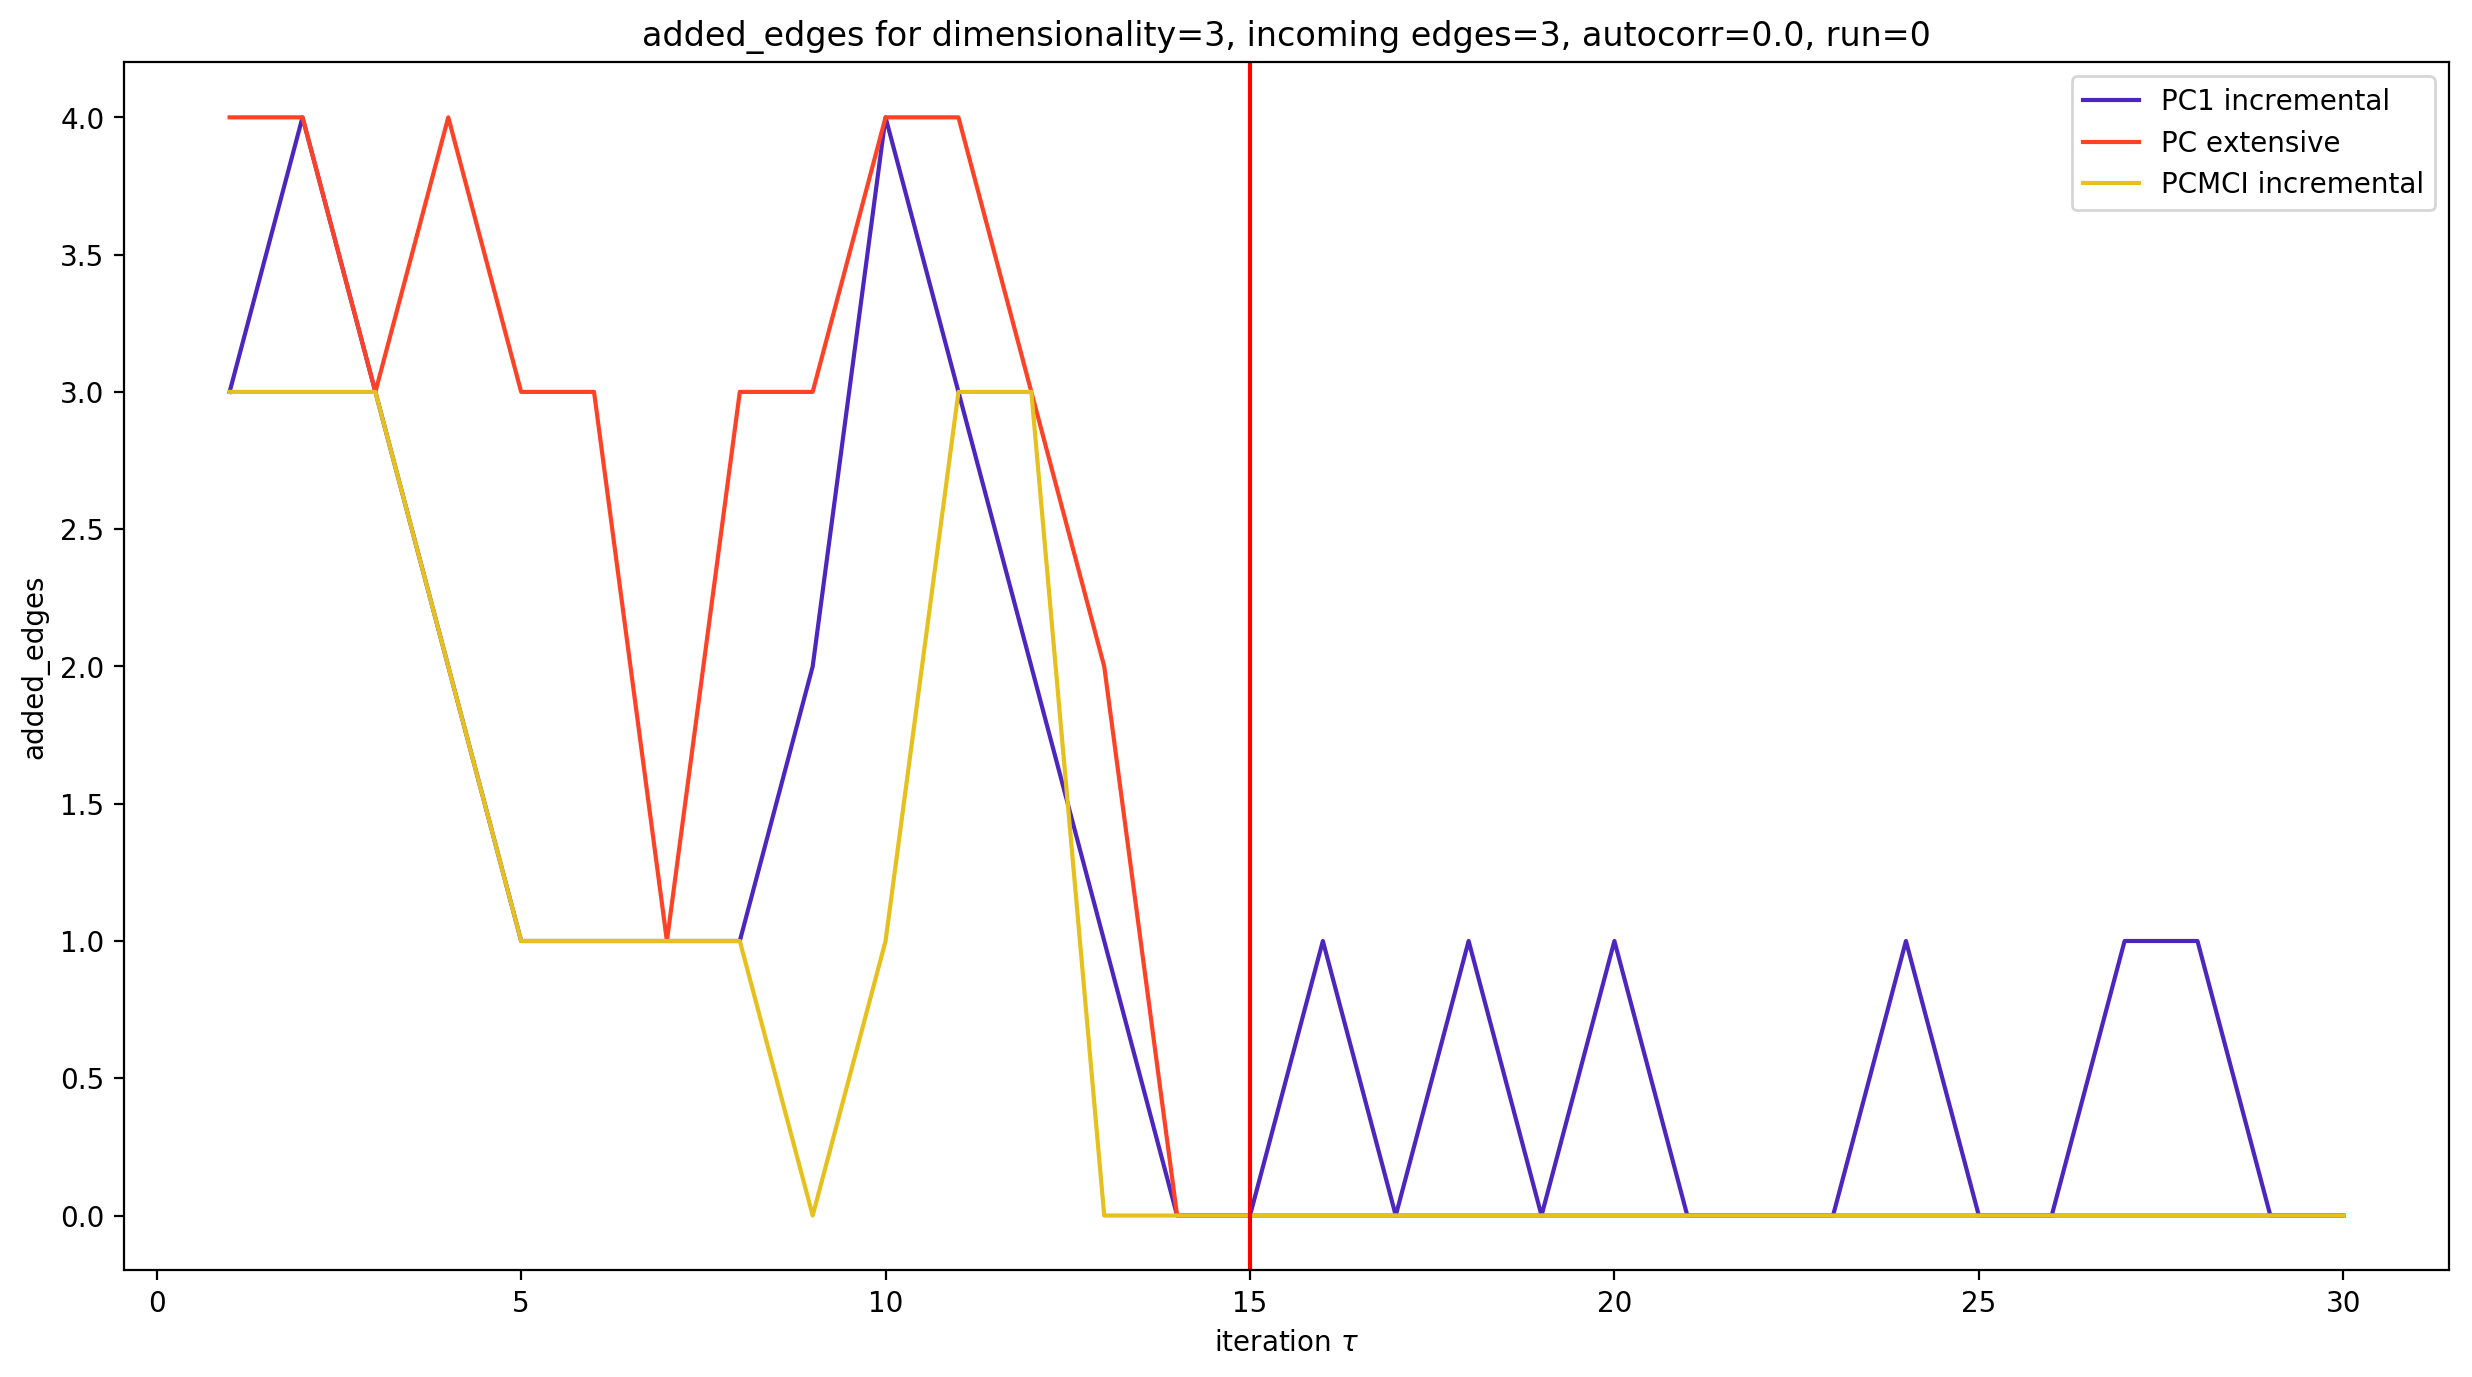

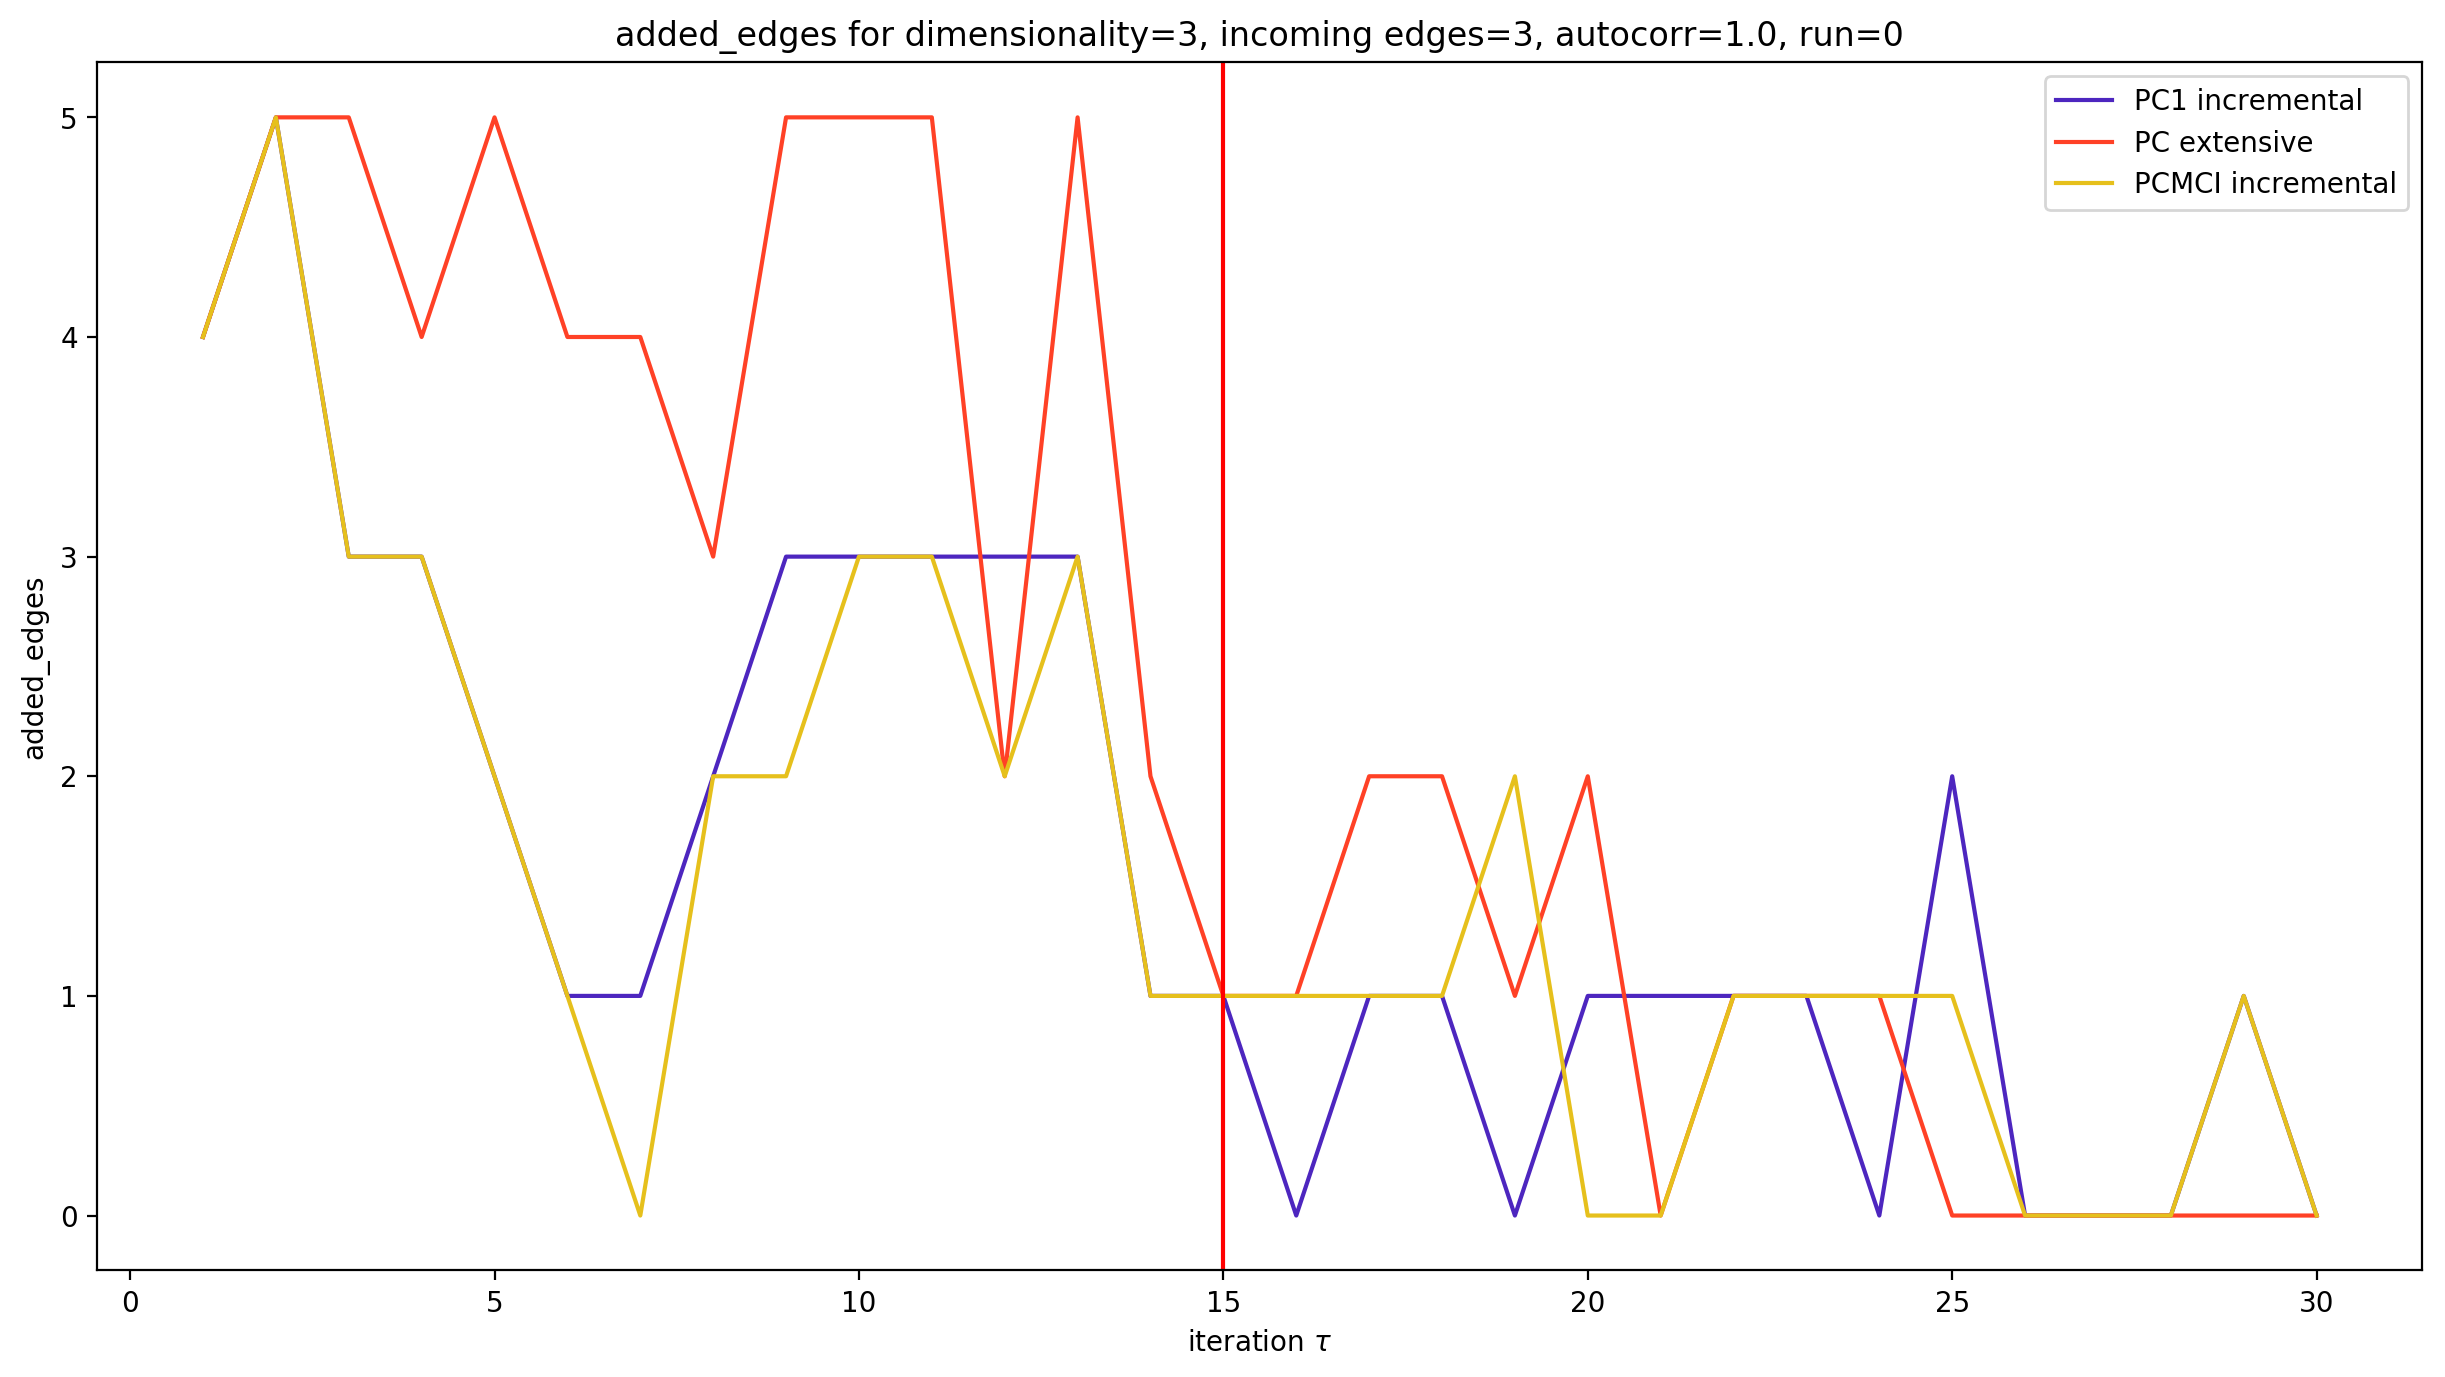

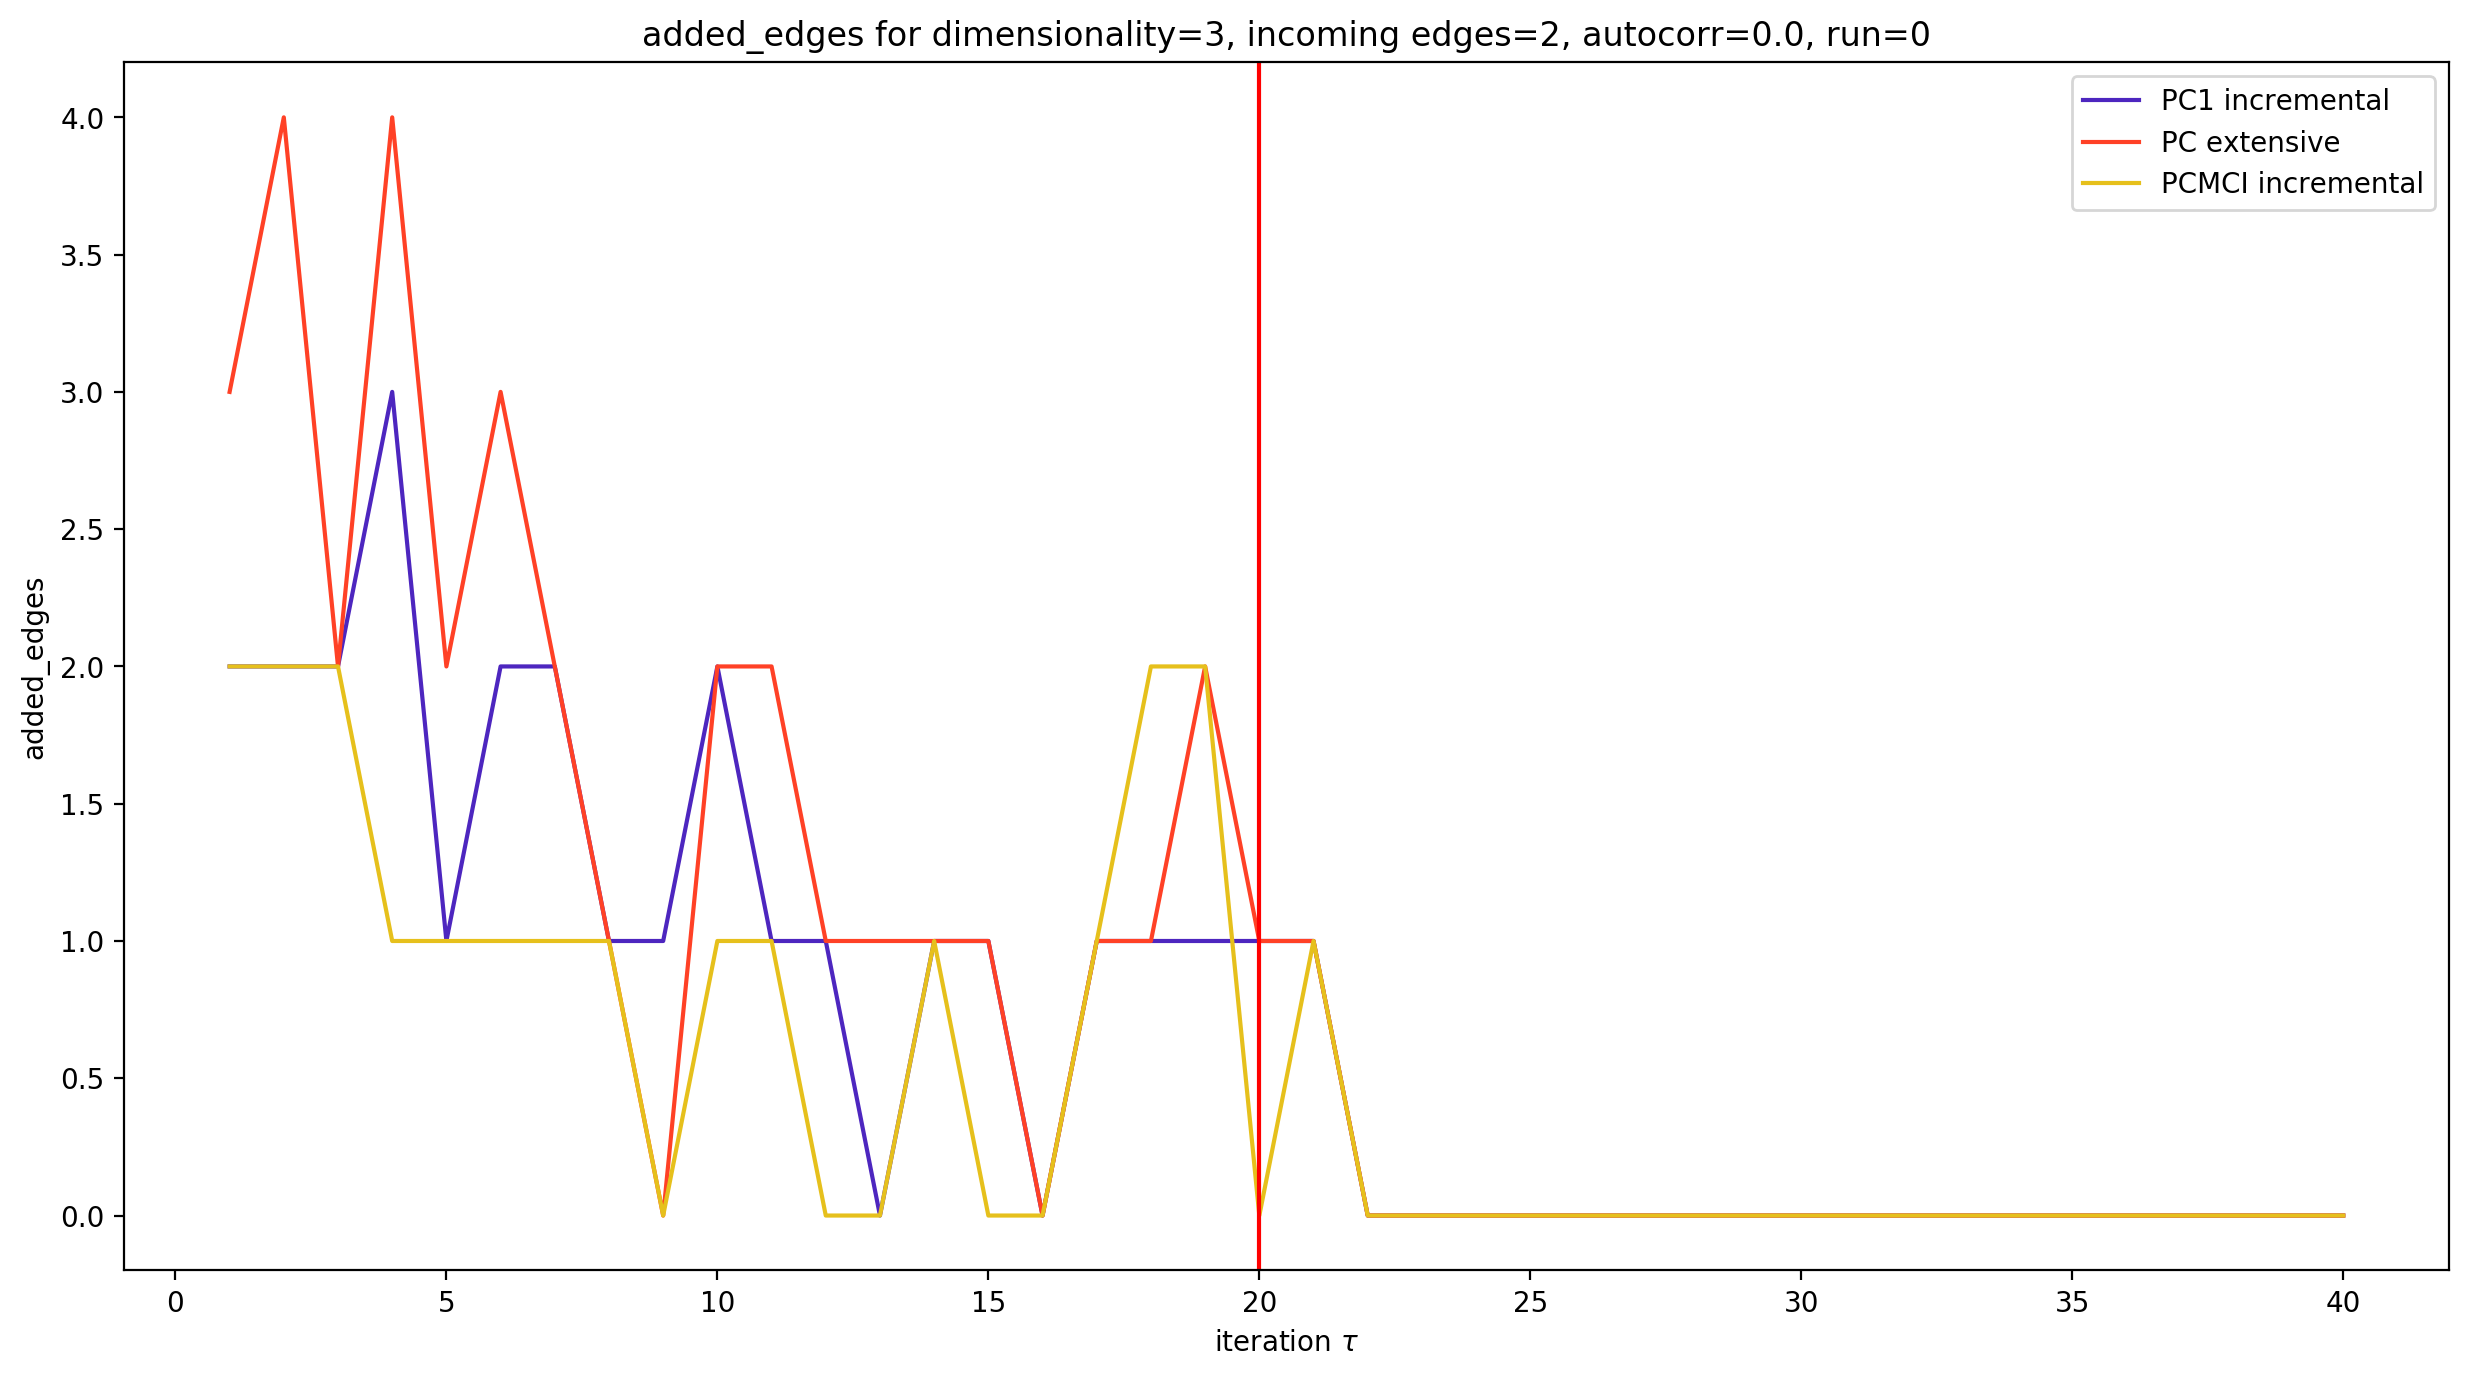

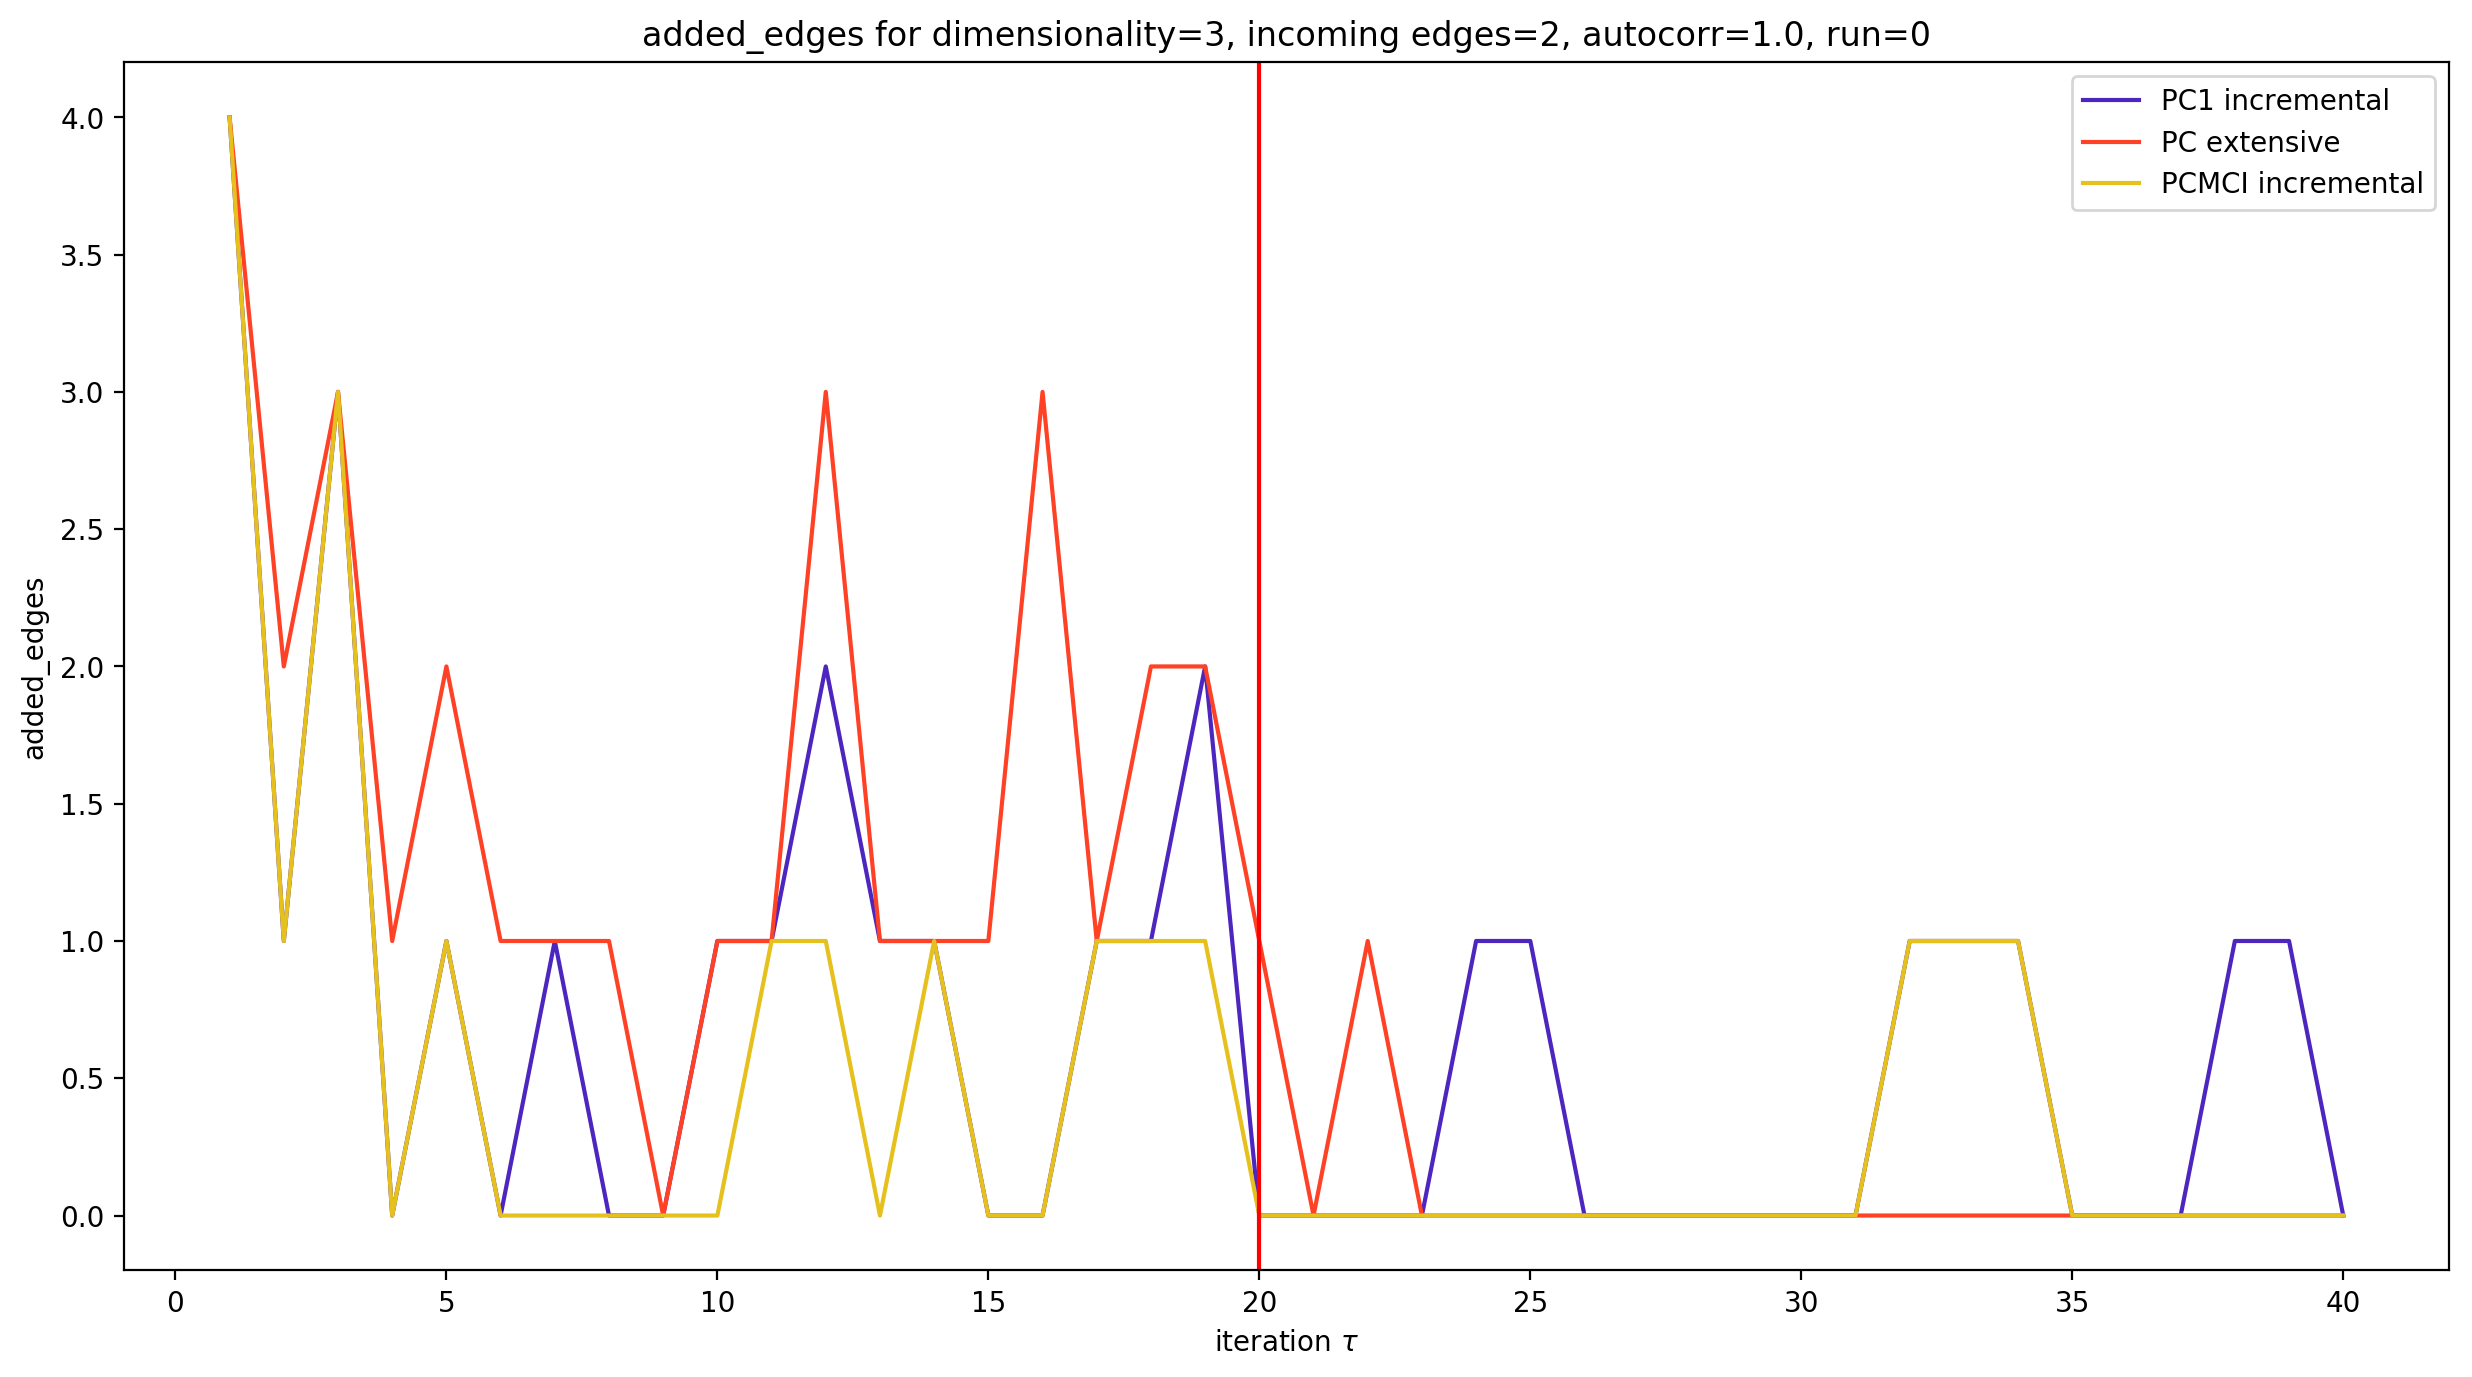

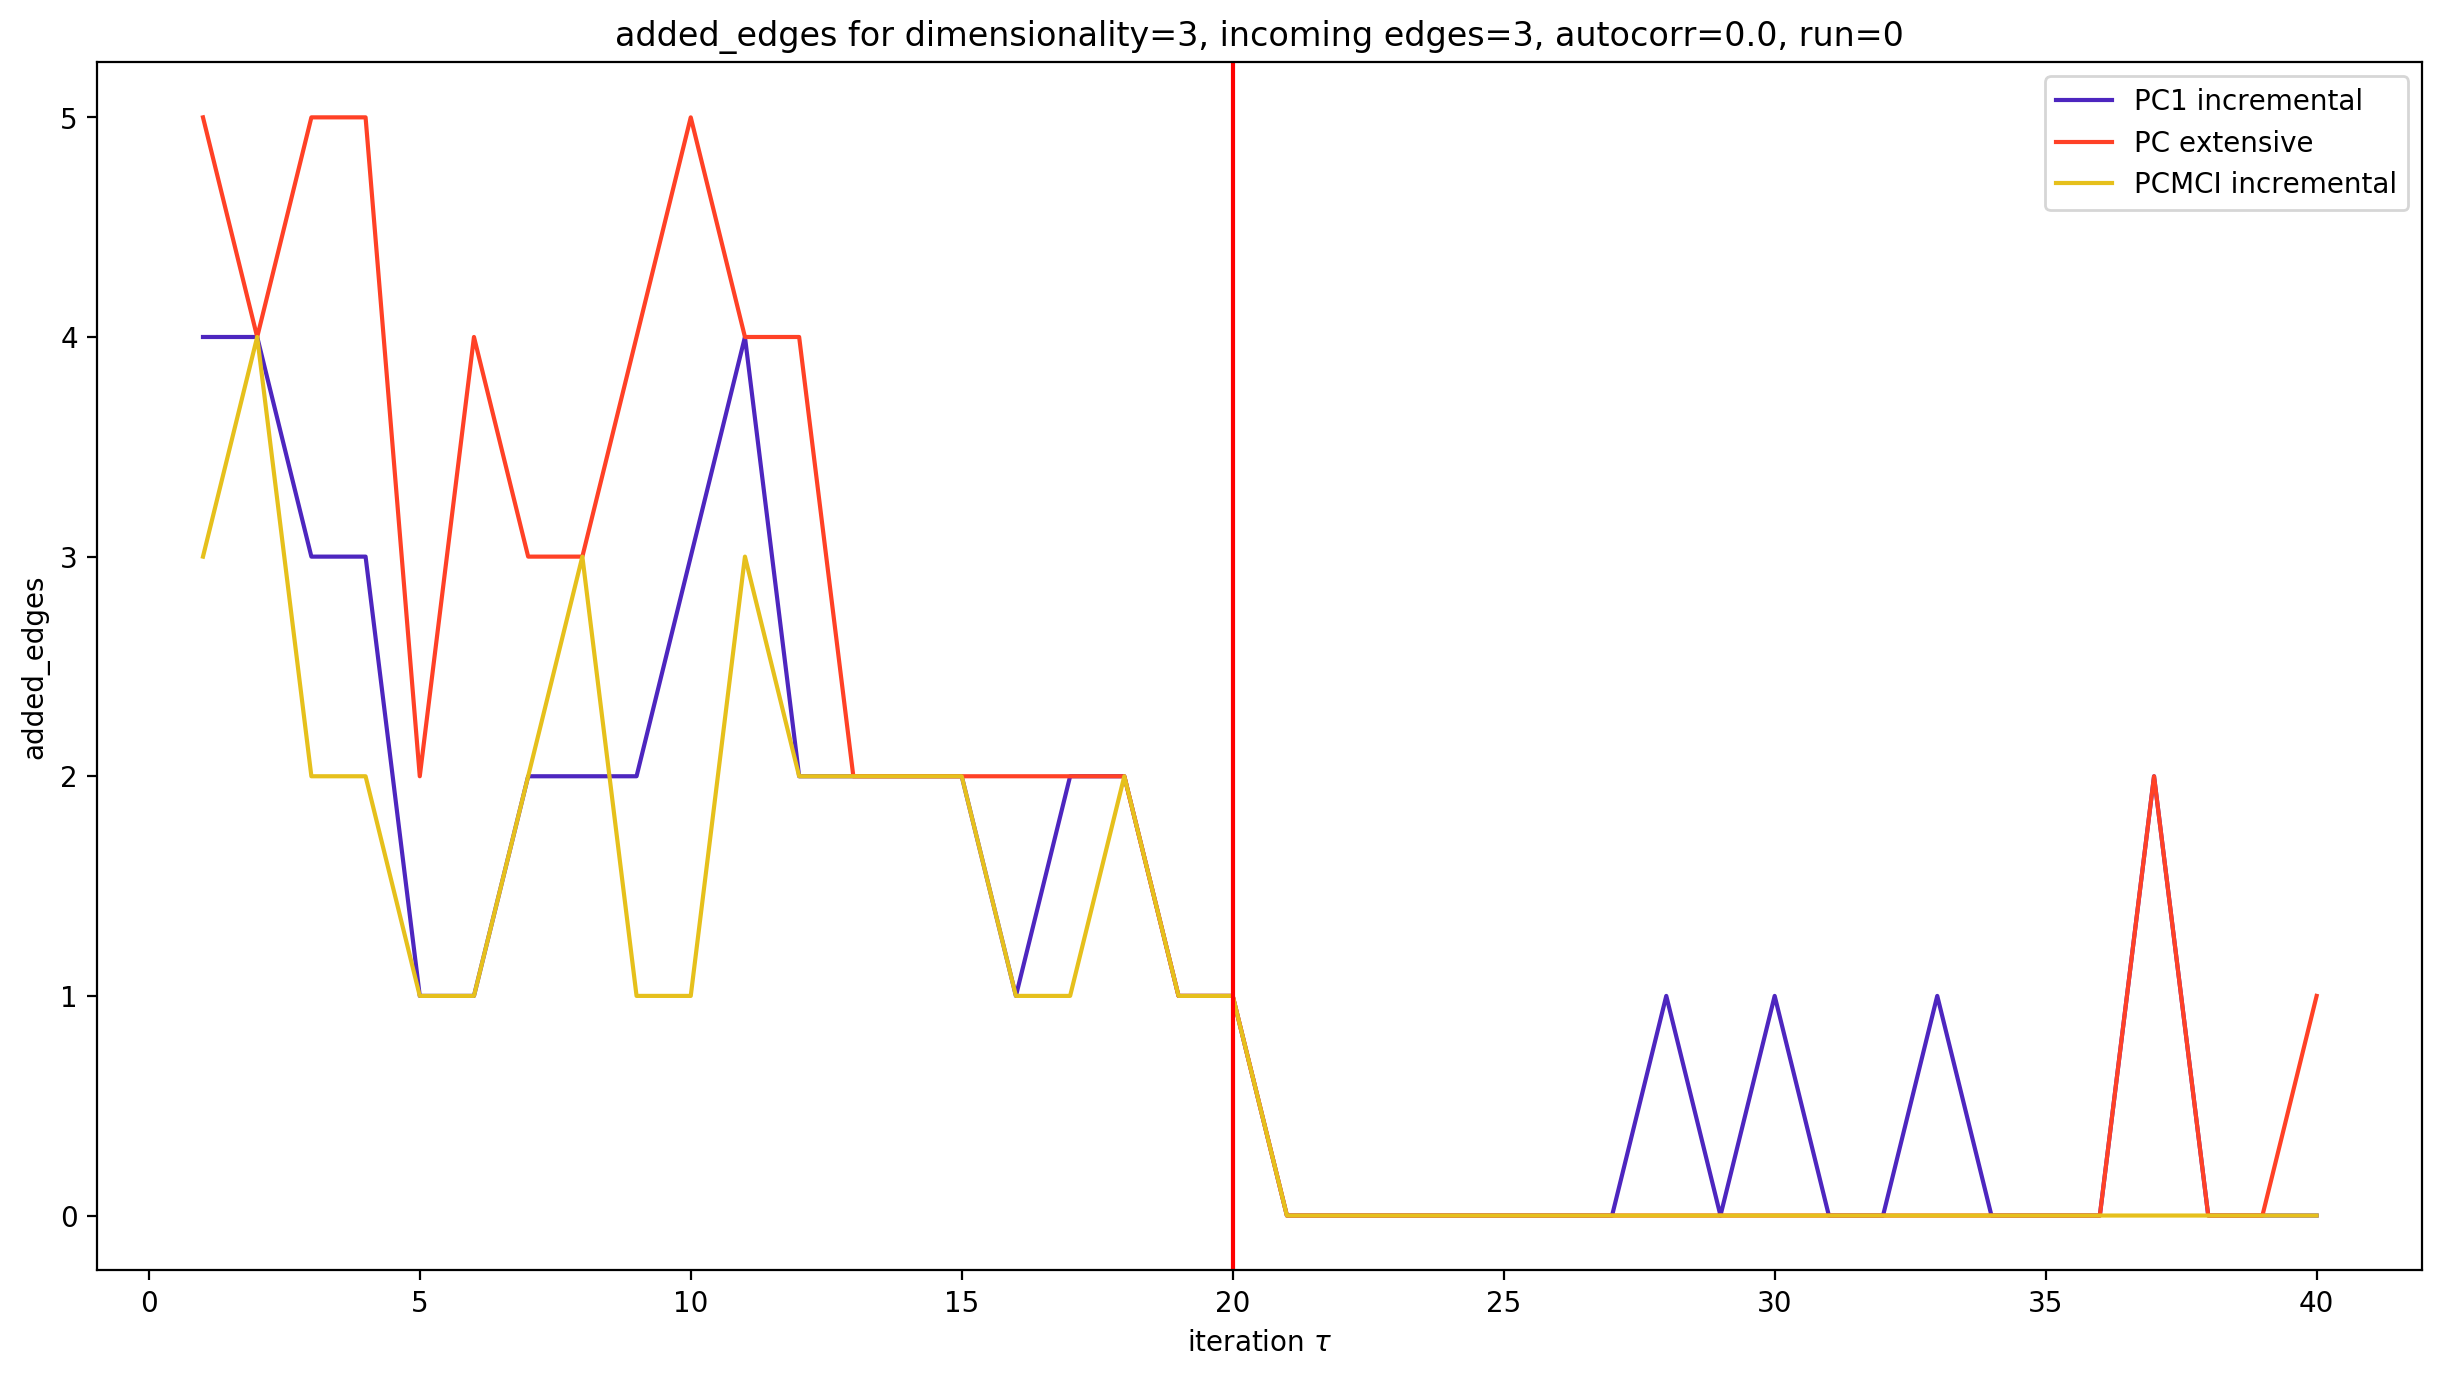

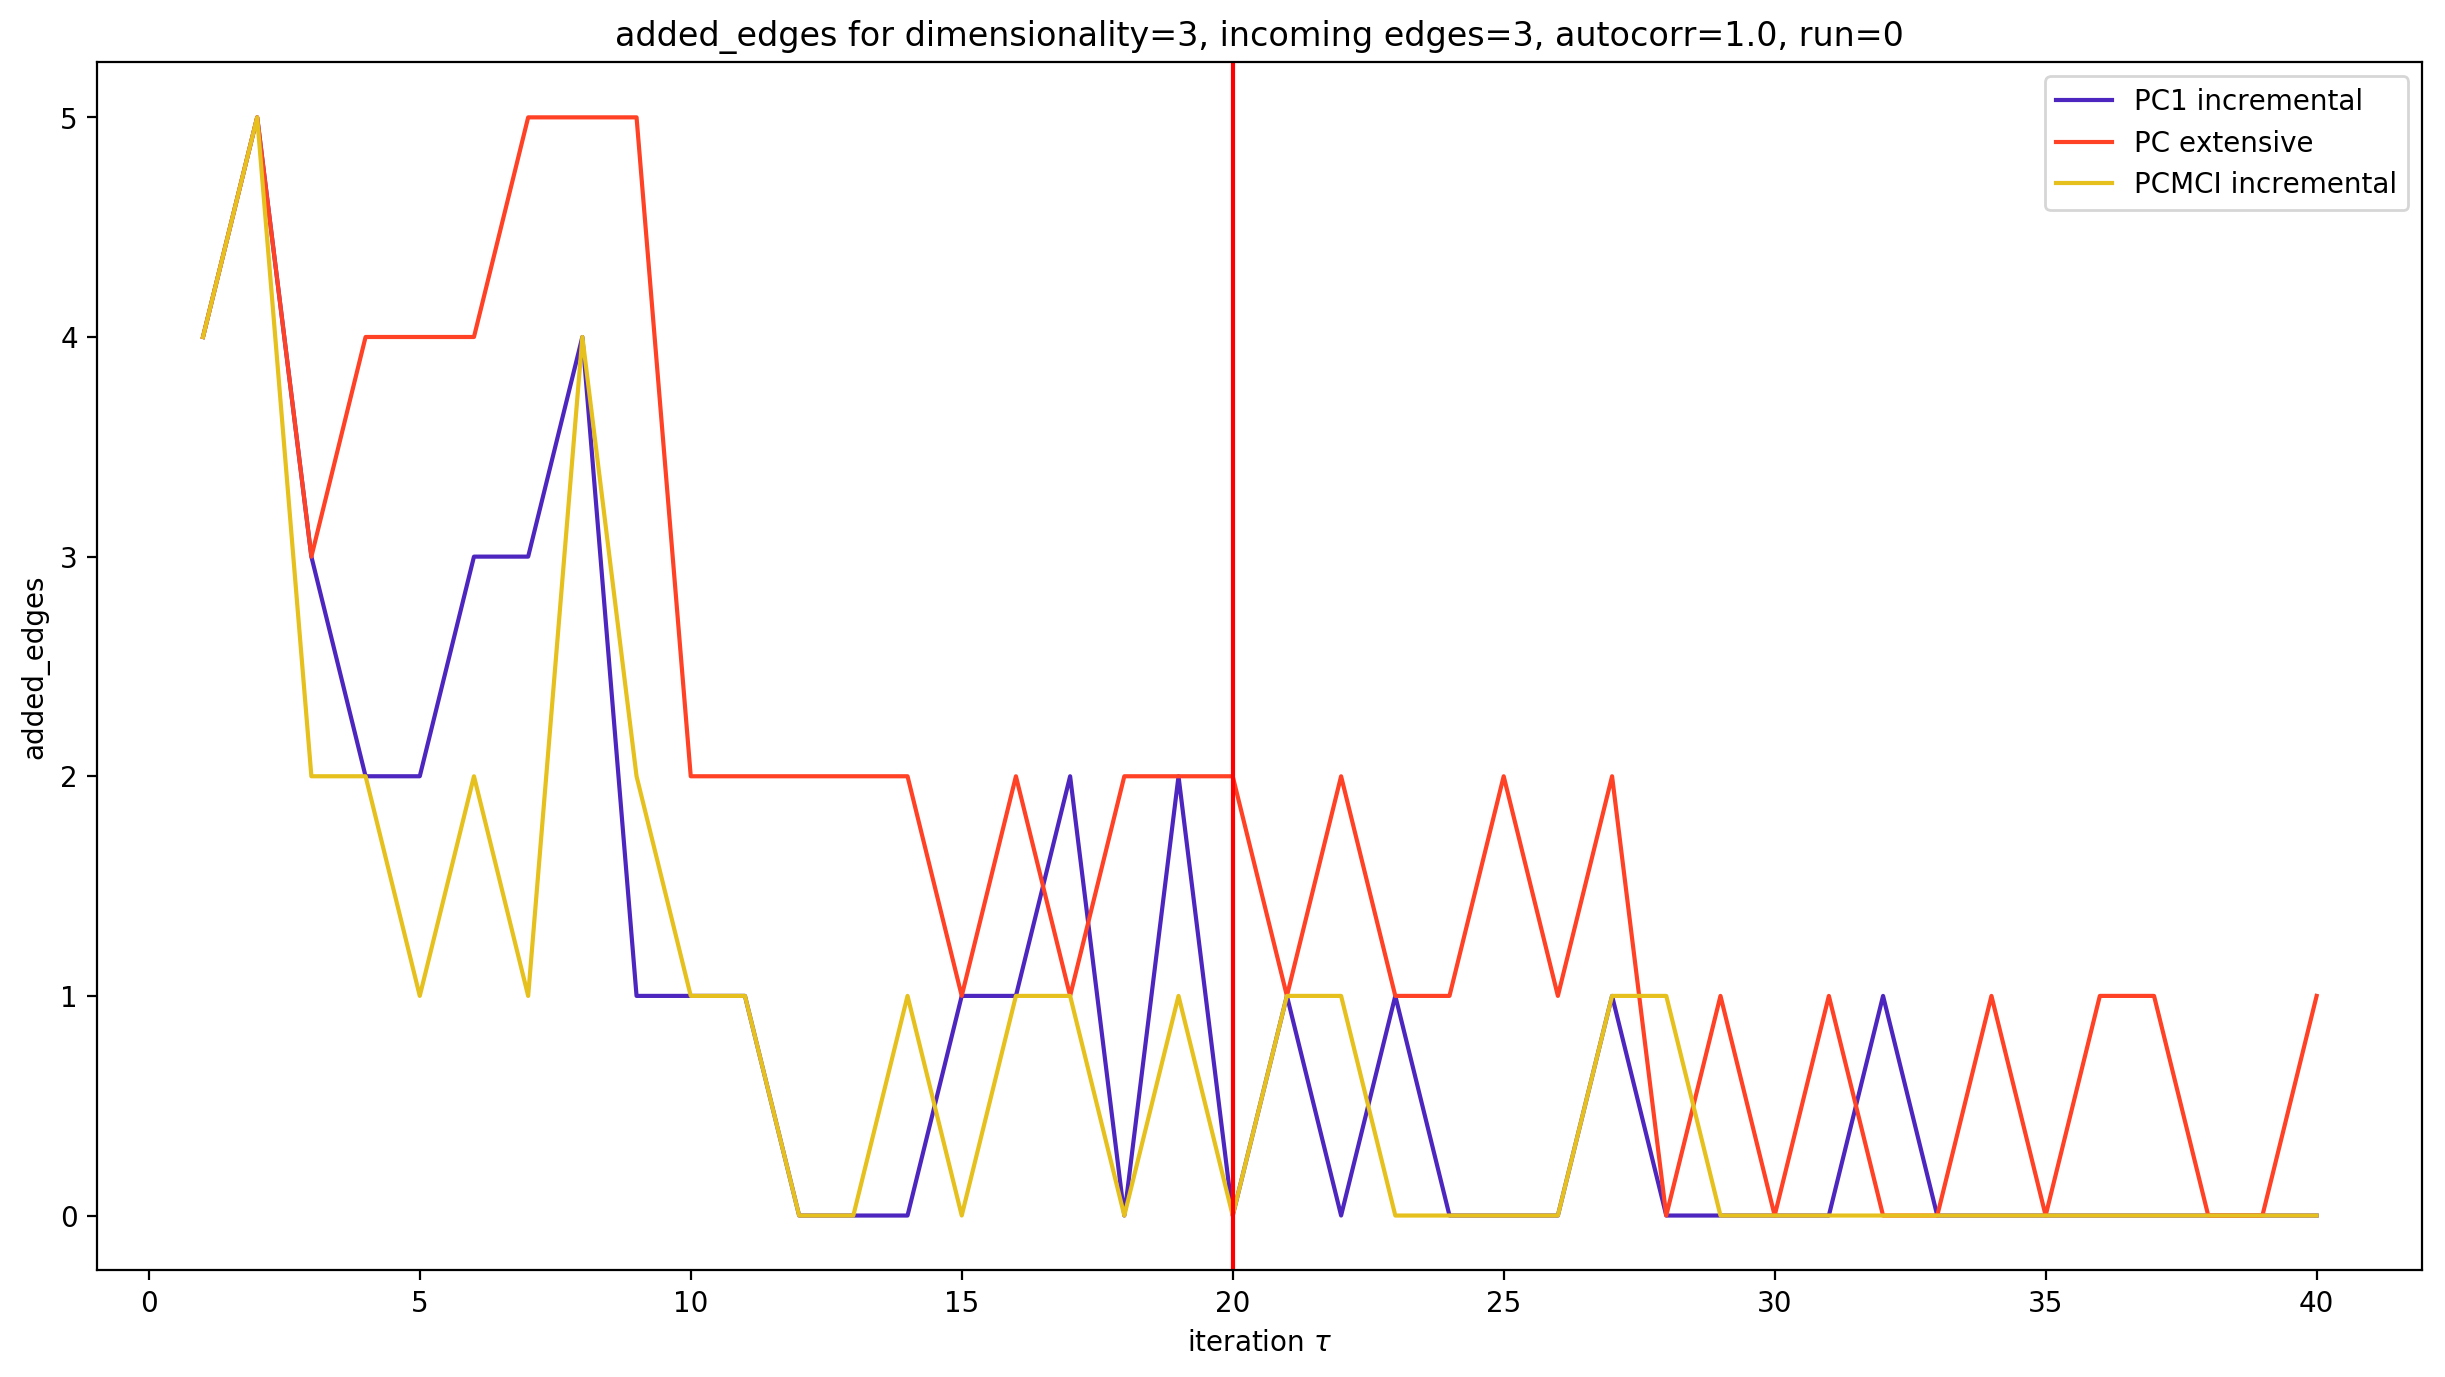

In [128]:
from math import floor

names = ['PC1 incremental', 'PC extensive', 'PCMCI incremental']
prop = 'added_edges'

width = 0.4

results = pd.read_csv('notebooks/ICML/icml_results_v2/experiment3.csv')
true_taus = np.unique(results['max time lag'])

for group, result in results.groupby(['max time lag', 'dimension', 'incoming edges', 'autocorr', 'run']): 
    
    tau = int(group[0])
    dim = int(group[1])
    in_edges = int(group[2])
    autocorr = float(group[3])
    run = int(group[4])
    
    if run != 0:
        continue
    
#     if (tau, dim, in_edges, autocorr) not in visualize:
#         continue
    
    colors = plt.cm.CMRmap(np.linspace(0,1,len(names)+2))
    plt.figure(dpi=200, figsize=(15, 8))
    
    x = result['tau estimate']
    for i, name in enumerate(names):
        y = result[name + '_' + prop]
        plt.plot(x, y, color=colors[i+1], label=name)
    plt.axvline(tau, color='red')
    
    plt.xlabel('iteration $\\tau$')
    plt.ylabel(prop)
    plt.title(f'{prop} for dimensionality={dim}, incoming edges={in_edges}, autocorr={autocorr}, run={run}')
    
    plt.legend()
    plt.show()

### Trash

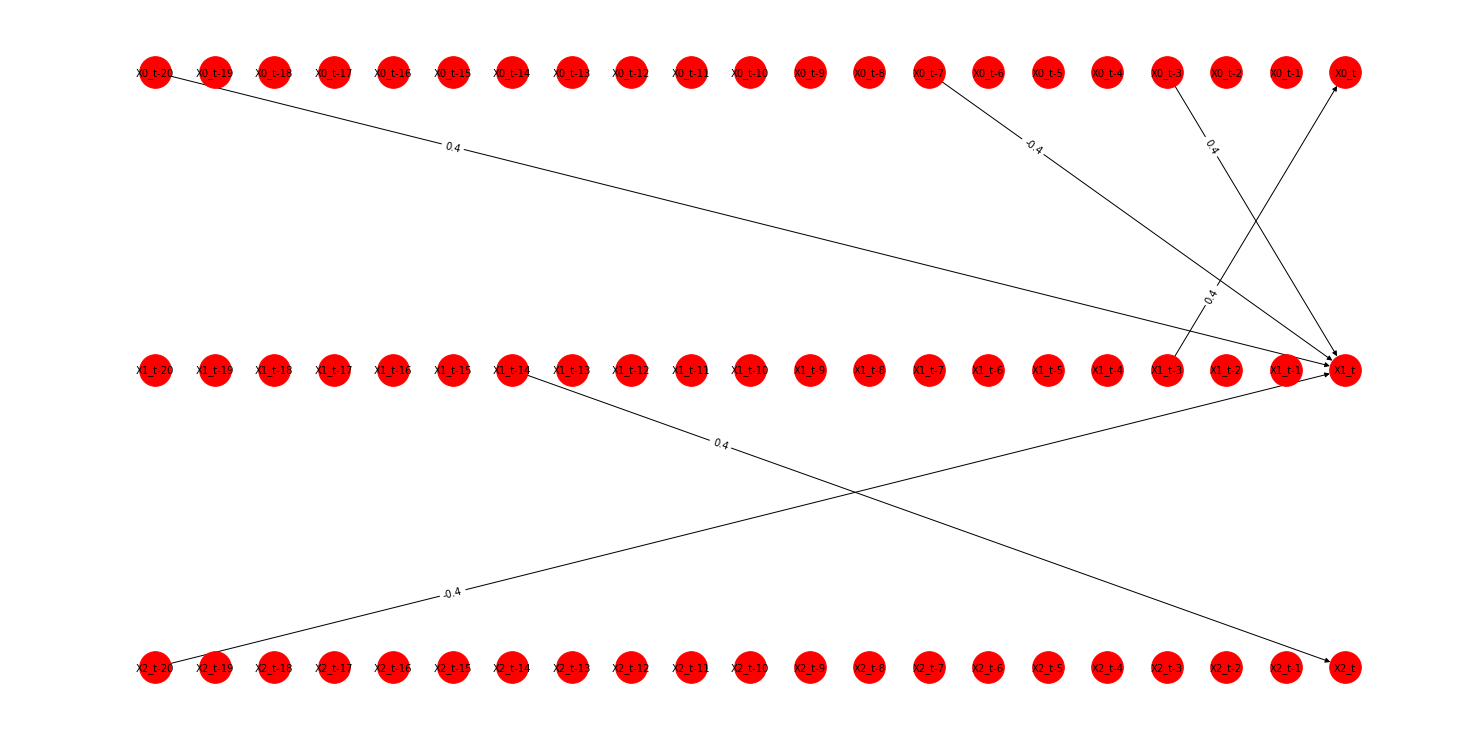

In [77]:
import matplotlib.pyplot as plt
import pickle
generator = pickle.load(open('notebooks/ICML/icml_data_v2/t=20_d=3_in=2_autocorr=False_6.pickle', 'rb'))
plt.figure(figsize=(20,10))
generator.draw_graph()

In [101]:
algorithms = [(pc_incremental_pc1, {
            'indep_test': tigramite_partial_corr_test,
            'ts': generator.ts,
            'max_p': 2*tau,
            'stopper': ICStopper(dim, patiency=2, ic='bic'),
            'verbose': True}, lambda r: r[3].best_tau, 'PC1 incremental: BIC')]

for algorithm, params, result_func, name in algorithms:
    result = algorithm(**params)

/home/Daniel.Thevessen/Causality/CIoTS/src/tigramite/tigramite/independence_tests.py:1144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = numpy.linalg.lstsq(z, y)[0]


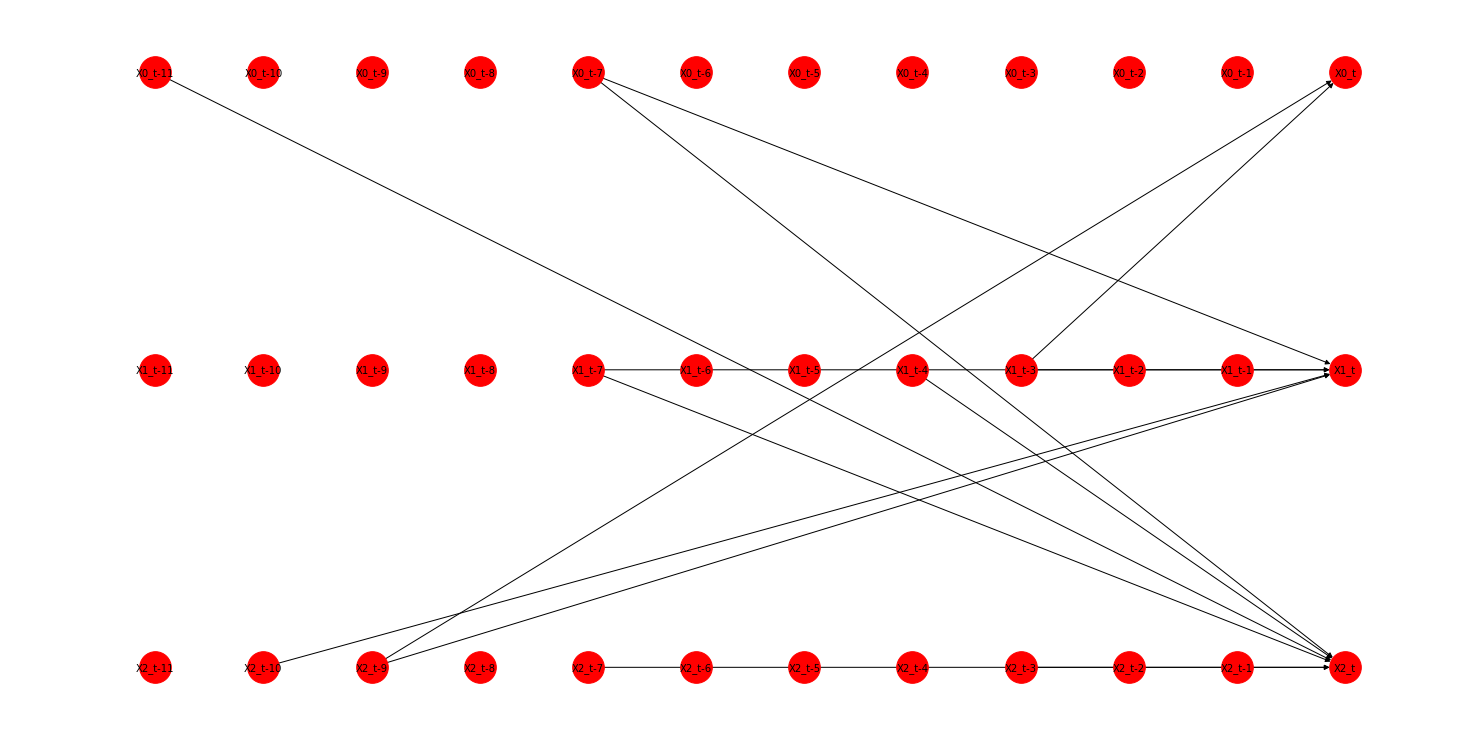

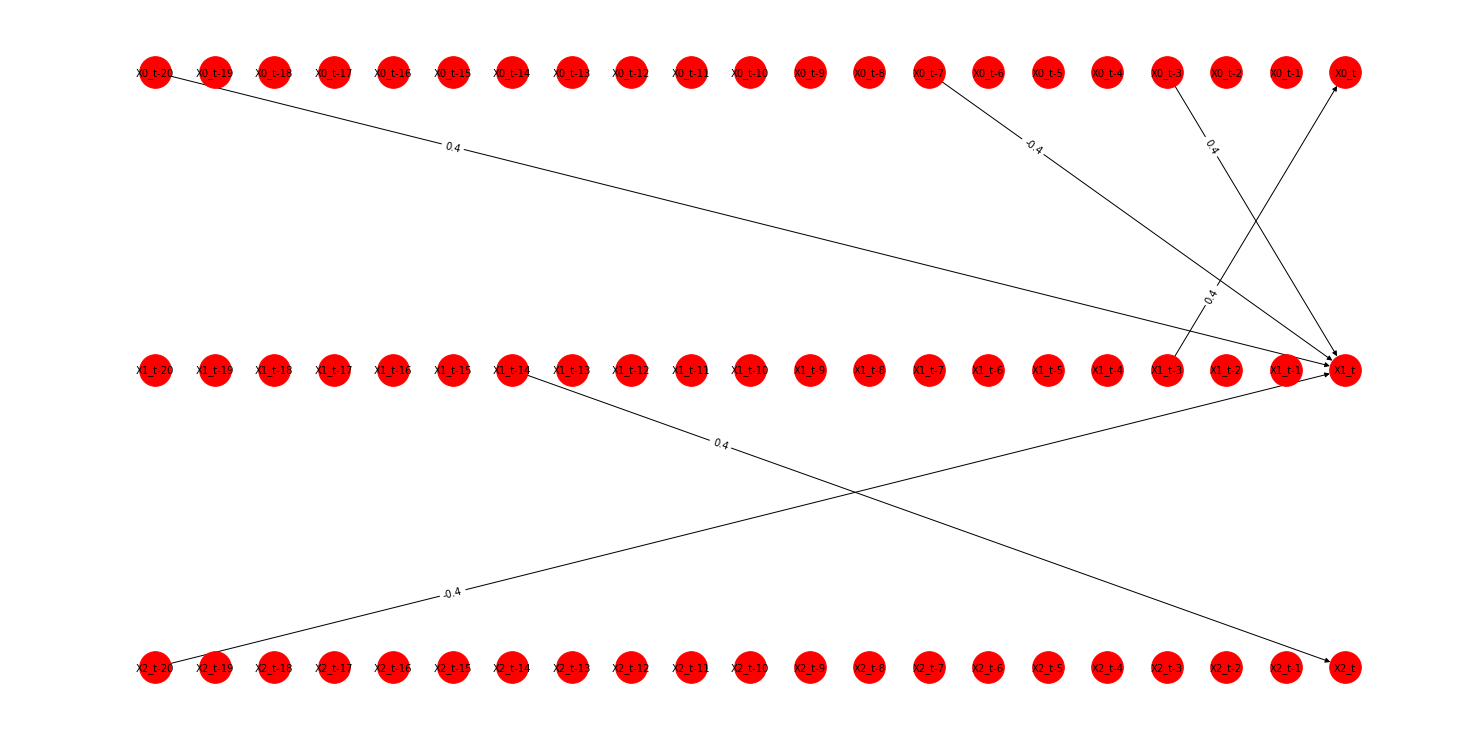

In [103]:
plt.figure(figsize=(20,10))
draw_graph(result[1][11], 3, 20)

plt.figure(figsize=(20,10))
generator.draw_graph()

In [98]:
result[3].scores()

{1: -2.0637468214417267,
 2: -2.07123351285481,
 3: -2.9529254963242013,
 4: -3.0780611368878934,
 5: -3.0743222282463183,
 6: -3.0936038773621273,
 7: -5.072123769508222,
 8: -5.088241957959787,
 9: -5.081377689718202,
 10: -5.295463006878769,
 11: -5.317196902959863,
 12: -5.3165940732059,
 13: -5.313686485369146}

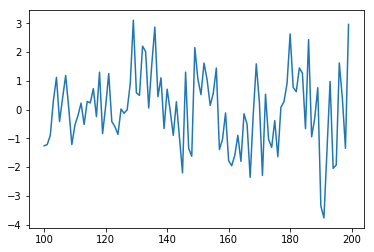

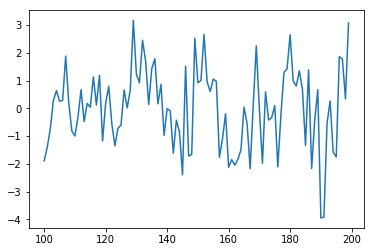

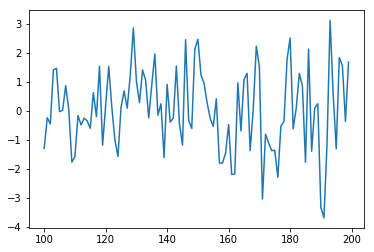

In [89]:
plt.plot(generator.ts['X0'][100:200])
plt.show()

plt.plot(generator.ts['X1'][100:200])
plt.show()

plt.plot(generator.ts['X2'][100:200])
plt.show()

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
No handles with labels found to put in legend.


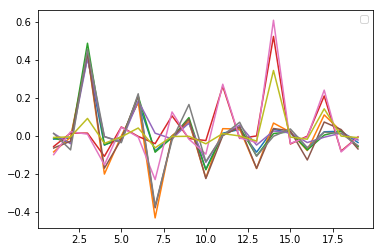

In [82]:

plt.plot(cross_correlation(generator.ts, return_df=True).iloc[1:20])
plt.show()

In [55]:
algo_graphs

{'PC incremental': {1: <networkx.classes.digraph.DiGraph at 0x7fec5702ff60>,
  2: <networkx.classes.digraph.DiGraph at 0x7fec5702f9b0>,
  3: <networkx.classes.digraph.DiGraph at 0x7fec5702f3c8>,
  4: <networkx.classes.digraph.DiGraph at 0x7fec5706b630>,
  5: <networkx.classes.digraph.DiGraph at 0x7fec5706bbe0>,
  6: <networkx.classes.digraph.DiGraph at 0x7fec5706bc18>,
  7: <networkx.classes.digraph.DiGraph at 0x7fec57050668>,
  8: <networkx.classes.digraph.DiGraph at 0x7fec74087dd8>,
  9: <networkx.classes.digraph.DiGraph at 0x7fec56ff2860>,
  10: <networkx.classes.digraph.DiGraph at 0x7fec56ff2c50>,
  11: <networkx.classes.digraph.DiGraph at 0x7fec570505f8>,
  12: <networkx.classes.digraph.DiGraph at 0x7fec57057860>,
  13: <networkx.classes.digraph.DiGraph at 0x7fec57039c88>,
  14: <networkx.classes.digraph.DiGraph at 0x7fec6c7612b0>,
  15: <networkx.classes.digraph.DiGraph at 0x7fec6c726898>,
  16: <networkx.classes.digraph.DiGraph at 0x7fec56ffb6d8>,
  17: <networkx.classes.digraph